<h1>IEE-CIS Fraud Detection</h1>
<hr/>
<p>How we can import, pre-process and predict finacial data for fraud detection</p>

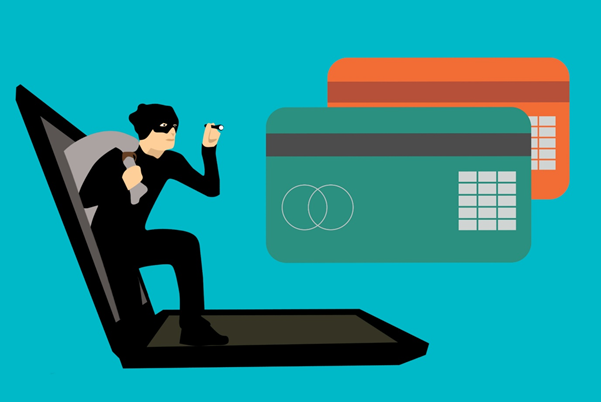

## Introduction ##

<p>With this presentation we are going to show how we can analyze the data of this Kaggle Competition for credit card fraud detection using <b>Deep Learning and ML</b><p>
<p>The Notebook will analyze the problem through different steps:</p>
<ul>
  <li>Data analysis and exploration</li>
  <li>Decide which columns to use for the Machine learning prediction</li>
  <li>Show how well the ML model predict</li>
</ul>

## Data Analysis ##

### Importing csv initial data ###
<p>the competition provides 2 zipped csv files for training, I stored these 2 archived files in a github repository and then I retrieved in the colab space for being imported easily</p>



In [46]:
!git clone https://github.com/spannozzo/IEEE-CIS-Fraud-Detection.git

fatal: destination path 'IEEE-CIS-Fraud-Detection' already exists and is not an empty directory.


In [47]:
!unzip /content/IEEE-CIS-Fraud-Detection/data/train_identity.csv.zip


Archive:  /content/IEEE-CIS-Fraud-Detection/data/train_identity.csv.zip
replace train_identity.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [48]:
!unzip /content/IEEE-CIS-Fraud-Detection/data/train_transaction.csv.zip

Archive:  /content/IEEE-CIS-Fraud-Detection/data/train_transaction.csv.zip
replace train_transaction.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [49]:
!unzip /content/IEEE-CIS-Fraud-Detection/data/test_identity.csv.zip
!unzip /content/IEEE-CIS-Fraud-Detection/data/test_transaction.csv.zip


Archive:  /content/IEEE-CIS-Fraud-Detection/data/test_identity.csv.zip
replace test_identity.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/IEEE-CIS-Fraud-Detection/data/test_transaction.csv.zip
replace test_transaction.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

###Data exploration###

#####Data Importing####
<p>We are going to import first the data to have a preview of the provided csv files</p>

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
import pandas as pd
pd.set_option('display.max_columns', None)
df1 = pd.read_csv('/content/train_identity.csv')

df1.head()

TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0  2987004        0.0    70787.0  NaN    NaN    NaN    NaN    NaN    NaN      
1  2987008       -5.0    98945.0  NaN    NaN     0.0   -5.0   NaN    NaN      
2  2987010       -5.0    191631.0  0.0    0.0    0.0    0.0   NaN    NaN      
3  2987011       -5.0    221832.0 NaN    NaN     0.0   -6.0   NaN    NaN      
4  2987016        0.0    7460.0    0.0    0.0    1.0    0.0   NaN    NaN      

   id_09  id_10  id_11     id_12  id_13  id_14  id_15     id_16  id_17  id_18  \
0 NaN    NaN     100.0  NotFound NaN    -480.0  New    NotFound  166.0 NaN      
1 NaN    NaN     100.0  NotFound  49.0  -300.0  New    NotFound  166.0 NaN      
2  0.0    0.0    100.0  NotFound  52.0  NaN     Found  Found     121.0 NaN      
3 NaN    NaN     100.0  NotFound  52.0  NaN     New    NotFound  225.0 NaN      
4  0.0    0.0    100.0  NotFound NaN    -300.0  Found  Found     166.0  15.0    

   id_19  id_20  id_21  id_22 id_23  id_24  id_25  id_26 id_27  id_28  \
0  542.0  144.0 NaN    NaN     NaN  NaN    NaN    NaN     NaN   New     
1  621.0  500.0 NaN    NaN     NaN  NaN    NaN    NaN     NaN   New     
2  410.0  142.0 NaN    NaN     NaN  NaN    NaN    NaN     NaN   Found   
3  176.0  507.0 NaN    NaN     NaN  NaN    NaN    NaN     NaN   New     
4  529.0  575.0 NaN    NaN     NaN  NaN    NaN    NaN     NaN   Found   

      id_29             id_30                id_31  id_32      id_33  \
0  NotFound  Android 7.0       samsung browser 6.2  32.0   2220x1080   
1  NotFound  iOS 11.1.2        mobile safari 11.0   32.0   1334x750    
2  Found     NaN               chrome 62.0         NaN     NaN         
3  NotFound  NaN               chrome 62.0         NaN     NaN         
4  Found     Mac OS X 10_11_6  chrome 62.0          24.0   1280x800    

            id_34 id_35 id_36 id_37 id_38 DeviceType  \
0  match_status:2  T     F     T     T     mobile      
1  match_status:1  T     F     F     T     mobile      
2  NaN             F     F     T     T     desktop     
3  NaN             F     F     T     T     desktop     
4  match_status:2  T     F     T     T     desktop     

                      DeviceInfo  
0  SAMSUNG SM-G892A Build/NRD90M  
1  iOS Device                     
2  Windows                        
3  NaN                            
4  MacOS

In [52]:
pd.set_option('display.max_rows', 500)

In [53]:
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_seq_items = 2000

In [54]:
df2= pd.read_csv('/content/train_transaction.csv')

In [55]:
df2.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0  2987000        0        86400          68.5            W         13926   
1  2987001        0        86401          29.0            W         2755    
2  2987002        0        86469          59.0            W         4663    
3  2987003        0        86499          50.0            W         18132   
4  2987004        0        86506          50.0            H         4497    

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0 NaN     150.0  discover    142.0  credit  315.0  87.0   19.0  NaN      
1  404.0  150.0  mastercard  102.0  credit  325.0  87.0  NaN    NaN      
2  490.0  150.0  visa        166.0  debit   330.0  87.0   287.0 NaN      
3  567.0  150.0  mastercard  117.0  debit   476.0  87.0  NaN    NaN      
4  514.0  150.0  mastercard  102.0  credit  420.0  87.0  NaN    NaN      

  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0  NaN           NaN           1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1  gmail.com     NaN           1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2  outlook.com   NaN           1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3  yahoo.com     NaN           2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   
4  gmail.com     NaN           1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

   C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  D7  D8  D9  \
0  0.0  2.0  0.0  1.0   1.0  14.0  NaN     13.0 NaN   NaN  NaN NaN NaN NaN   
1  0.0  1.0  0.0  1.0   1.0  0.0   NaN    NaN    0.0  NaN  NaN NaN NaN NaN   
2  0.0  1.0  0.0  1.0   1.0  0.0   NaN    NaN    0.0  NaN  NaN NaN NaN NaN   
3  0.0  1.0  0.0  25.0  1.0  112.0  112.0  0.0   94.0  0.0 NaN NaN NaN NaN   
4  1.0  1.0  0.0  1.0   1.0  0.0   NaN    NaN   NaN   NaN  NaN NaN NaN NaN   

    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4   M5   M6   M7   M8  \
0  13.0  13.0  NaN  NaN  NaN   0.0    T    T    T    M2   F    T    NaN  NaN   
1  0.0  NaN    NaN  NaN  NaN   0.0    NaN  NaN  NaN  M0   T    T    NaN  NaN   
2  0.0   315.0 NaN  NaN  NaN   315.0  T    T    T    M0   F    F    F    F     
3  84.0 NaN    NaN  NaN  NaN   111.0  NaN  NaN  NaN  M0   T    F    NaN  NaN   
4 NaN   NaN    NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    M9   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  \
0  NaN  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
1  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   0.0  0.0  1.0   
2  F    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
3  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   1.0  1.0  1.0   
4  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    

   V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
4 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    

   V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  \
0  0.0  0.0  0.0  0.0  0.0 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
2  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
3  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
4 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    

   V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  \
0 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  

#### Data type overview - first csv file ####

<p>The first type of file presents some undientified columns, a transaction id and device information</p> 
<p>Most of the columns are not empty, there is some columns that are almost empty (id-07,id-08 and from id-21 to id-27)</p> 

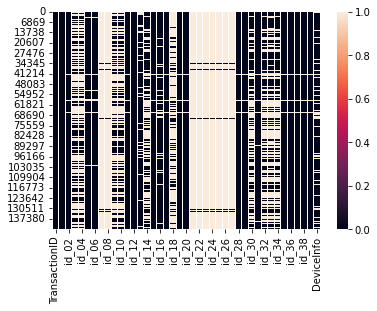

In [56]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.heatmap(df1.isnull())
plt.show()

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

#### Data type overview - second csv file ####

<p>The second  type of file looks very big (more than 1.7 GB), and it contains 394 columns and 590540 rows.</p> 
<p>It contains the transaction ID for refering to the first csv, and a column "isFraud" to identify the rows rapresenting frauds, then it contains a a set if unidentified columns rapresenting the features of the transaction</p>
<p>The number of <b>total frauds</b> on total rows is 203, which is around <b>3.5 %</b></p>

In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [59]:
df2.shape

(590540, 394)

####Transaction csv - null values####
<p>This CSV file is too huge to chart null values map all columns together, so I'm plotting grouping columns by semanthic name of columns</p>

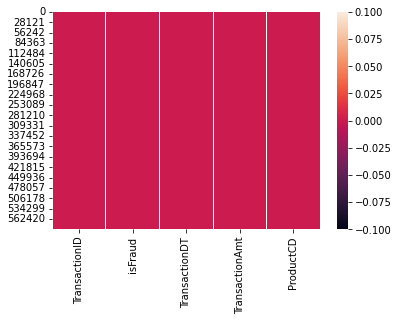

In [60]:
sns.heatmap(df2.iloc[:,0:5].isnull())
plt.show()

# Nuova sezione

# Nuova sezione

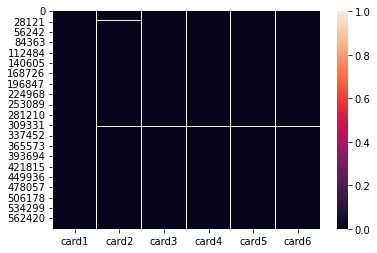

In [61]:
sns.heatmap(df2.iloc[:,5:11].isnull())
plt.show()


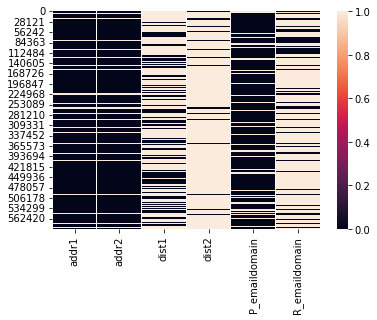

In [62]:
sns.heatmap(df2.iloc[:,11:17].isnull())
plt.show()

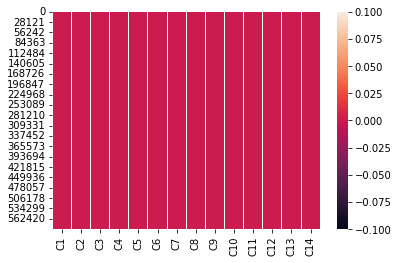

In [63]:
sns.heatmap(df2.iloc[:,17:31].isnull())
plt.show()

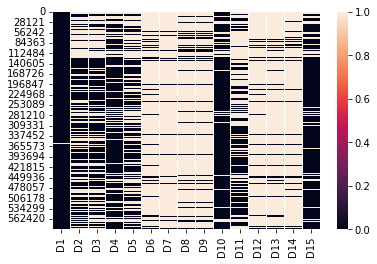

In [64]:
sns.heatmap(df2.iloc[:,31:46].isnull())
plt.show()

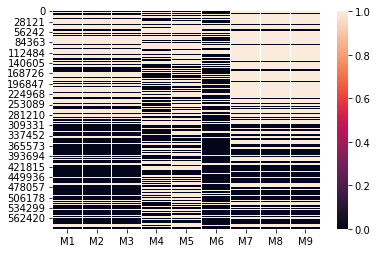

In [65]:
sns.heatmap(df2.iloc[:,46:55].isnull())
plt.show()

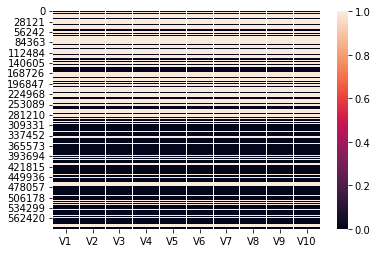

In [66]:
sns.heatmap(df2.iloc[:,55:65].isnull())
plt.show()

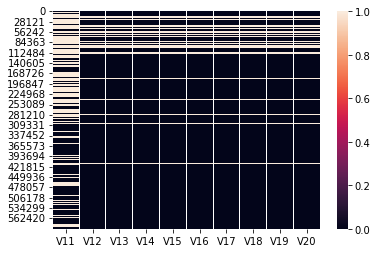

In [67]:
sns.heatmap(df2.iloc[:,65:75].isnull())
plt.show()

In [68]:
frauds= df2[df2['isFraud']==1].copy()

In [69]:
frauds.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
203  2987203        1        89760          445.000         W         18268   
240  2987240        1        90193          37.098          C         13413   
243  2987243        1        90246          37.098          C         13413   
245  2987245        1        90295          37.098          C         13413   
288  2987288        1        90986          155.521         C         16578   

     card2  card3 card4  card5   card6  addr1  addr2  dist1  dist2  \
203  583.0  150.0  visa  226.0  credit  251.0  87.0  NaN    NaN      
240  103.0  185.0  visa  137.0  credit NaN    NaN    NaN    NaN      
243  103.0  185.0  visa  137.0  credit NaN    NaN    NaN    NaN      
245  103.0  185.0  visa  137.0  credit NaN    NaN    NaN    NaN      
288  545.0  185.0  visa  226.0  credit NaN    NaN    NaN    NaN      

    P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
203  aol.com       NaN           2.0  2.0  0.0  0.0  0.0  2.0  0.0  0.0  2.0   
240  hotmail.com   hotmail.com   0.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0   
243  hotmail.com   hotmail.com   1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0   
245  hotmail.com   hotmail.com   2.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0   
288  outlook.com   outlook.com   1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0   

     C10  C11  C12  C13  C14    D1    D2    D3   D4   D5   D6   D7         D8  \
203  0.0  1.0  0.0  4.0  2.0  57.0  57.0  52.0  0.0 NaN  NaN  NaN  NaN          
240  1.0  1.0  1.0  0.0  0.0  0.0  NaN   NaN    0.0 NaN   0.0 NaN   45.041664   
243  1.0  1.0  1.0  0.0  0.0  0.0  NaN   NaN    0.0  0.0  0.0  0.0  45.041664   
245  1.0  1.0  1.0  0.0  0.0  0.0  NaN   NaN    0.0  0.0  0.0  0.0  45.041664   
288  1.0  1.0  1.0  0.0  0.0  0.0  NaN   NaN    0.0 NaN   0.0 NaN  NaN          

           D9   D10  D11  D12  D13  D14    D15   M1   M2   M3  M4   M5   M6  \
203 NaN        80.0 NaN  NaN  NaN  NaN   374.0  NaN  NaN  NaN  M0  F    T     
240  0.041666  0.0  NaN   0.0  0.0  0.0  0.0    NaN  NaN  NaN  M2  NaN  NaN   
243  0.041666  0.0  NaN   0.0  0.0  0.0  0.0    NaN  NaN  NaN  M2  NaN  NaN   
245  0.041666  0.0  NaN   0.0  0.0  0.0  0.0    NaN  NaN  NaN  M2  NaN  NaN   
288 NaN        0.0  NaN   0.0  0.0  0.0  0.0    NaN  NaN  NaN  M2  NaN  NaN   

      M7   M8   M9  V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  V12  V13  \
203  NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN   1.0  1.0   
240  NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN   0.0  0.0   
243  NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN   0.0  0.0   
245  NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN   0.0  0.0   
288  NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN   0.0  0.0   

     V14  V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  \
203  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
240  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
243  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  1.0  1.0  0.0   
245  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  3.0  3.0  1.0  1.0  0.0   
288  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   

     V28  V29  V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  \
203  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0   
240  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
243  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
245  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
288  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   

     V42  V43  V44  V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  \
203  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0   
240  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0 NaN  NaN  NaN    
243  1.0  1.0  2.0  2.0  1.0  1.0  0.0  

In [70]:
frauds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20663 entries, 203 to 590526
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 62.3+ MB


In [71]:
print('% frauds', len(frauds) / len(df2) * 100 )

% frauds 3.4990009144173126


###Visual Data Analysis###

####Fraud Transactions#####
<p>As we mentioned before, fraud transactions are around 3.5 % of all the data</p>

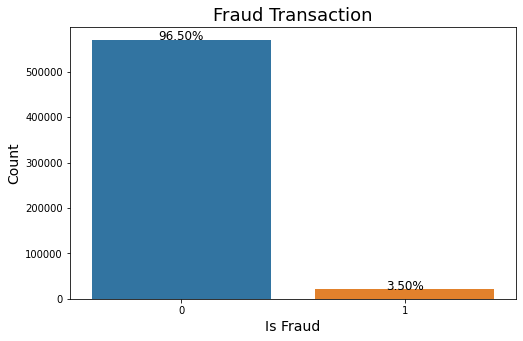

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax  = plt.subplots(figsize=(8, 5))
sns.countplot(x='isFraud', data=df2, ax=ax)
ax.set_title('Fraud Transaction', fontsize=18)
ax.set_xlabel('Is Fraud', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            f'{height/len(df2) * 100:.2f}%',
            ha='center', fontsize=12)


In [73]:
df_t1 = pd.read_csv('/content/test_identity.csv')
df_t2 = pd.read_csv('/content/test_transaction.csv')

####Transaction Datetime  ####
<p>Train and test dataset seem on a different datetime</p>

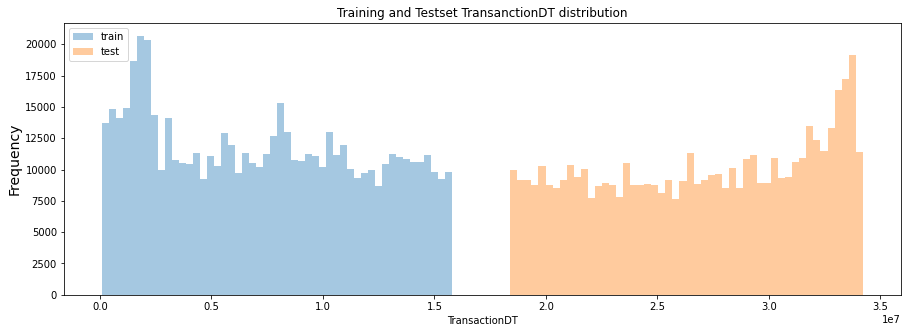

In [74]:
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(df2['TransactionDT'], kde=False, ax=ax, label='train')
sns.distplot(df_t2['TransactionDT'], kde=False, ax=ax, label='test')
ax.set_title('Training and Testset TransanctionDT distribution')
ax.set_ylabel('Frequency', fontsize=14)
ax.legend()

In [75]:
def count_fraud_plot(df, col):
    """
       Return  a count  distribution plot against categorical column  and the fraud percentage of each category
       :param df:  pandas dataframe
       :param col_name:  str . categorical column
       :return:
       """

    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0: 'NoFraud', 1: 'Fraud'}, inplace=True)

    fig, ax = plt.subplots(nrows=2, figsize=(15, 10))
    sns.countplot(x=col, data=df,
                  order=list(tmp[col].values), ax=ax[0])

    # ax[0].set_xlabel(f"{col} Category Names", fontsize=12)
    ax[0].set_title(
        f"Frequency of {col} values", fontsize=16)
    ax[0].set_ylabel("Count", fontsize=12)
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

    for p in ax[0].patches:
        height = p.get_height()
        ax[0].text(p.get_x() + p.get_width() / 2.,
                   height,
                   f'{height / df.shape[0] * 100:.2f}%',
                   ha='center', fontsize=8)

    sns.barplot(x=col, y='Fraud', data=tmp,
                order=list(tmp[col].values), ax=ax[1])

    ax[1].set_xlabel(f"{col} Category Names", fontsize=12)
    ax[1].set_title(
        f"Fraud Percentage of {col} values", fontsize=16)
    ax[1].set_ylabel("Percent", fontsize=12)
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
    plt.subplots_adjust(hspace=.4, top=0.9)

    for p in ax[1].patches:
        height = p.get_height()
        ax[1].text(p.get_x() + p.get_width() / 2.,
                   height,
                   f'{height:.2f}%',
                   ha='center', fontsize=8)
    plt.subplots_adjust(hspace=.4, top=1.1)
    plt.show();

####Product Code ####
<p>product W is the most buyed but product C is the most frequent on fraud transactions</p>

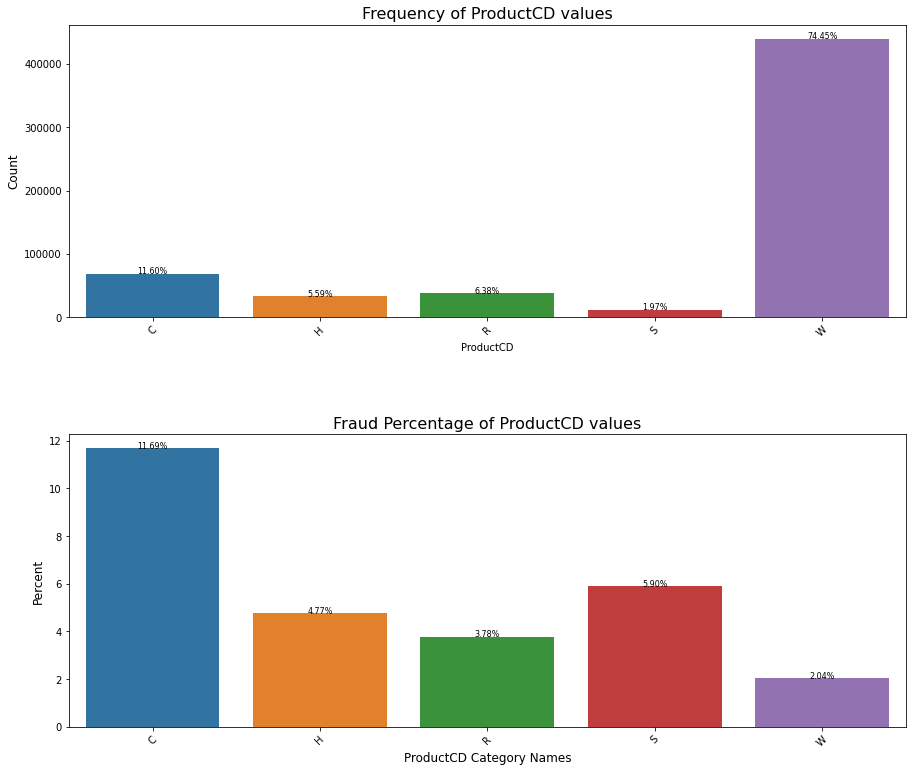

In [76]:
count_fraud_plot(df2, 'ProductCD')

#### Card Brands ####
Visa and Mastercard are the more used brand of cards, however "Discover" card present the double of frauds

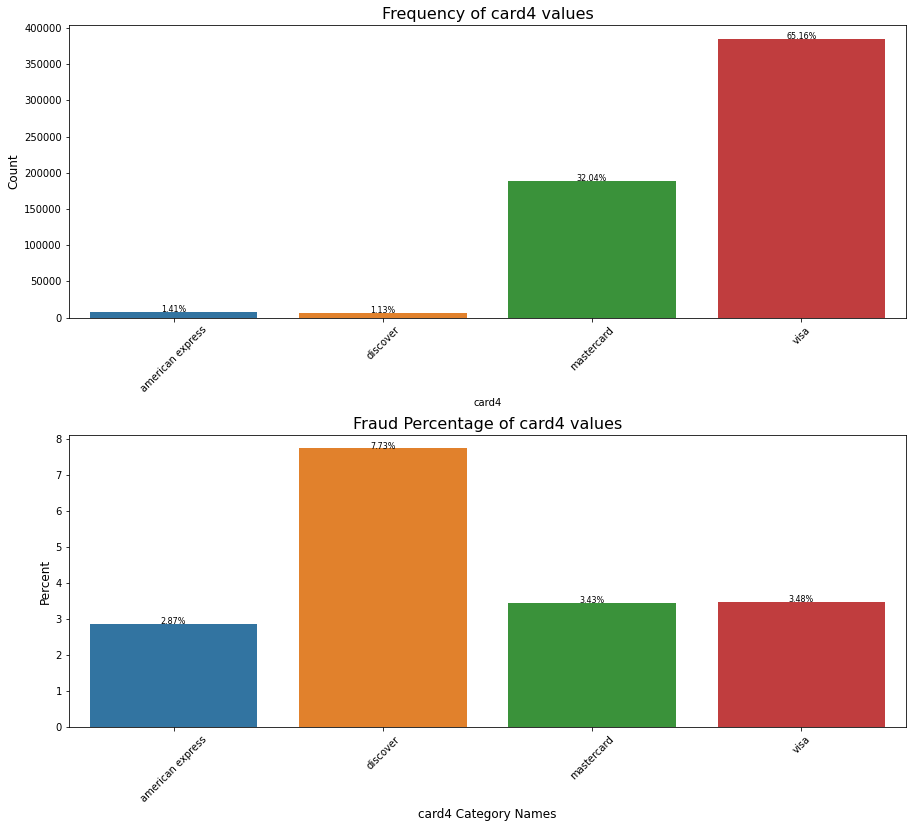

In [77]:
count_fraud_plot(df2, 'card4')

####Card Types####

<p>Card types are credid or debit. Debit cards are wider used but credit cards have most percentage of frauds</p>

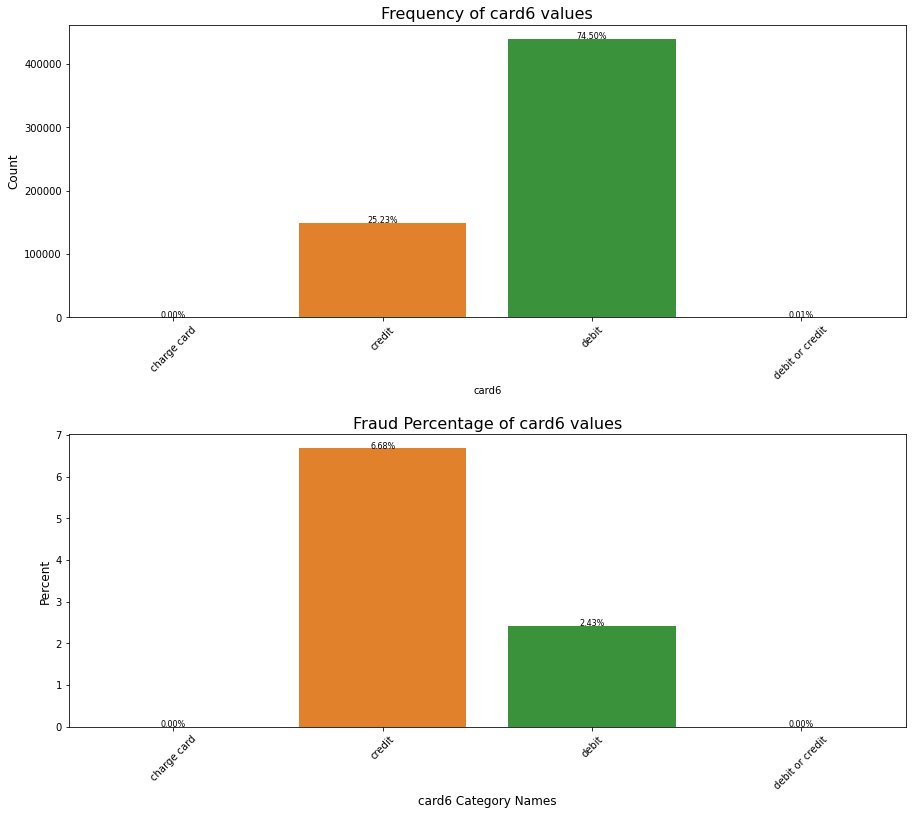

In [78]:
count_fraud_plot(df2, 'card6')

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_cat_features(df, col, lim=2000):
    """
    Extension of  count_fraud_plot  with addition of  box plot
    :param df:  pandas dataframe
    :param col:  categorical colnum
    :param lim: int that limit the transaction amt
    :return:
    """

    plt.figure(figsize=(14, 10))
    plt.subplot(221)
    g = sns.countplot(x=col, data=df)
    g.set_title(col + ' Distribution', fontsize=14)
    # g.set_xlabel(col + ' Name', fontsize=10)
    g.set_ylabel('Count', fontsize=14)
    for p in g.patches:
        height = p.get_height()
        g.text(p.get_x() + p.get_width() / 2.,
               height,
               f'{height / df.shape[0] * 100:.2f}%',
               ha='center', fontsize=10)

    plt.subplot(222)
    g1 = df.groupby(col)['isFraud'].mean() \
        .sort_index() \
        .plot(kind='bar',
              title='Percentage of Fraud by ' + col,
              color=sns.color_palette())
    for p in g1.patches:
        height = p.get_height()
        g1.text(p.get_x() + p.get_width() / 2.,
                height,
                f'{height * 100:.2f}%',
                ha='center', fontsize=10)

    plt.subplot(212)
    g2 = sns.boxenplot(x=col, y='TransactionAmt', hue='isFraud',
                       data=df[df['TransactionAmt'] <= lim])
    g2.set_title(f"{col} boxplot by TransactionAmt and Fraud")
    g2.set_ylabel("Transaction Values in $")

    plt.subplots_adjust(hspace=0.5)
    plt.show()

####Device Types ####
<p>most of rows are classified with device missing, however frauds happen mostly on mobile device.</p>
<p>The value of transactions is higher for missing devices and is lower for desktop devices<p/>

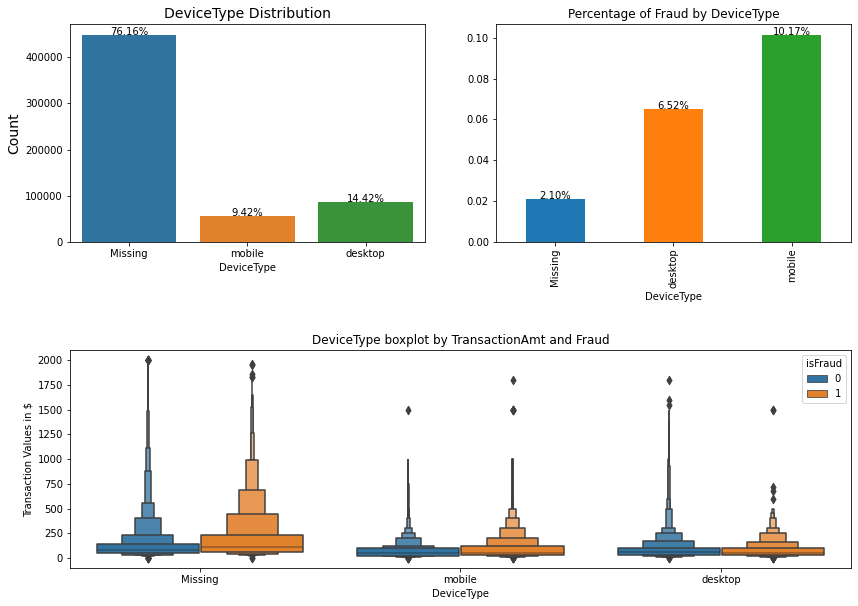

In [80]:
tmp = df2.copy()
tmp = tmp.merge(df1, how='left')
tmp['DeviceType'] = tmp['DeviceType'].fillna('Missing')
plot_cat_features(tmp, 'DeviceType', lim=2000)

### Finding the most relevant columns ###
<p>I'm going to check the correlation between the column 'isFraud' and the other columns</p>
<p>First I'm checking the columns of both CSV files</p>

#### Filtering the columns 

In [81]:
tmp.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
       'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37',
       'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57',
       'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67',
       'V6

#### Removing columns with empty values ####
<p>I will check for both CSV the most filled columns (more then 0.6 filled rows) and then I will collect only the most relevant column wich change significally when 'isFraud' column change </p>

In [82]:
s = tmp.isnull().sum()/len(tmp)
s = pd.Series.sort_values(s,ascending=True)

tmp_index=s[s<0.6].index

print(len(tmp_index))
tmp_index

227


Index(['TransactionID', 'DeviceType', 'C14', 'C13', 'C12', 'C11', 'C10', 'C8',
       'C7', 'C6', 'C5', 'C4', 'C3', 'C2', 'C1', 'C9', 'TransactionDT',
       'TransactionAmt', 'ProductCD', 'card1', 'isFraud', 'V287', 'V307',
       'V308', 'V306', 'V309', 'V311', 'V312', 'V316', 'V317', 'V318', 'V319',
       'V320', 'V310', 'V305', 'V284', 'V280', 'V290', 'V285', 'V286', 'V302',
       'V321', 'V299', 'V298', 'V297', 'V295', 'V294', 'V293', 'V292', 'V291',
       'V279', 'V303', 'V304', 'V125', 'V119', 'V120', 'V121', 'V122', 'V123',
       'V124', 'V126', 'V127', 'V128', 'V106', 'V129', 'V130', 'V131', 'V132',
       'V133', 'V134', 'V135', 'V118', 'V117', 'V116', 'V115', 'V105', 'V104',
       'V103', 'V102', 'V101', 'V100', 'V99', 'V98', 'V136', 'V97', 'V95',
       'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V96', 'V137',
       'V107', 'D1', 'V300', 'V301', 'V296', 'V315', 'V314', 'V289', 'V283',
       'V281', 'V282', 'V288', 'V313', 'card3', 'card6', 'card4', 'card

#### Heatmap Check ####

<p>After removing the empty columns, I'm going to check the correlations with isFraud and taking the most relevant data (more than 0.1, or less than 0.1) </p>

In [83]:
import numpy as np
indexes = tmp_index.copy()
i = np.where(indexes=='isFraud')
i

(array([20]),)

In [84]:
indexes_2 = np.delete(indexes,i)

In [85]:
indexes_2

Index(['TransactionID', 'DeviceType', 'C14', 'C13', 'C12', 'C11', 'C10', 'C8',
       'C7', 'C6', 'C5', 'C4', 'C3', 'C2', 'C1', 'C9', 'TransactionDT',
       'TransactionAmt', 'ProductCD', 'card1', 'V287', 'V307', 'V308', 'V306',
       'V309', 'V311', 'V312', 'V316', 'V317', 'V318', 'V319', 'V320', 'V310',
       'V305', 'V284', 'V280', 'V290', 'V285', 'V286', 'V302', 'V321', 'V299',
       'V298', 'V297', 'V295', 'V294', 'V293', 'V292', 'V291', 'V279', 'V303',
       'V304', 'V125', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V126',
       'V127', 'V128', 'V106', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134',
       'V135', 'V118', 'V117', 'V116', 'V115', 'V105', 'V104', 'V103', 'V102',
       'V101', 'V100', 'V99', 'V98', 'V136', 'V97', 'V95', 'V108', 'V109',
       'V110', 'V111', 'V112', 'V113', 'V114', 'V96', 'V137', 'V107', 'D1',
       'V300', 'V301', 'V296', 'V315', 'V314', 'V289', 'V283', 'V281', 'V282',
       'V288', 'V313', 'card3', 'card6', 'card4', 'card5', 'card2'

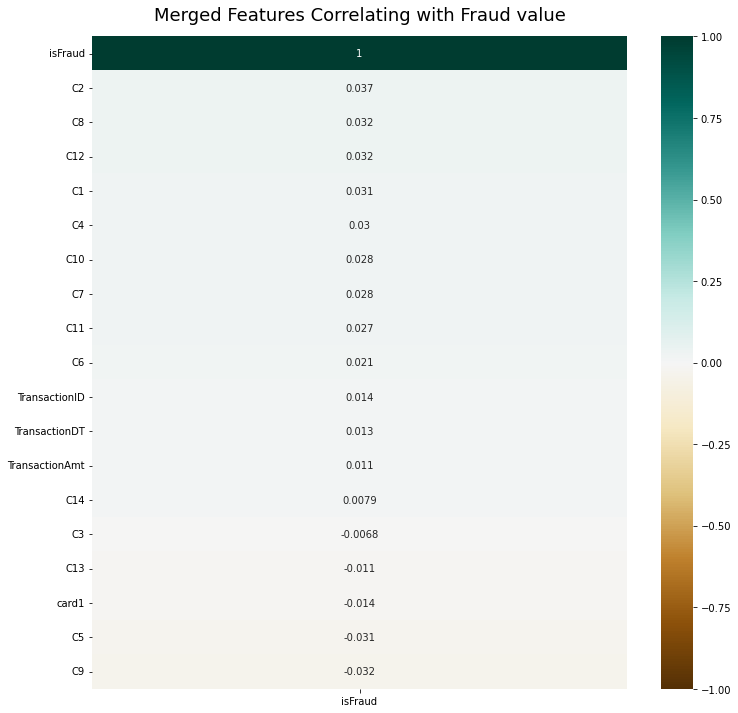

In [86]:
x = ['isFraud']+indexes_2[0:20].to_list()

x2= tmp.iloc[:,tmp.columns.isin(x)]

corr_isFraud = x2.corr()[['isFraud']].sort_values(by='isFraud', ascending=False)

plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(corr_isFraud, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Merged Features Correlating with Fraud value', fontdict={'fontsize':18}, pad=16);

relevant_columns_positive = corr_isFraud.iloc[:,:][corr_isFraud.iloc[:,:] >= 0.1]
relevant_columns_negative = corr_isFraud.iloc[:,:][corr_isFraud.iloc[:,:] <= - 0.1]

relevant_columns_positive = relevant_columns_positive[relevant_columns_positive['isFraud'].isnull() == False]
relevant_columns_negative = relevant_columns_negative[relevant_columns_negative['isFraud'].isnull() == False]

relevant_columns_tmpa = pd.concat([relevant_columns_positive, relevant_columns_negative])


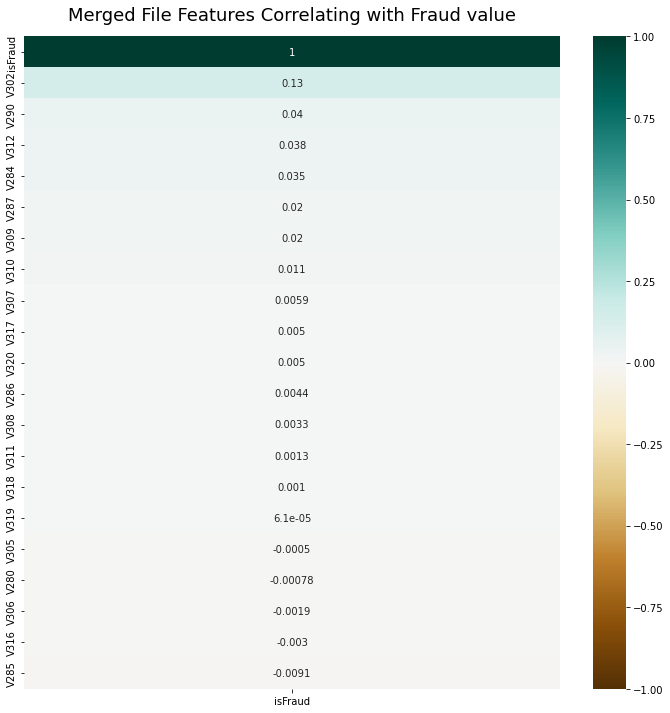

In [87]:
x = ['isFraud']+indexes_2[20:40].to_list()

x2= tmp.iloc[:,tmp.columns.isin(x)]

corr_isFraud = x2.corr()[['isFraud']].sort_values(by='isFraud', ascending=False)

plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(corr_isFraud, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Merged File Features Correlating with Fraud value', fontdict={'fontsize':18}, pad=16);

relevant_columns_positive = corr_isFraud.iloc[1:,:][corr_isFraud.iloc[1:,:] >= 0.1]
relevant_columns_negative = corr_isFraud.iloc[1:,:][corr_isFraud.iloc[1:,:] <= - 0.1]

relevant_columns_positive = relevant_columns_positive[relevant_columns_positive['isFraud'].isnull() == False]
relevant_columns_negative = relevant_columns_negative[relevant_columns_negative['isFraud'].isnull() == False]

relevant_columns_tmpb = pd.concat([relevant_columns_positive, relevant_columns_negative])


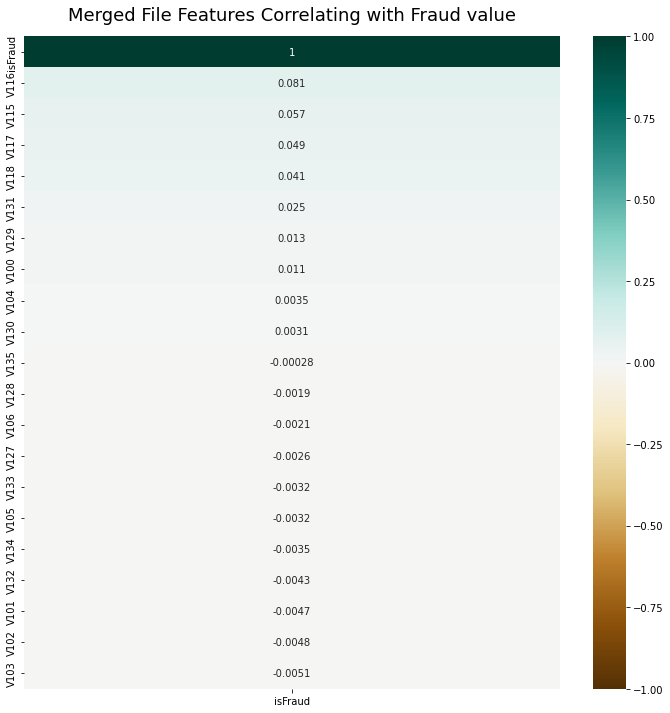

In [88]:
x = ['isFraud']+indexes_2[60:80].to_list()

x2= tmp.iloc[:,tmp.columns.isin(x)]

corr_isFraud = x2.corr()[['isFraud']].sort_values(by='isFraud', ascending=False)

plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(corr_isFraud, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Merged File Features Correlating with Fraud value', fontdict={'fontsize':18}, pad=16);

relevant_columns_positive = corr_isFraud.iloc[1:,:][corr_isFraud.iloc[1:,:] >= 0.1]
relevant_columns_negative = corr_isFraud.iloc[1:,:][corr_isFraud.iloc[1:,:] <= - 0.1]

relevant_columns_positive = relevant_columns_positive[relevant_columns_positive['isFraud'].isnull() == False]
relevant_columns_negative = relevant_columns_negative[relevant_columns_negative['isFraud'].isnull() == False]

relevant_columns_tmpc = pd.concat([relevant_columns_positive, relevant_columns_negative])


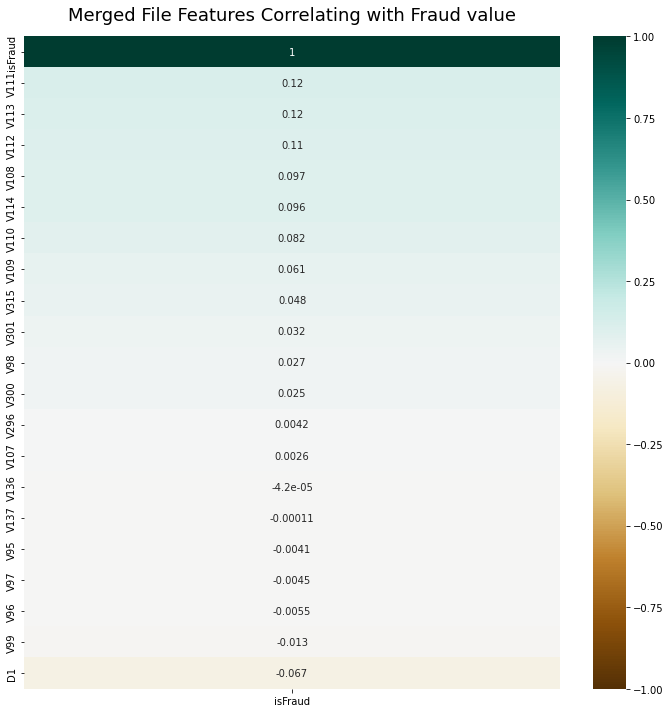

In [89]:
x = ['isFraud']+indexes_2[80:100].to_list()

x2= tmp.iloc[:,tmp.columns.isin(x)]

corr_isFraud = x2.corr()[['isFraud']].sort_values(by='isFraud', ascending=False)

plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(corr_isFraud, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Merged File Features Correlating with Fraud value', fontdict={'fontsize':18}, pad=16);

relevant_columns_positive = corr_isFraud.iloc[1:,:][corr_isFraud.iloc[1:,:] >= 0.1]
relevant_columns_negative = corr_isFraud.iloc[1:,:][corr_isFraud.iloc[1:,:] <= - 0.1]

relevant_columns_positive = relevant_columns_positive[relevant_columns_positive['isFraud'].isnull() == False]
relevant_columns_negative = relevant_columns_negative[relevant_columns_negative['isFraud'].isnull() == False]

relevant_columns_tmpd = pd.concat([relevant_columns_positive, relevant_columns_negative])


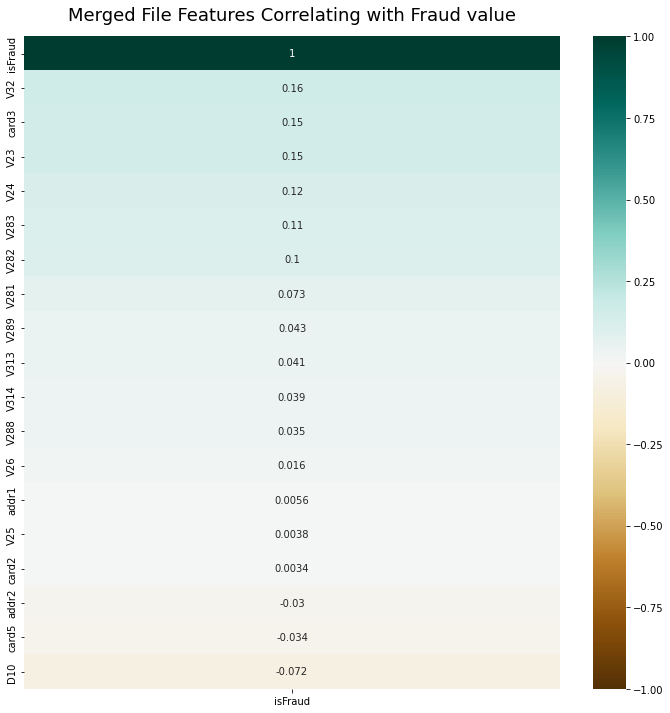

In [90]:
x = ['isFraud']+indexes_2[100:120].to_list()

x2= tmp.iloc[:,tmp.columns.isin(x)]

corr_isFraud = x2.corr()[['isFraud']].sort_values(by='isFraud', ascending=False)

plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(corr_isFraud, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Merged File Features Correlating with Fraud value', fontdict={'fontsize':18}, pad=16);

relevant_columns_positive = corr_isFraud.iloc[1:,:][corr_isFraud.iloc[1:,:] >= 0.1]
relevant_columns_negative = corr_isFraud.iloc[1:,:][corr_isFraud.iloc[1:,:] <= - 0.1]

relevant_columns_positive = relevant_columns_positive[relevant_columns_positive['isFraud'].isnull() == False]
relevant_columns_negative = relevant_columns_negative[relevant_columns_negative['isFraud'].isnull() == False]

relevant_columns_tmpe = pd.concat([relevant_columns_positive, relevant_columns_negative])


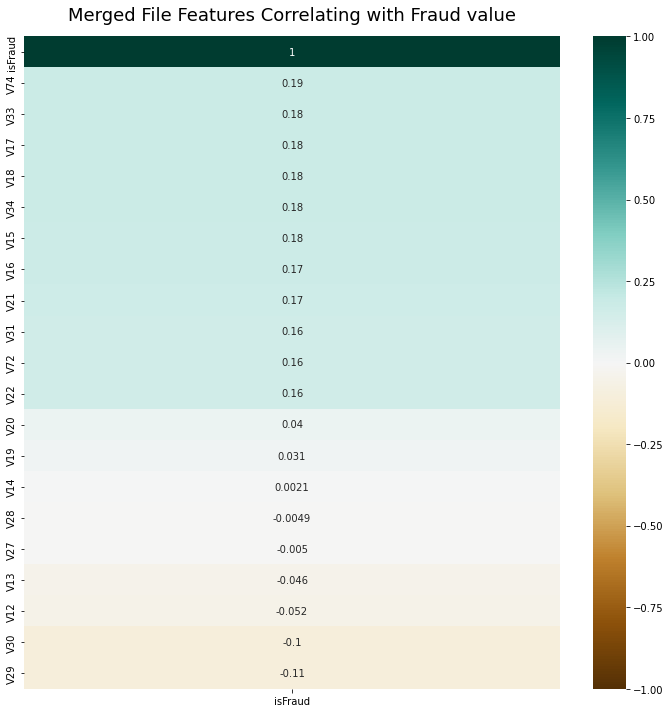

In [91]:
x = ['isFraud']+indexes_2[120:140].to_list()

x2= tmp.iloc[:,tmp.columns.isin(x)]

corr_isFraud = x2.corr()[['isFraud']].sort_values(by='isFraud', ascending=False)

plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(corr_isFraud, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Merged File Features Correlating with Fraud value', fontdict={'fontsize':18}, pad=16);

relevant_columns_positive = corr_isFraud.iloc[1:,:][corr_isFraud.iloc[1:,:] >= 0.1]
relevant_columns_negative = corr_isFraud.iloc[1:,:][corr_isFraud.iloc[1:,:] <= - 0.1]

relevant_columns_positive = relevant_columns_positive[relevant_columns_positive['isFraud'].isnull() == False]
relevant_columns_negative = relevant_columns_negative[relevant_columns_negative['isFraud'].isnull() == False]

relevant_columns_tmpf = pd.concat([relevant_columns_positive, relevant_columns_negative])


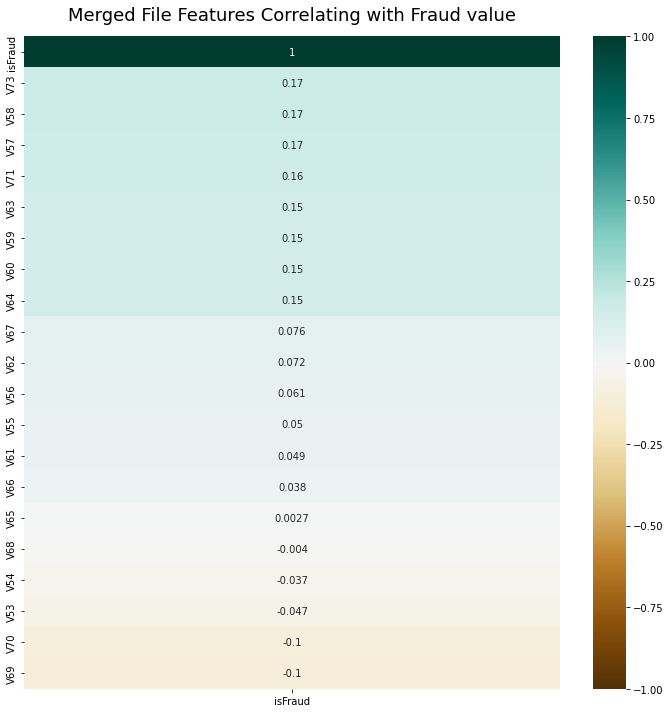

In [92]:
x = ['isFraud']+indexes_2[140:160].to_list()

x2= tmp.iloc[:,tmp.columns.isin(x)]

corr_isFraud = x2.corr()[['isFraud']].sort_values(by='isFraud', ascending=False)

plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(corr_isFraud, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Merged File Features Correlating with Fraud value', fontdict={'fontsize':18}, pad=16);

relevant_columns_positive = corr_isFraud.iloc[1:,:][corr_isFraud.iloc[1:,:] >= 0.1]
relevant_columns_negative = corr_isFraud.iloc[1:,:][corr_isFraud.iloc[1:,:] <= - 0.1]

relevant_columns_positive = relevant_columns_positive[relevant_columns_positive['isFraud'].isnull() == False]
relevant_columns_negative = relevant_columns_negative[relevant_columns_negative['isFraud'].isnull() == False]

relevant_columns_tmpg = pd.concat([relevant_columns_positive, relevant_columns_negative])


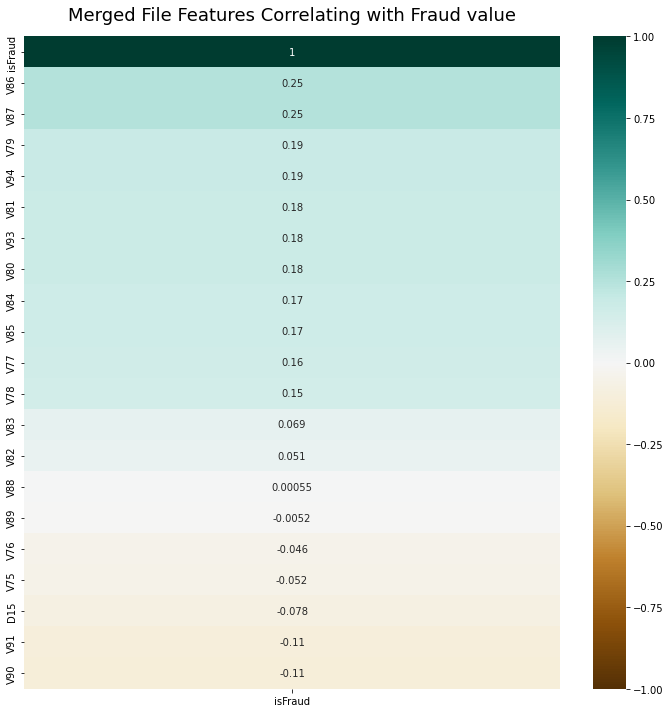

In [93]:
x = ['isFraud']+indexes_2[160:180].to_list()

x2= tmp.iloc[:,tmp.columns.isin(x)]

corr_isFraud = x2.corr()[['isFraud']].sort_values(by='isFraud', ascending=False)

plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(corr_isFraud, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Merged File Features Correlating with Fraud value', fontdict={'fontsize':18}, pad=16);

relevant_columns_positive = corr_isFraud.iloc[1:,:][corr_isFraud.iloc[1:,:] >= 0.1]
relevant_columns_negative = corr_isFraud.iloc[1:,:][corr_isFraud.iloc[1:,:] <= - 0.1]

relevant_columns_positive = relevant_columns_positive[relevant_columns_positive['isFraud'].isnull() == False]
relevant_columns_negative = relevant_columns_negative[relevant_columns_negative['isFraud'].isnull() == False]

relevant_columns_tmph = pd.concat([relevant_columns_positive, relevant_columns_negative])


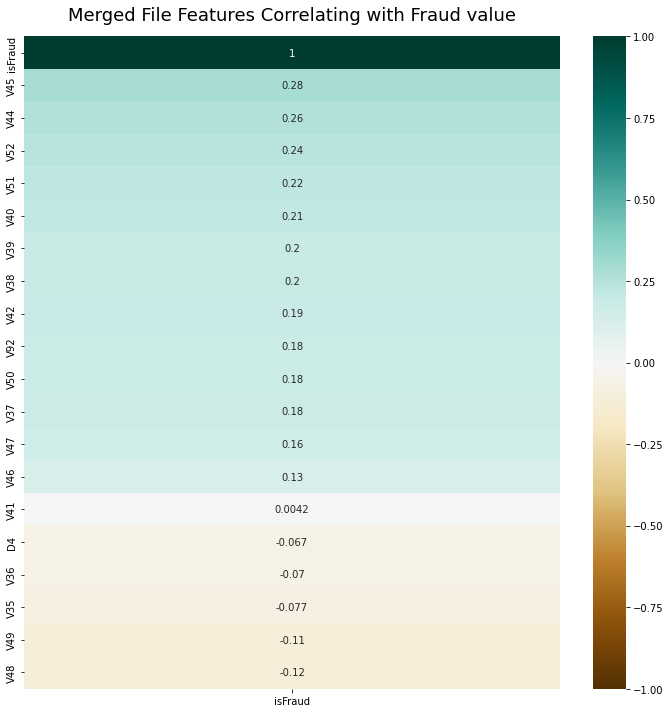

In [94]:
x = ['isFraud']+indexes_2[180:200].to_list()

x2= tmp.iloc[:,tmp.columns.isin(x)]

corr_isFraud = x2.corr()[['isFraud']].sort_values(by='isFraud', ascending=False)

plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(corr_isFraud, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Merged File Features Correlating with Fraud value', fontdict={'fontsize':18}, pad=16);

relevant_columns_positive = corr_isFraud.iloc[1:,:][corr_isFraud.iloc[1:,:] >= 0.1]
relevant_columns_negative = corr_isFraud.iloc[1:,:][corr_isFraud.iloc[1:,:] <= - 0.1]

relevant_columns_positive = relevant_columns_positive[relevant_columns_positive['isFraud'].isnull() == False]
relevant_columns_negative = relevant_columns_negative[relevant_columns_negative['isFraud'].isnull() == False]

relevant_columns_tmpi = pd.concat([relevant_columns_positive, relevant_columns_negative])


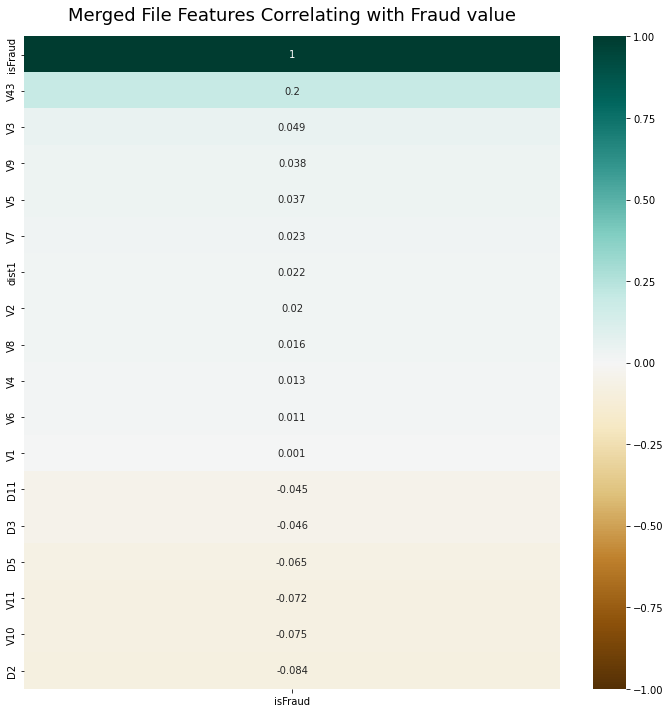

In [95]:
x = ['isFraud']+indexes_2[200:226].to_list()

x2= tmp.iloc[:,tmp.columns.isin(x)]

corr_isFraud = x2.corr()[['isFraud']].sort_values(by='isFraud', ascending=False)

plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(corr_isFraud, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Merged File Features Correlating with Fraud value', fontdict={'fontsize':18}, pad=16);

relevant_columns_positive = corr_isFraud.iloc[1:,:][corr_isFraud.iloc[1:,:] >= 0.1]
relevant_columns_negative = corr_isFraud.iloc[1:,:][corr_isFraud.iloc[1:,:] <= - 0.1]

relevant_columns_positive = relevant_columns_positive[relevant_columns_positive['isFraud'].isnull() == False]
relevant_columns_negative = relevant_columns_negative[relevant_columns_negative['isFraud'].isnull() == False]

relevant_columns_tmpj = pd.concat([relevant_columns_positive, relevant_columns_negative])


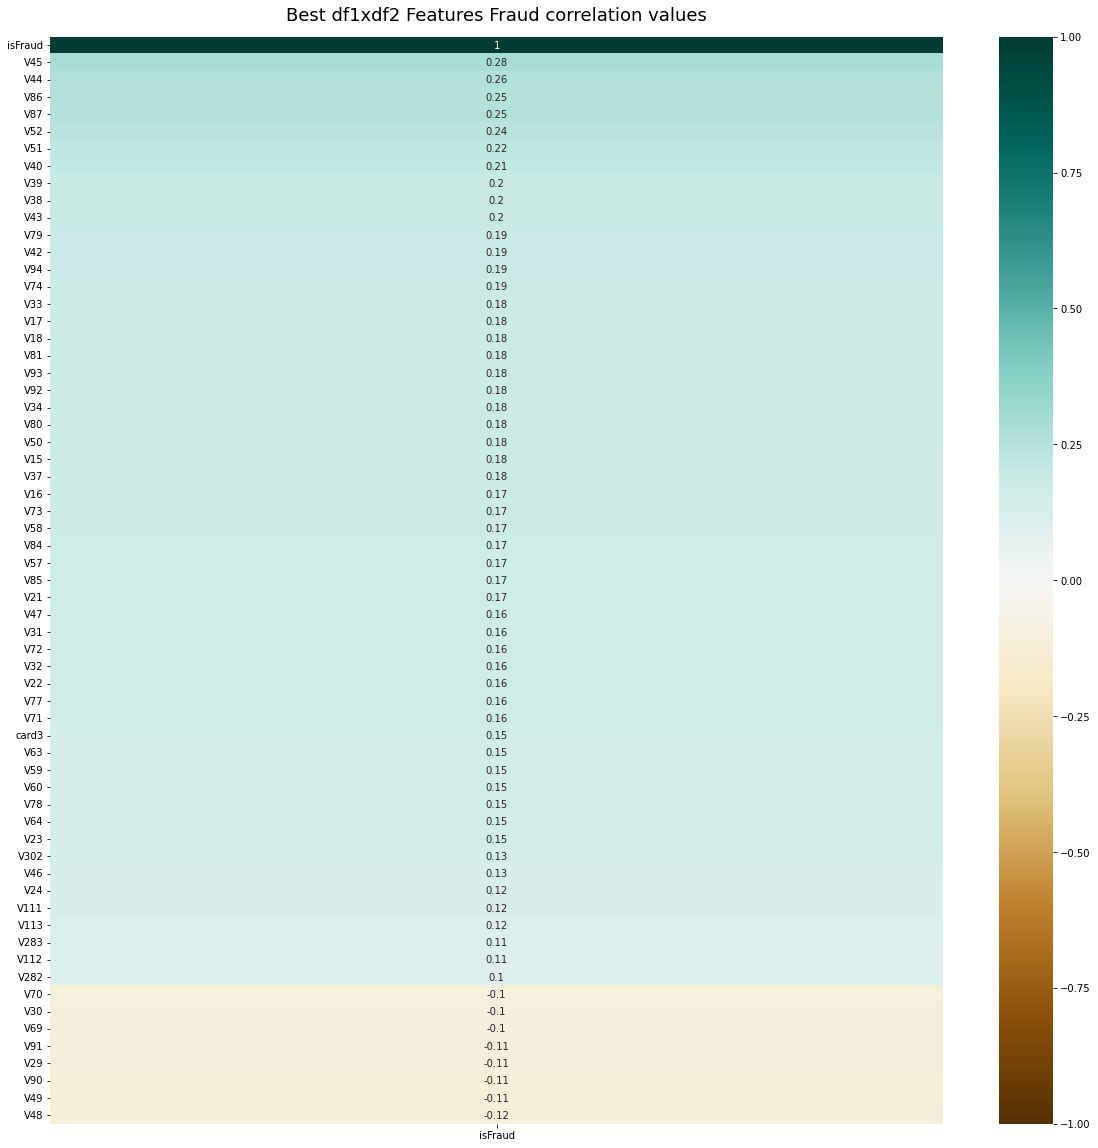

In [96]:
tmp_corr = pd.concat([
                  relevant_columns_tmpa, 
                  relevant_columns_tmpb,
                  relevant_columns_tmpc,
                  relevant_columns_tmpd,
                  relevant_columns_tmpe,
                  relevant_columns_tmpf,
                  relevant_columns_tmpg,
                  relevant_columns_tmph,
                  relevant_columns_tmpi,
                  relevant_columns_tmpj,
                  ]).sort_values(by='isFraud', ascending=False)

plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(tmp_corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Best df1xdf2 Features Fraud correlation values', fontdict={'fontsize':18}, pad=16);

In [97]:
relevant_data= tmp.iloc[:,tmp.columns.isin( tmp_corr.index.to_list() )]
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 63 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   isFraud  590540 non-null  int64  
 1   card3    588975 non-null  float64
 2   V15      514467 non-null  float64
 3   V16      514467 non-null  float64
 4   V17      514467 non-null  float64
 5   V18      514467 non-null  float64
 6   V21      514467 non-null  float64
 7   V22      514467 non-null  float64
 8   V23      514467 non-null  float64
 9   V24      514467 non-null  float64
 10  V29      514467 non-null  float64
 11  V30      514467 non-null  float64
 12  V31      514467 non-null  float64
 13  V32      514467 non-null  float64
 14  V33      514467 non-null  float64
 15  V34      514467 non-null  float64
 16  V37      421571 non-null  float64
 17  V38      421571 non-null  float64
 18  V39      421571 non-null  float64
 19  V40      421571 non-null  float64
 20  V42      421571 non-null  

#### Plotting Retrieved Feature ####
I'm going to plot the relevant feature for for fraud data to see if there is something we can discover

In [98]:
frauds = tmp[tmp['isFraud']==1]
frauds.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
203  2987203        1        89760          445.000         W         18268   
240  2987240        1        90193          37.098          C         13413   
243  2987243        1        90246          37.098          C         13413   
245  2987245        1        90295          37.098          C         13413   
288  2987288        1        90986          155.521         C         16578   

     card2  card3 card4  card5   card6  addr1  addr2  dist1  dist2  \
203  583.0  150.0  visa  226.0  credit  251.0  87.0  NaN    NaN      
240  103.0  185.0  visa  137.0  credit NaN    NaN    NaN    NaN      
243  103.0  185.0  visa  137.0  credit NaN    NaN    NaN    NaN      
245  103.0  185.0  visa  137.0  credit NaN    NaN    NaN    NaN      
288  545.0  185.0  visa  226.0  credit NaN    NaN    NaN    NaN      

    P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
203  aol.com       NaN           2.0  2.0  0.0  0.0  0.0  2.0  0.0  0.0  2.0   
240  hotmail.com   hotmail.com   0.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0   
243  hotmail.com   hotmail.com   1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0   
245  hotmail.com   hotmail.com   2.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0   
288  outlook.com   outlook.com   1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0   

     C10  C11  C12  C13  C14    D1    D2    D3   D4   D5   D6   D7         D8  \
203  0.0  1.0  0.0  4.0  2.0  57.0  57.0  52.0  0.0 NaN  NaN  NaN  NaN          
240  1.0  1.0  1.0  0.0  0.0  0.0  NaN   NaN    0.0 NaN   0.0 NaN   45.041664   
243  1.0  1.0  1.0  0.0  0.0  0.0  NaN   NaN    0.0  0.0  0.0  0.0  45.041664   
245  1.0  1.0  1.0  0.0  0.0  0.0  NaN   NaN    0.0  0.0  0.0  0.0  45.041664   
288  1.0  1.0  1.0  0.0  0.0  0.0  NaN   NaN    0.0 NaN   0.0 NaN  NaN          

           D9   D10  D11  D12  D13  D14    D15   M1   M2   M3  M4   M5   M6  \
203 NaN        80.0 NaN  NaN  NaN  NaN   374.0  NaN  NaN  NaN  M0  F    T     
240  0.041666  0.0  NaN   0.0  0.0  0.0  0.0    NaN  NaN  NaN  M2  NaN  NaN   
243  0.041666  0.0  NaN   0.0  0.0  0.0  0.0    NaN  NaN  NaN  M2  NaN  NaN   
245  0.041666  0.0  NaN   0.0  0.0  0.0  0.0    NaN  NaN  NaN  M2  NaN  NaN   
288 NaN        0.0  NaN   0.0  0.0  0.0  0.0    NaN  NaN  NaN  M2  NaN  NaN   

      M7   M8   M9  V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  V12  V13  \
203  NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN   1.0  1.0   
240  NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN   0.0  0.0   
243  NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN   0.0  0.0   
245  NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN   0.0  0.0   
288  NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN   0.0  0.0   

     V14  V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  \
203  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
240  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
243  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  1.0  1.0  0.0   
245  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  3.0  3.0  1.0  1.0  0.0   
288  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   

     V28  V29  V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  \
203  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0   
240  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
243  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
245  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
288  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   

     V42  V43  V44  V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  \
203  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0   
240  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0 NaN  NaN  NaN    
243  1.0  1.0  2.0  2.0  1.0  1.0  0.0  

#### Relevant Feature Plotting ####
<p>I'm ploting each relavant feature by basic categorical values and fraud amount in order to see how these fetures impact on frauds values</p>
</p>Even though we don't know what these features rapresent we can see that only some particular value raise on frauds rows</p>

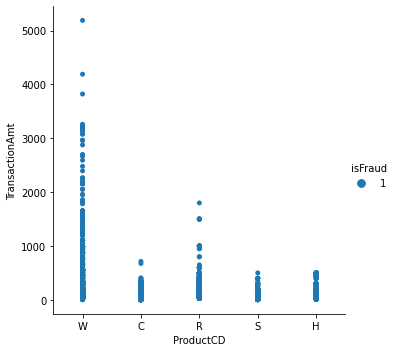

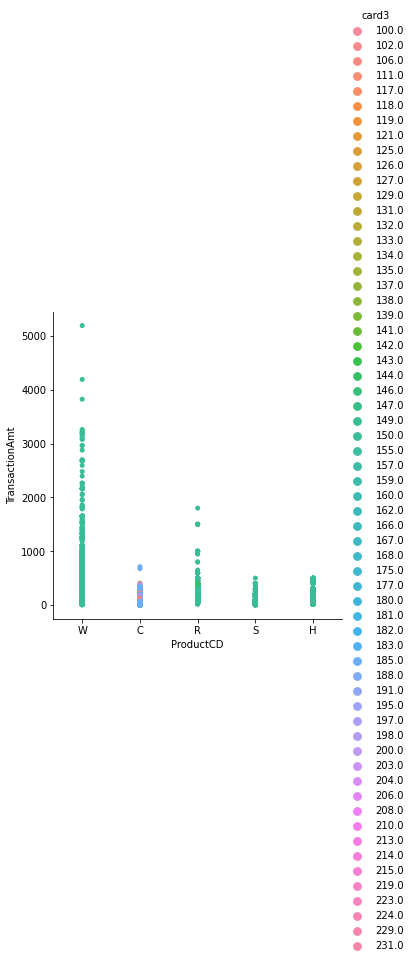

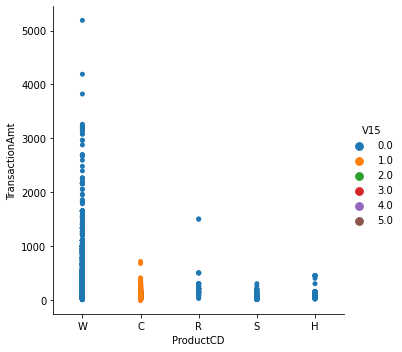

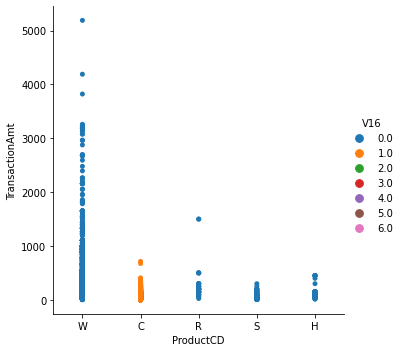

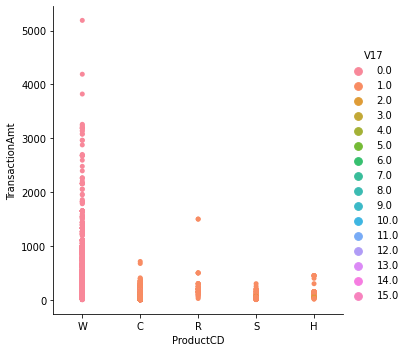

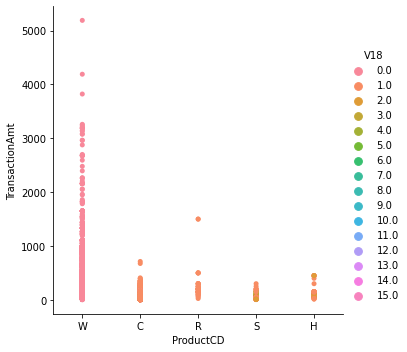

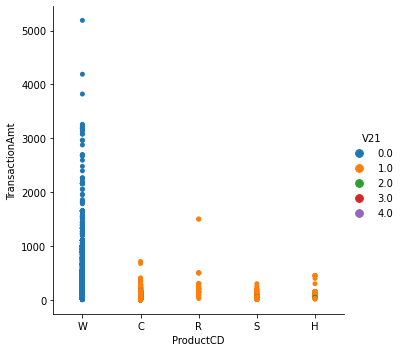

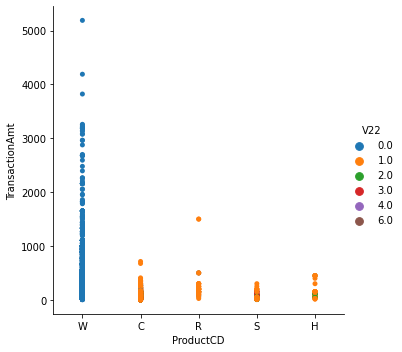

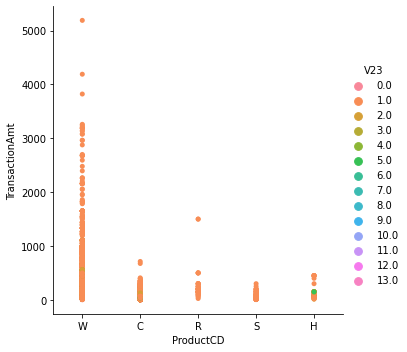

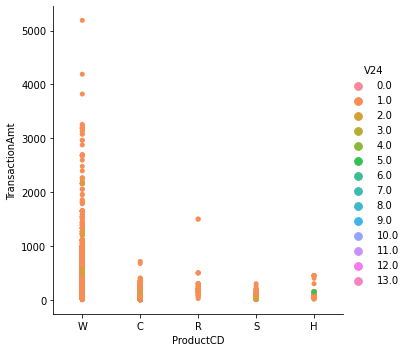

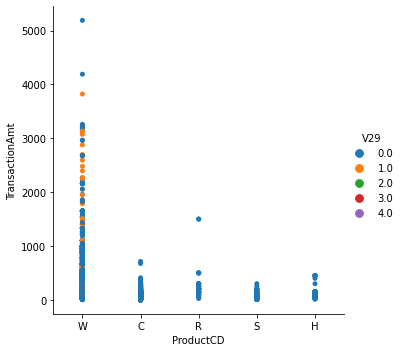

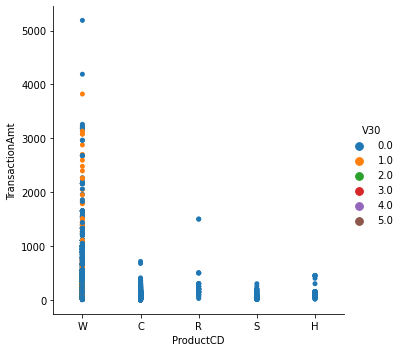

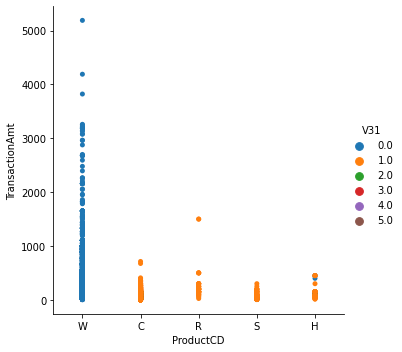

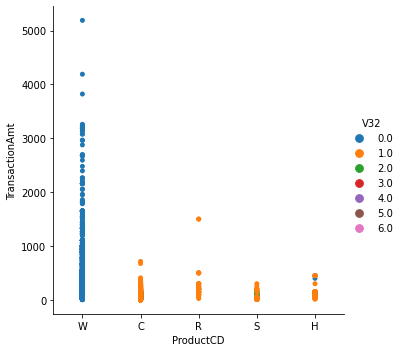

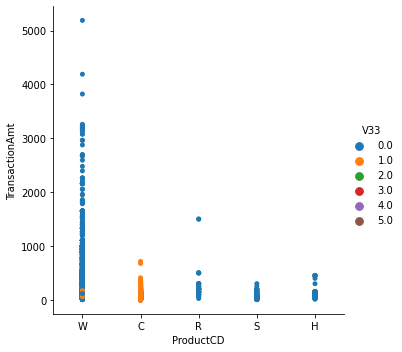

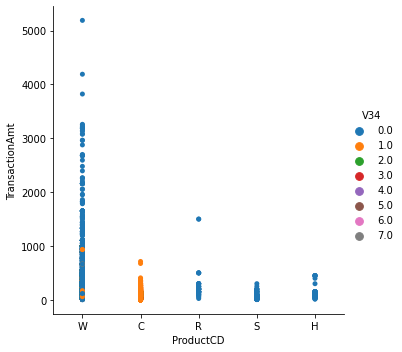

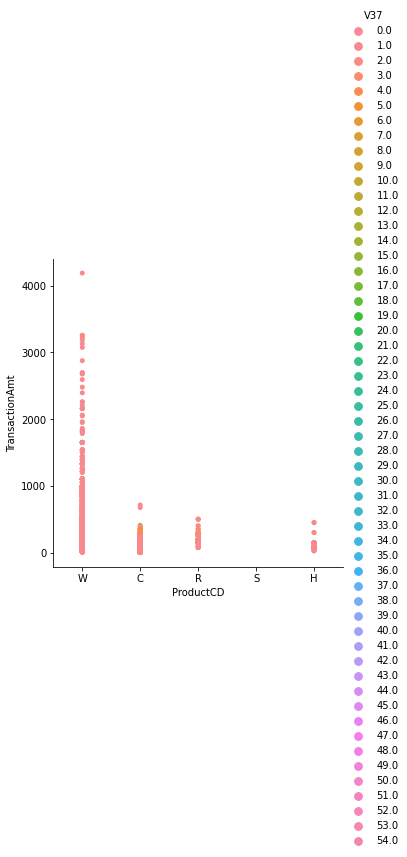

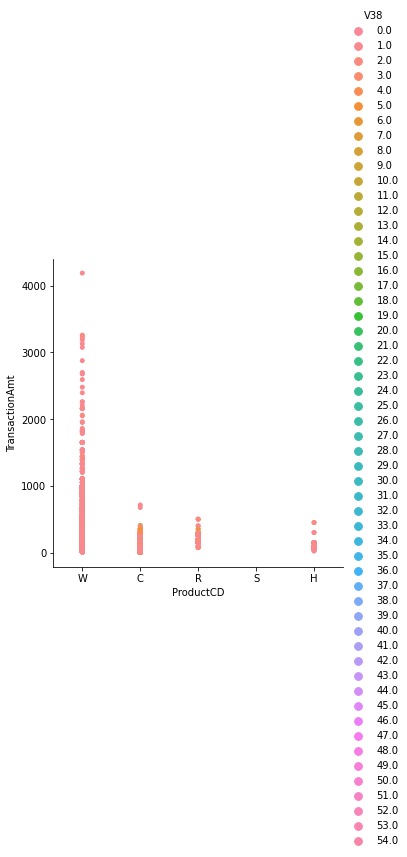

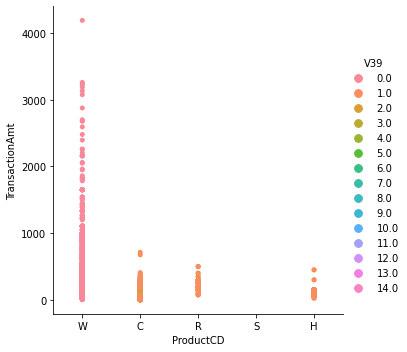

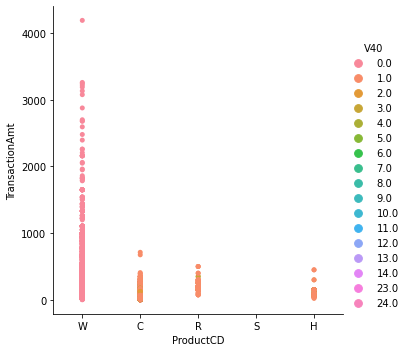

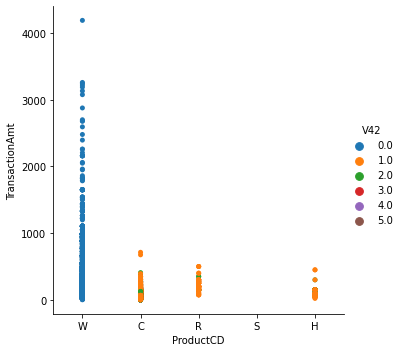

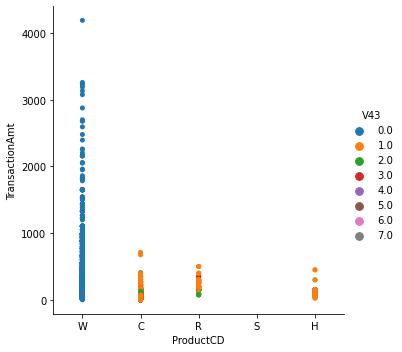

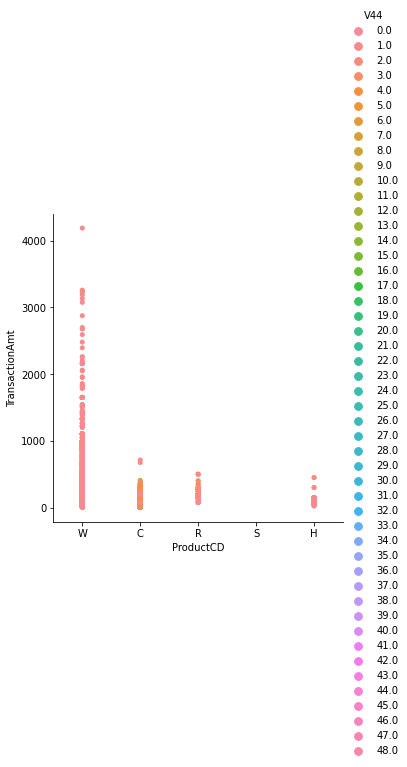

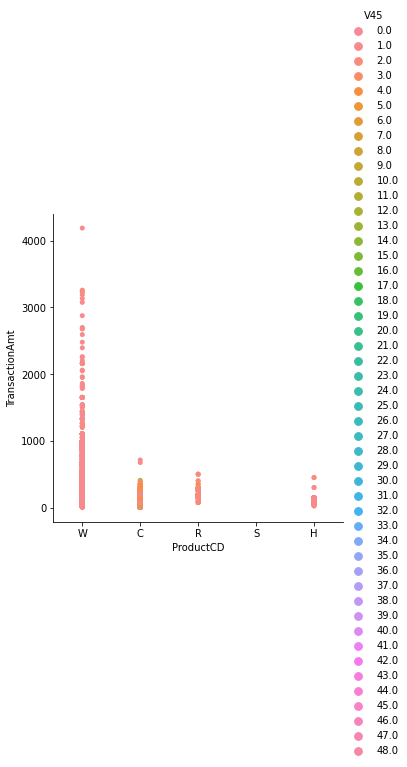

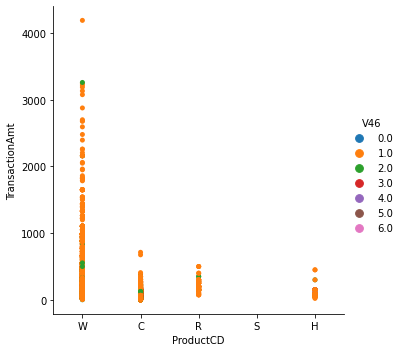

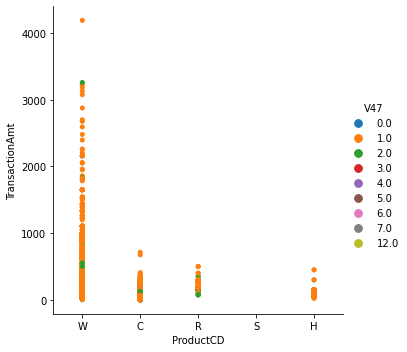

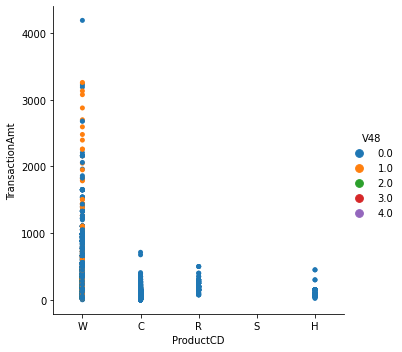

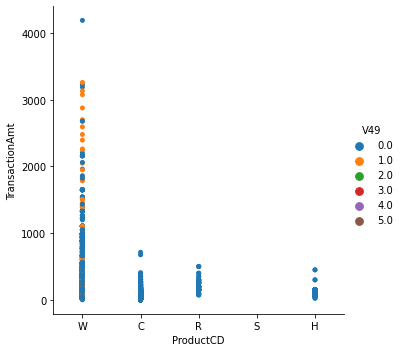

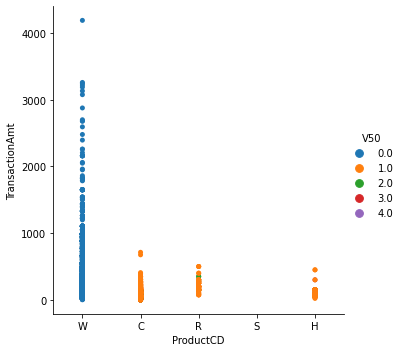

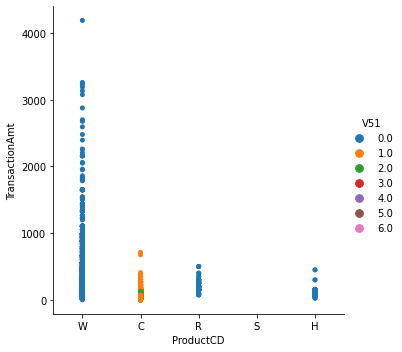

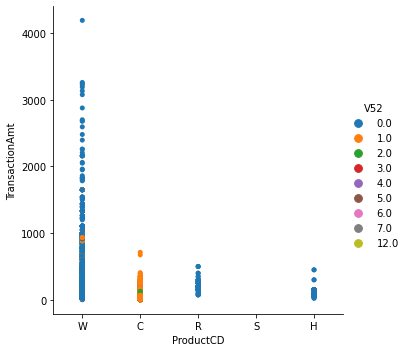

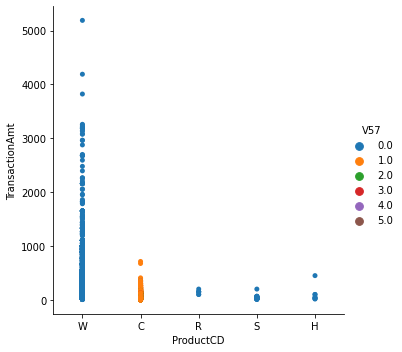

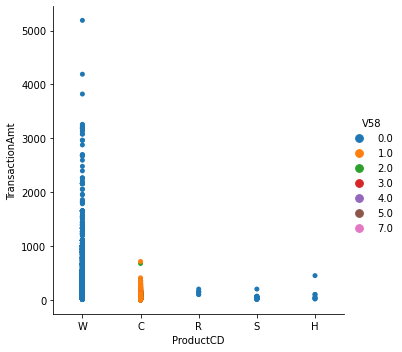

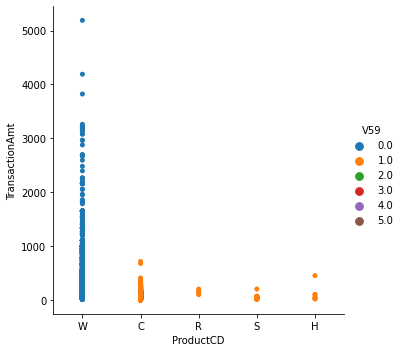

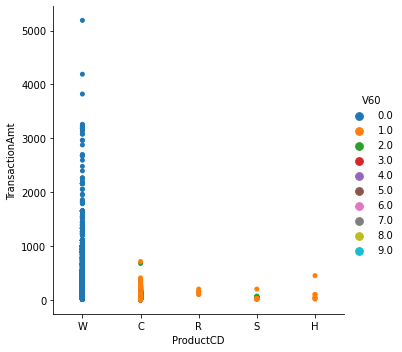

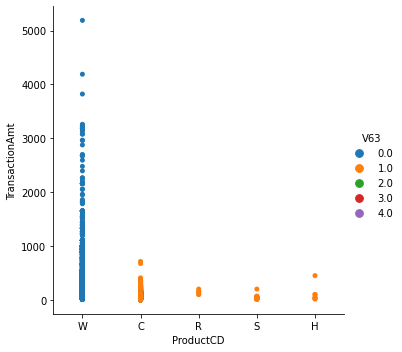

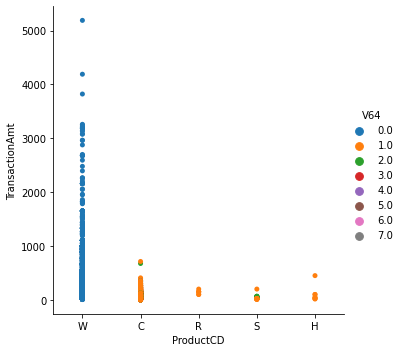

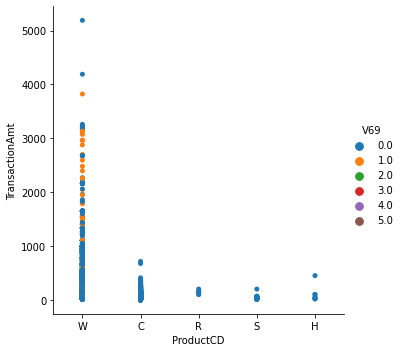

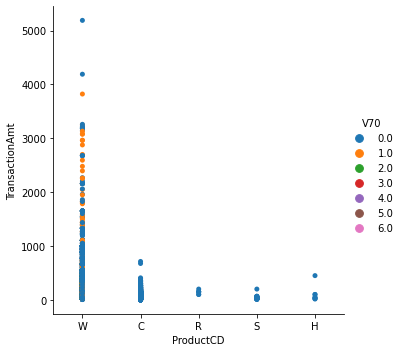

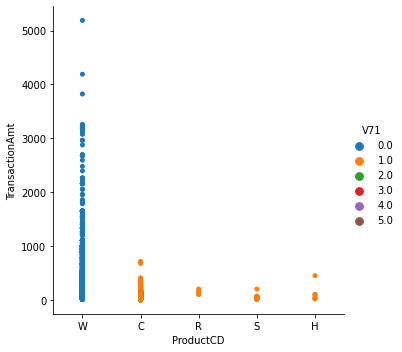

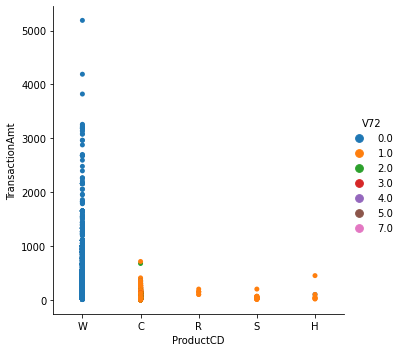

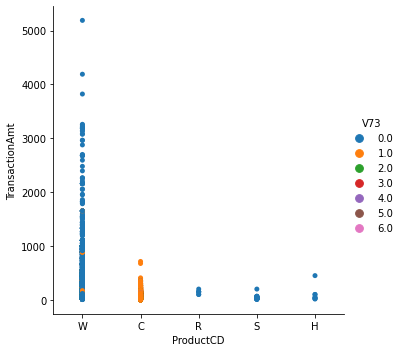

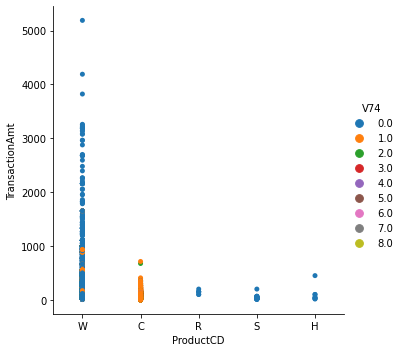

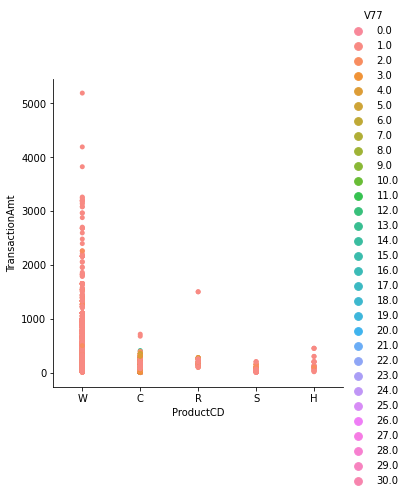

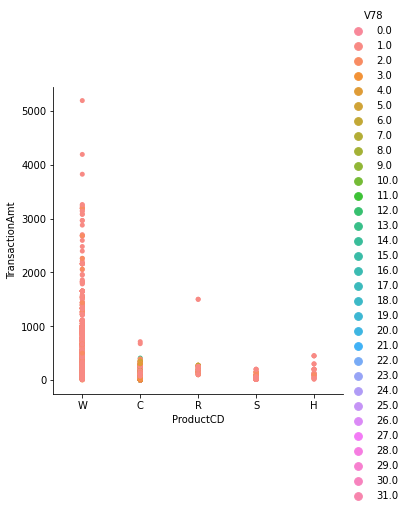

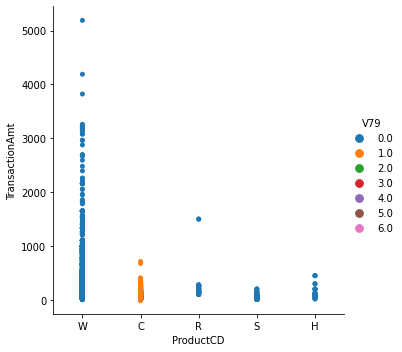

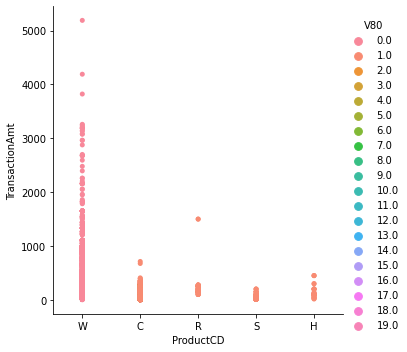

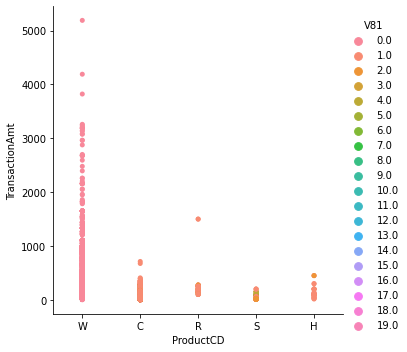

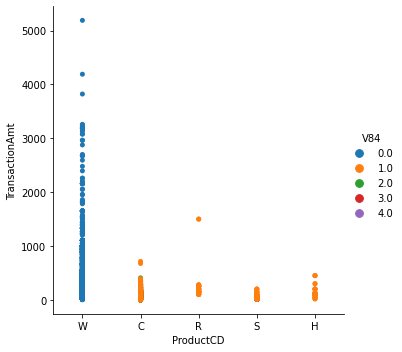

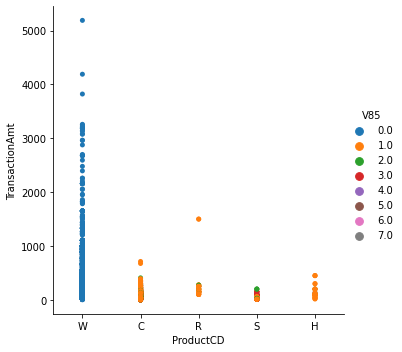

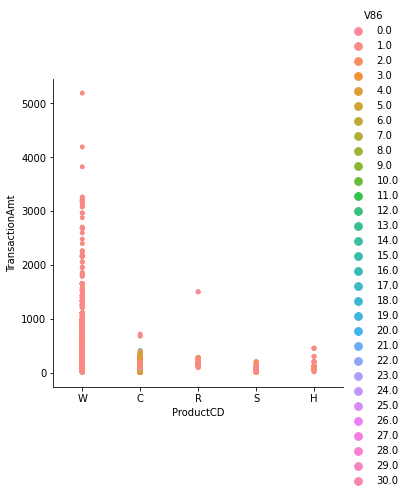

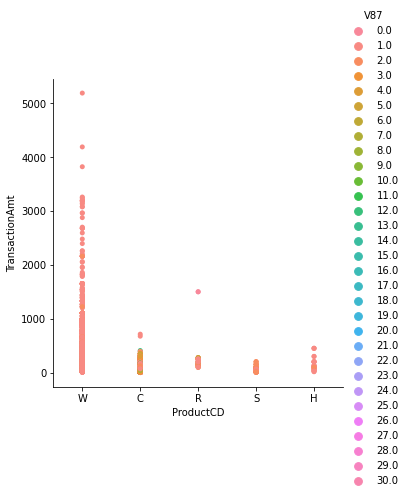

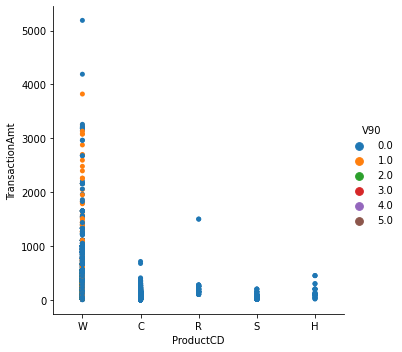

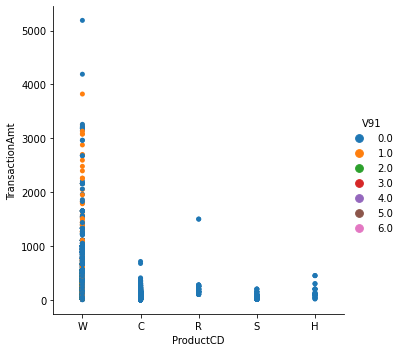

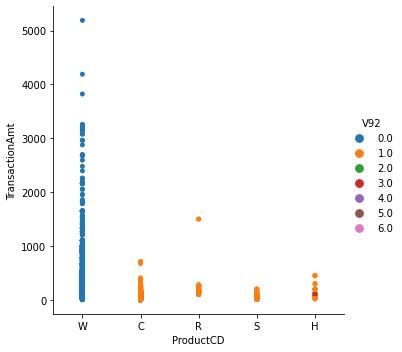

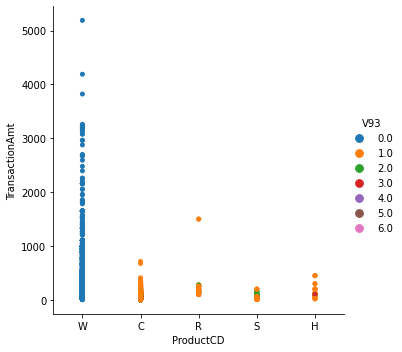

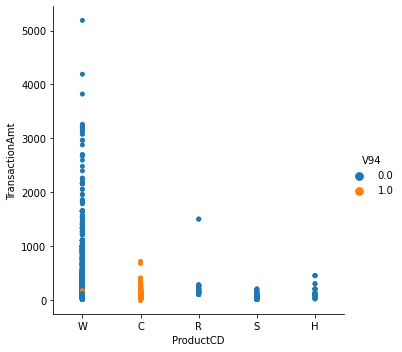

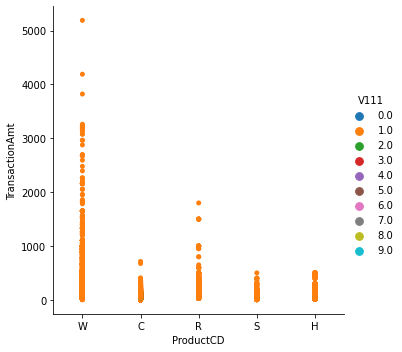

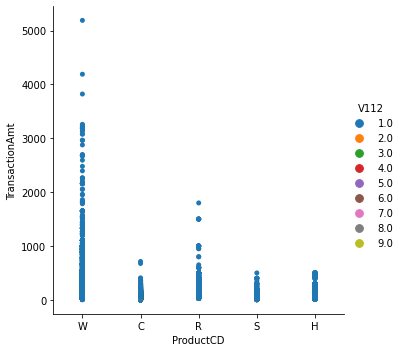

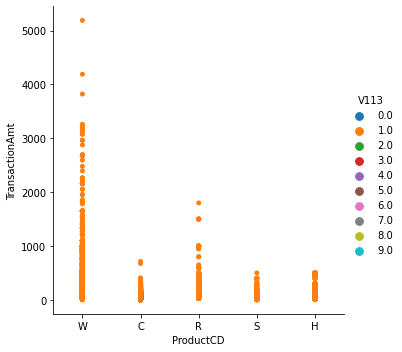

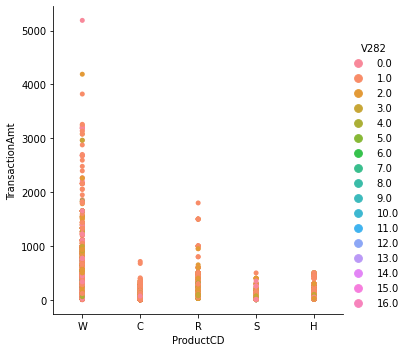

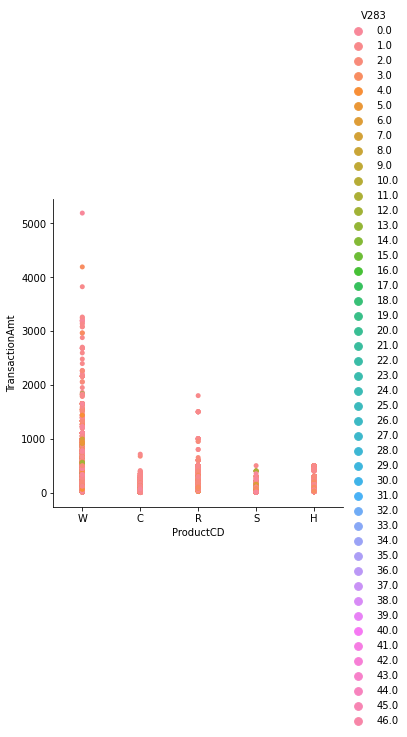

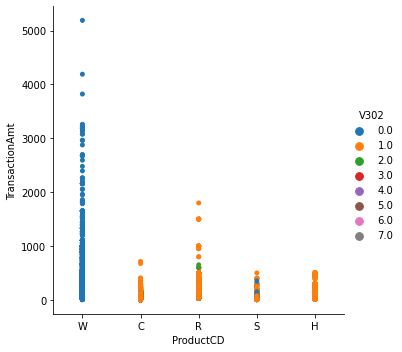

<Figure size 432x288 with 0 Axes>

In [99]:
for c in relevant_data.columns:
  sns.catplot(x="ProductCD", y="TransactionAmt", jitter = False, hue= c , data=frauds )
plt.show()
plt.tight_layout()

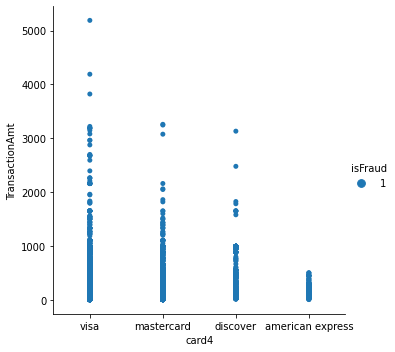

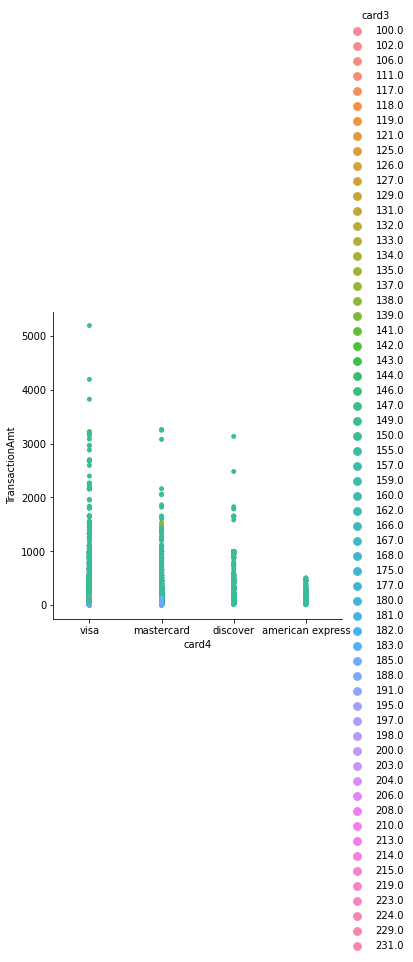

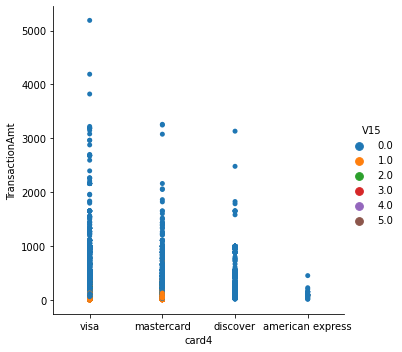

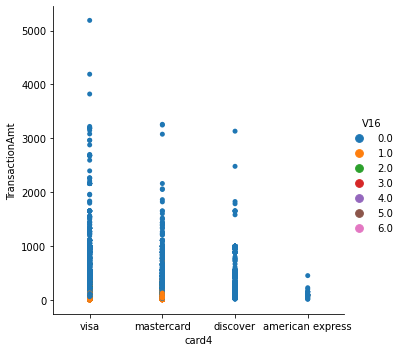

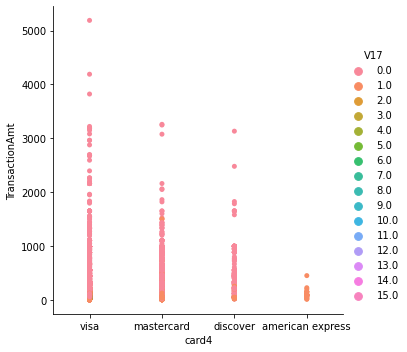

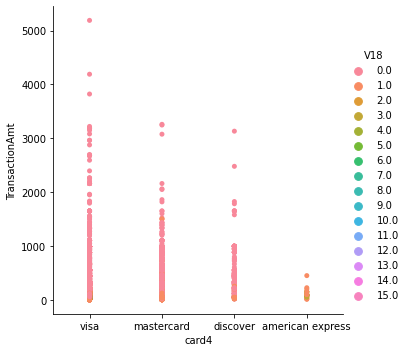

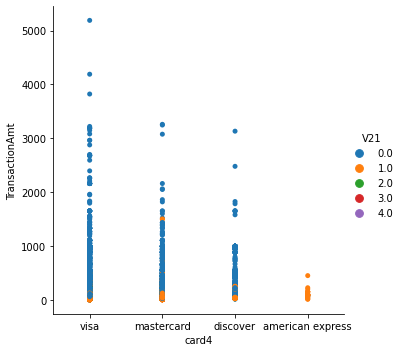

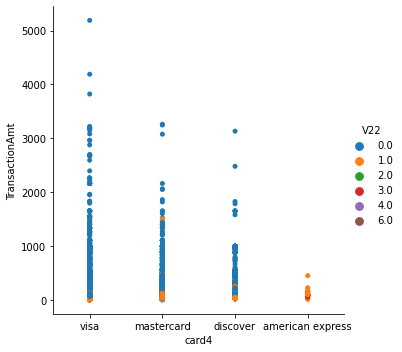

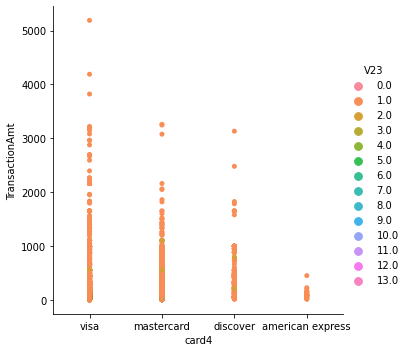

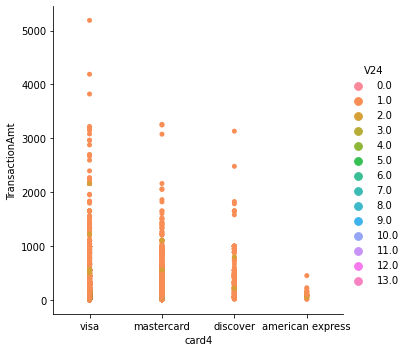

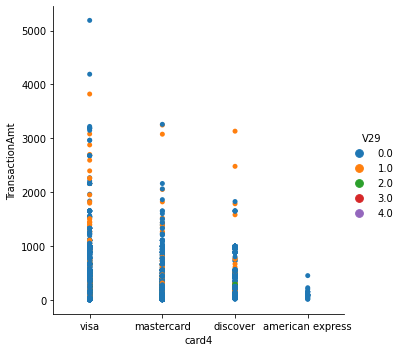

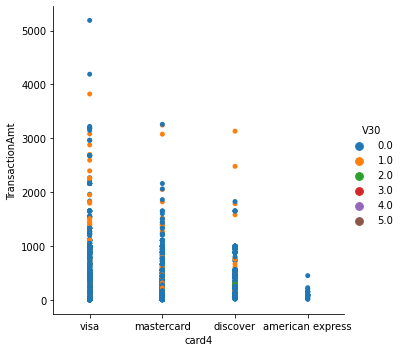

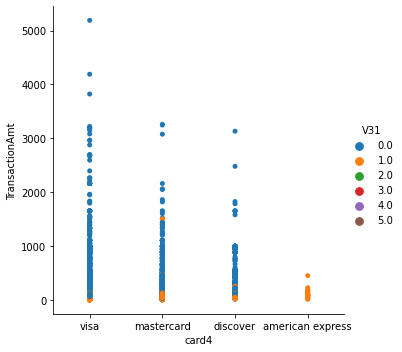

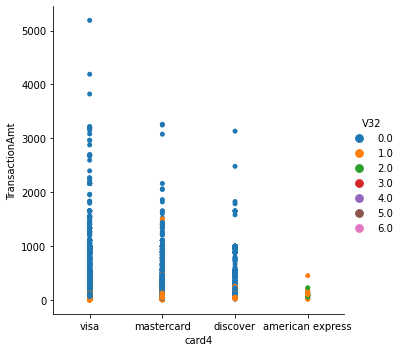

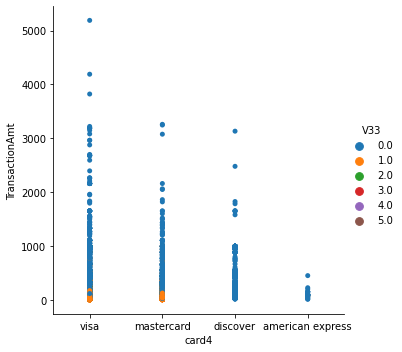

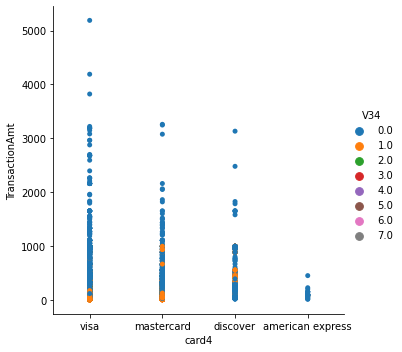

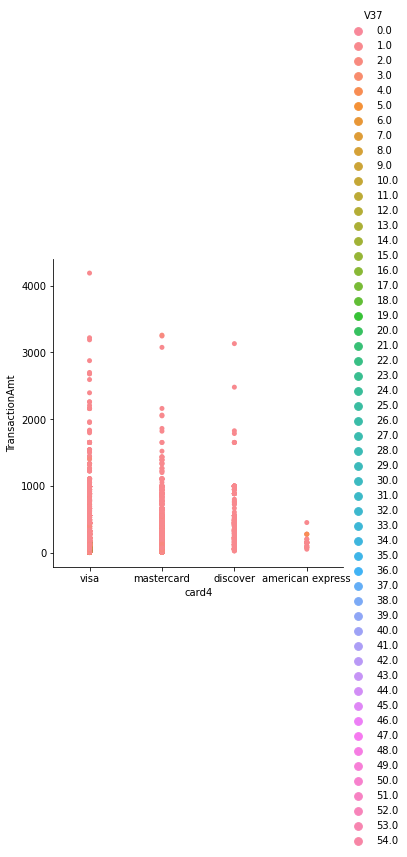

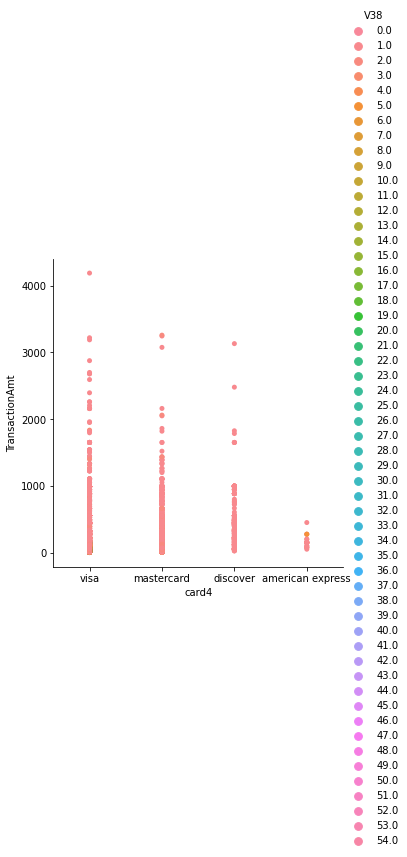

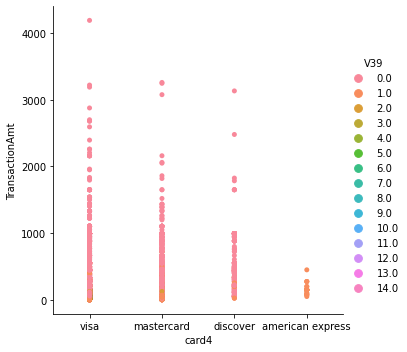

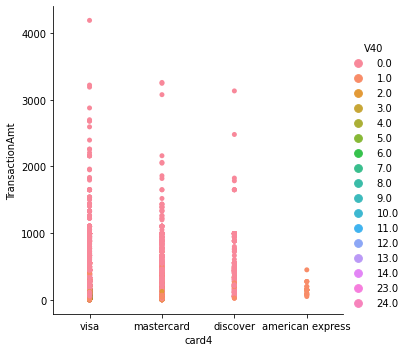

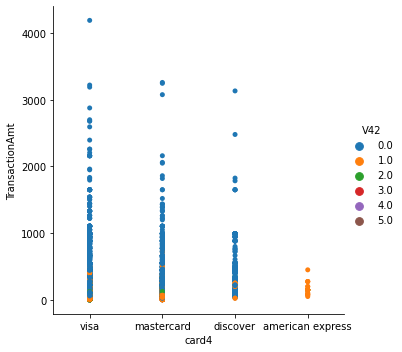

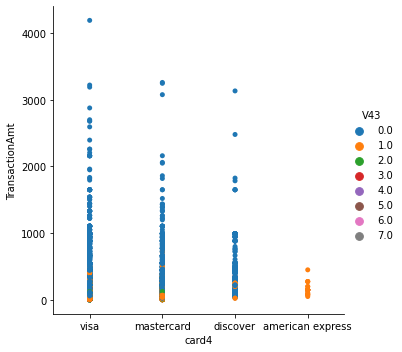

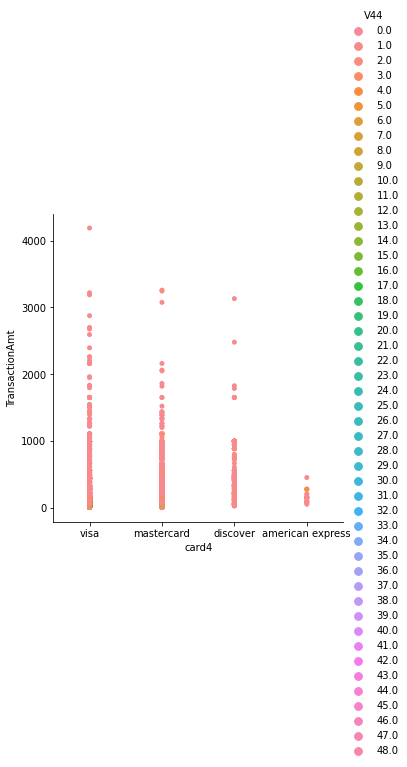

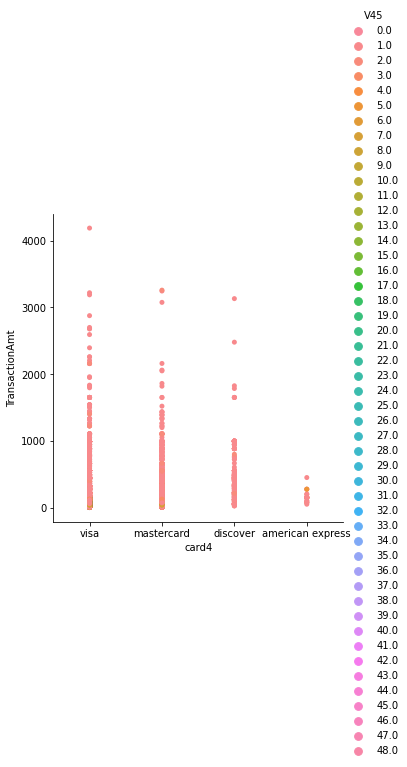

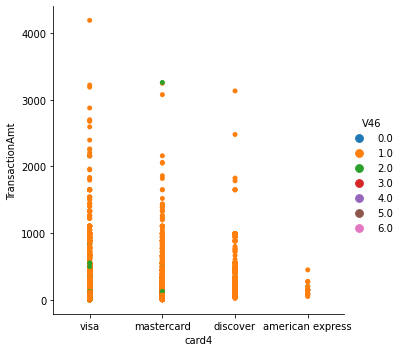

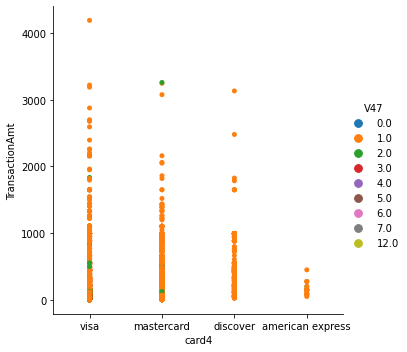

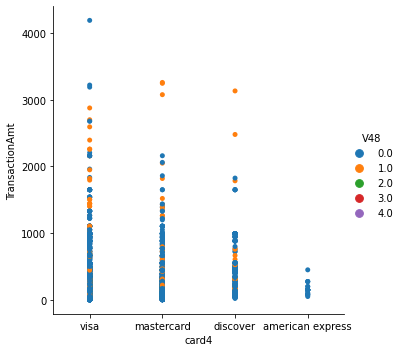

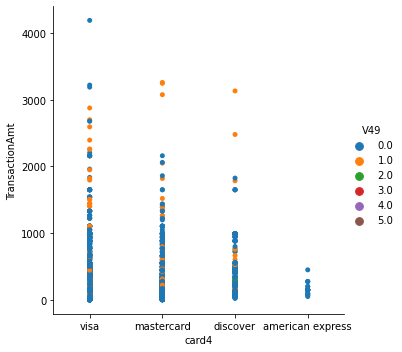

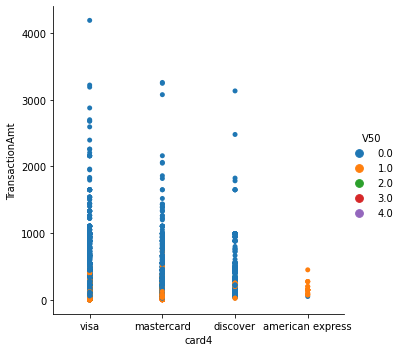

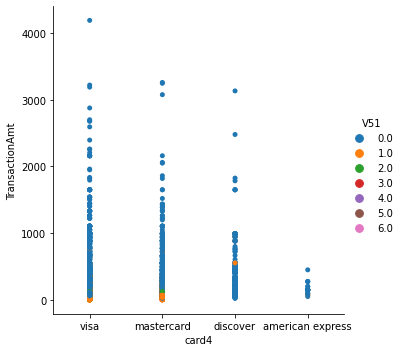

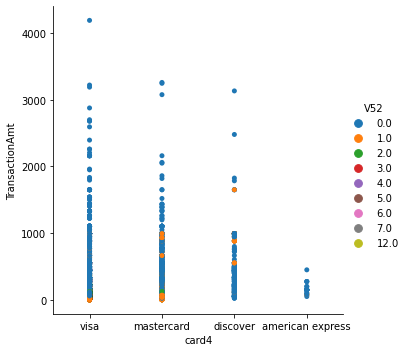

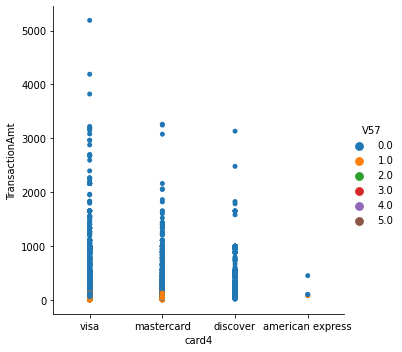

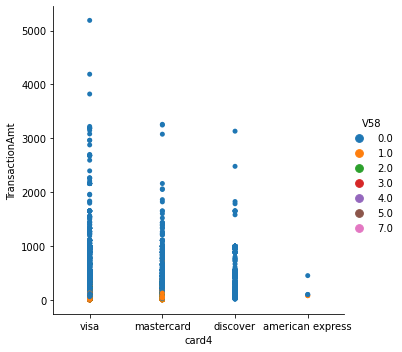

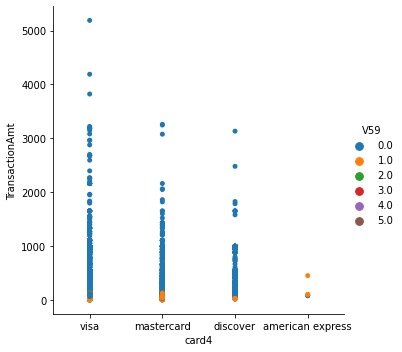

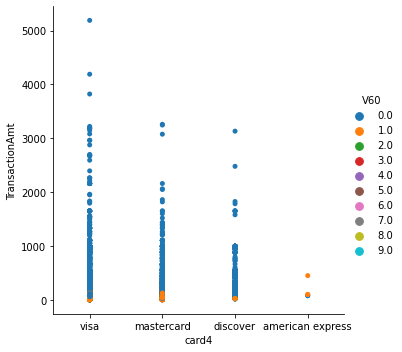

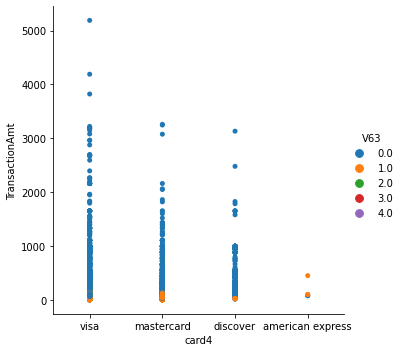

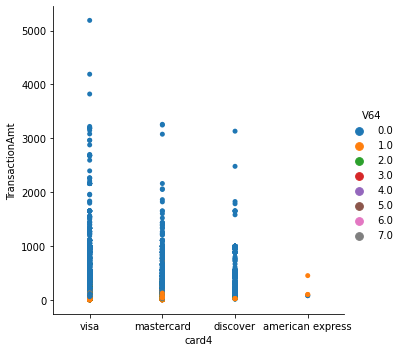

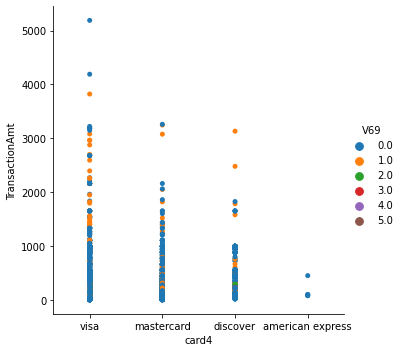

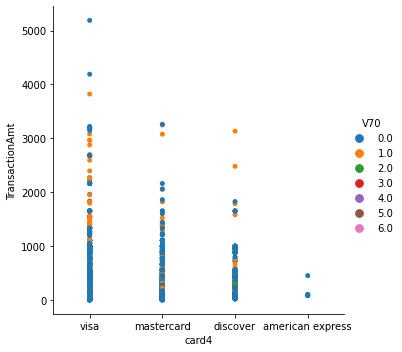

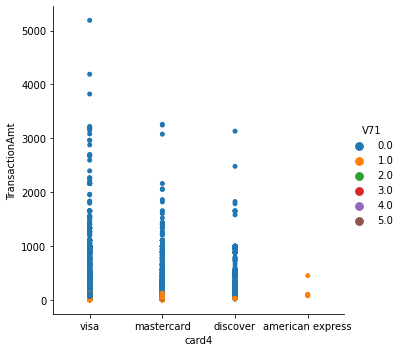

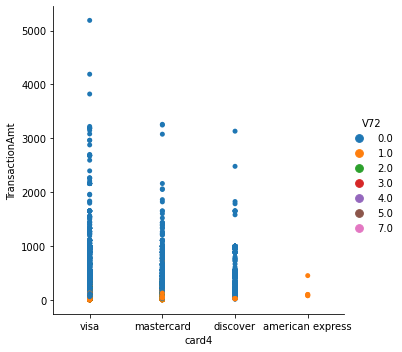

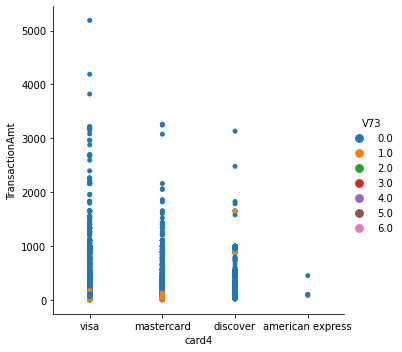

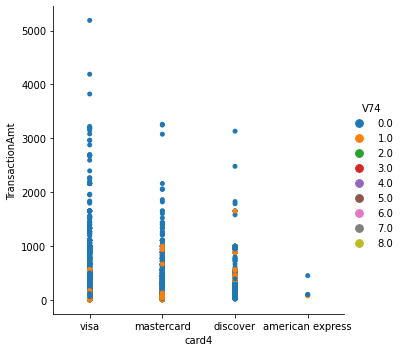

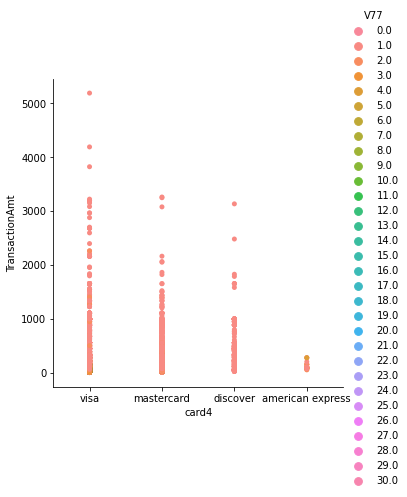

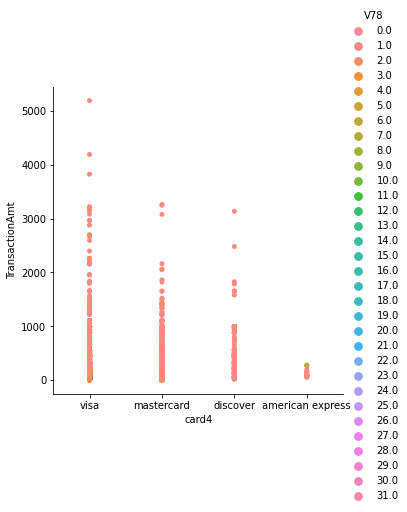

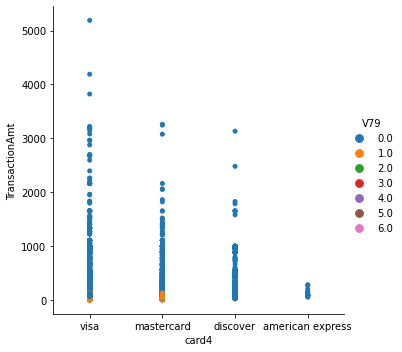

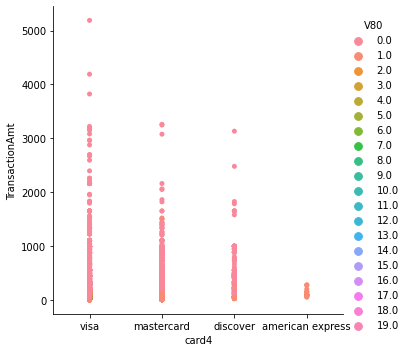

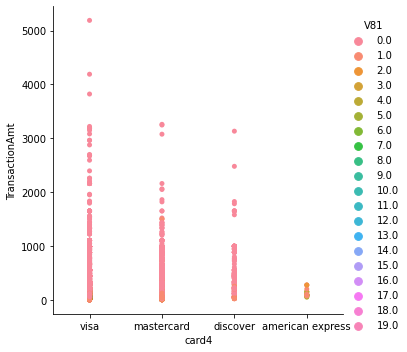

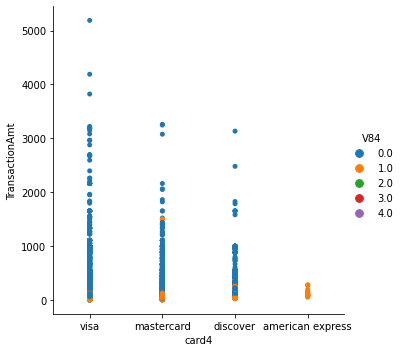

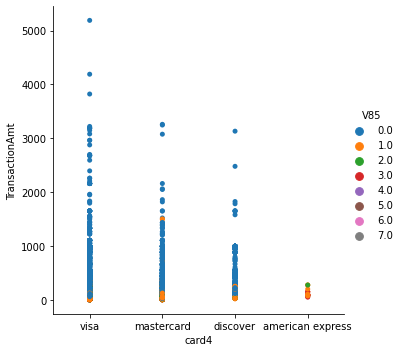

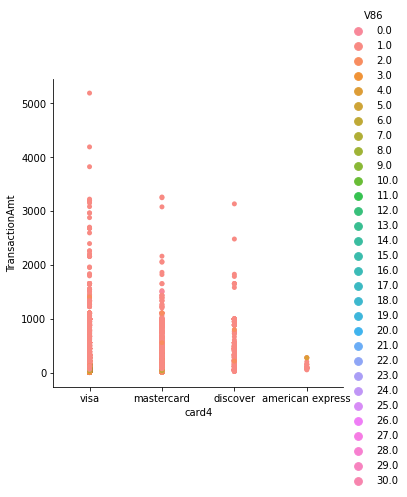

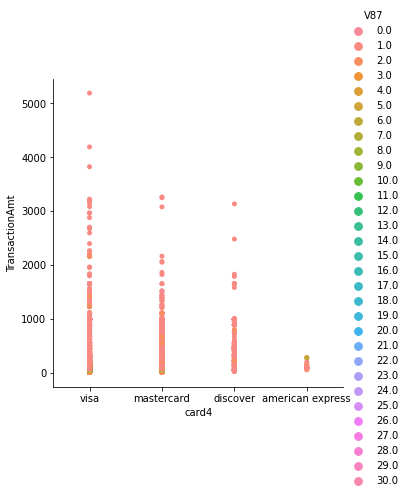

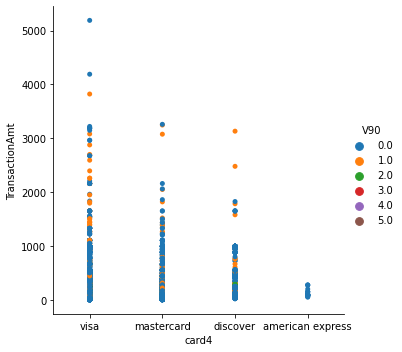

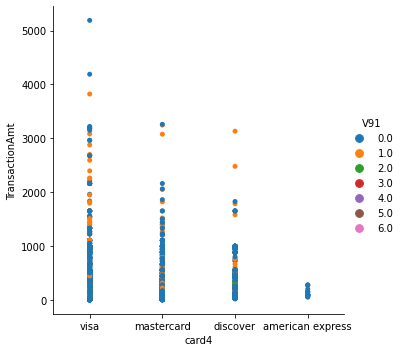

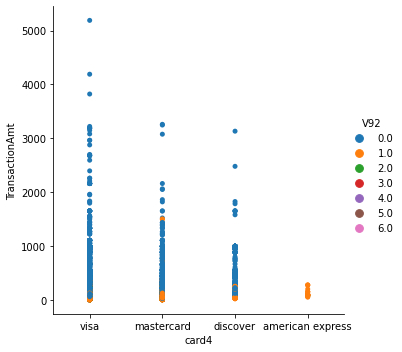

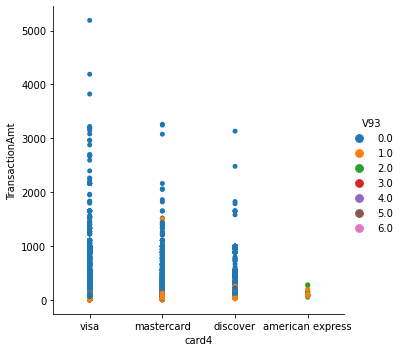

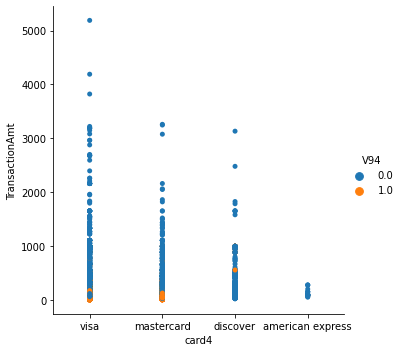

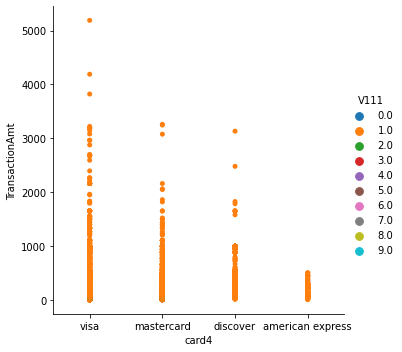

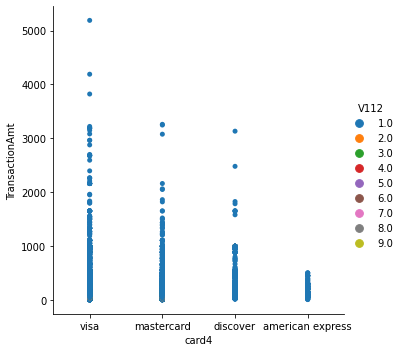

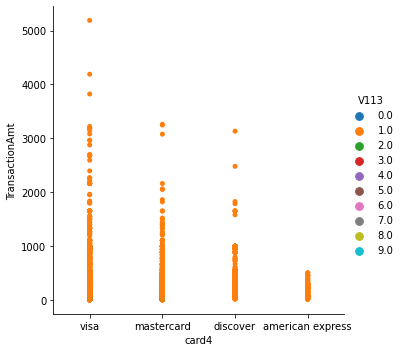

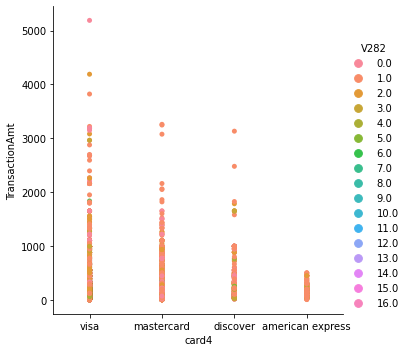

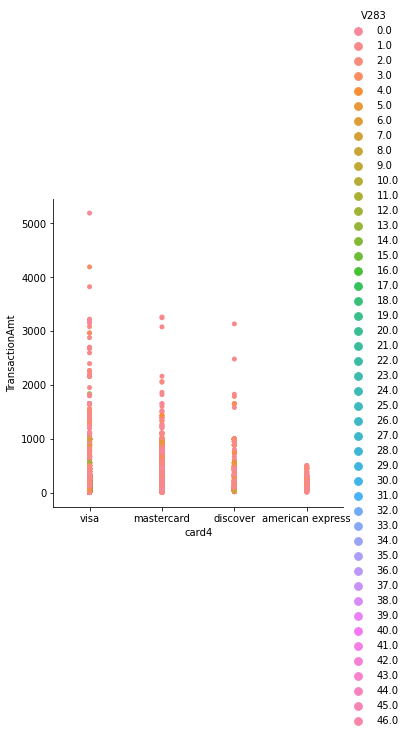

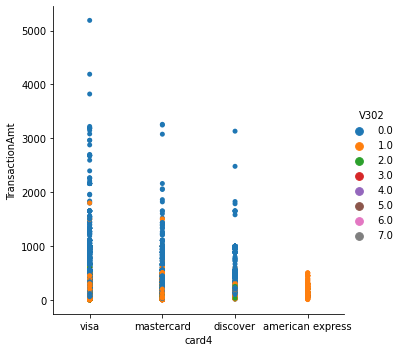

<Figure size 432x288 with 0 Axes>

In [100]:
for c in relevant_data.columns:
  sns.catplot(x="card4", y="TransactionAmt", jitter = False, hue= c , data=frauds )
plt.show()
plt.tight_layout()

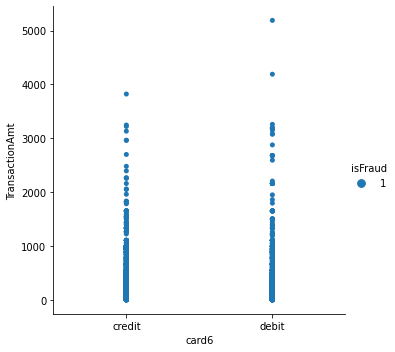

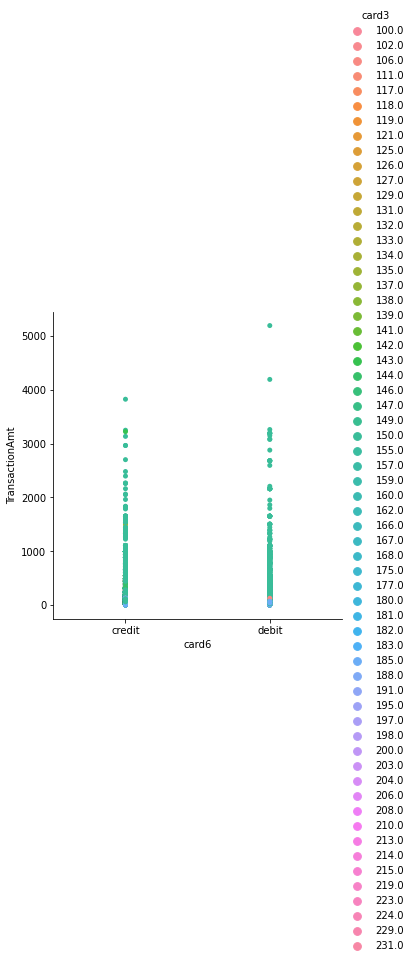

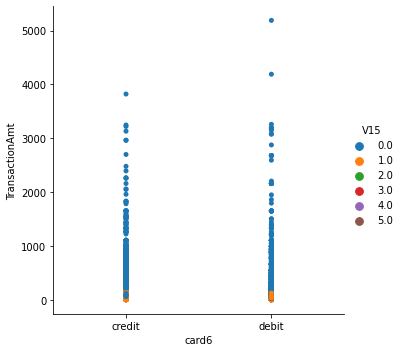

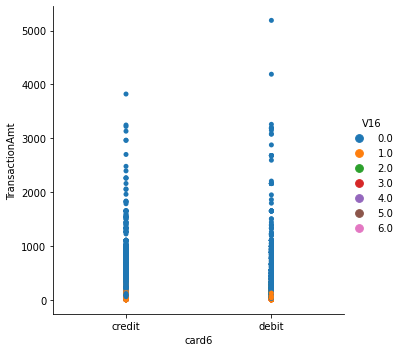

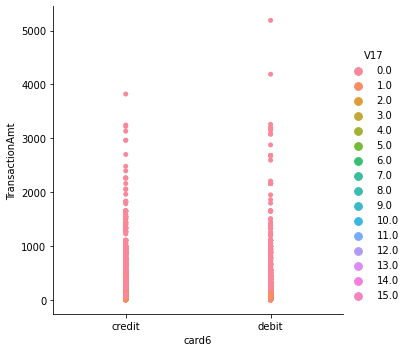

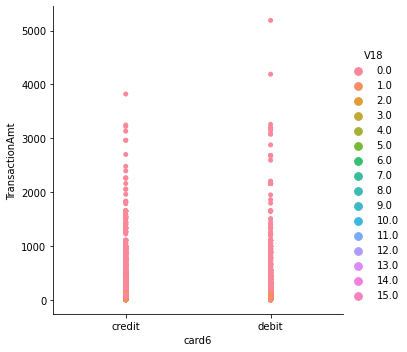

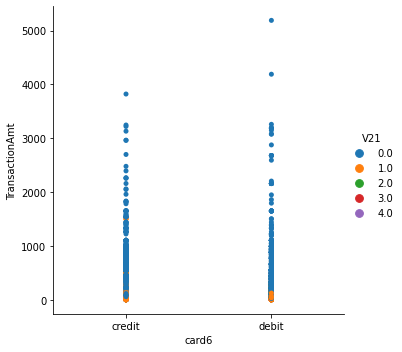

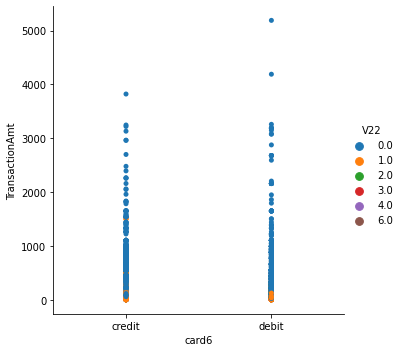

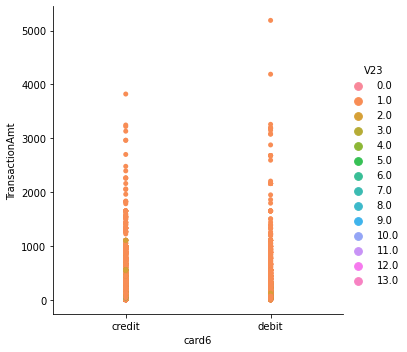

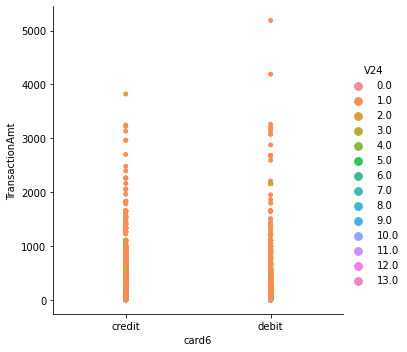

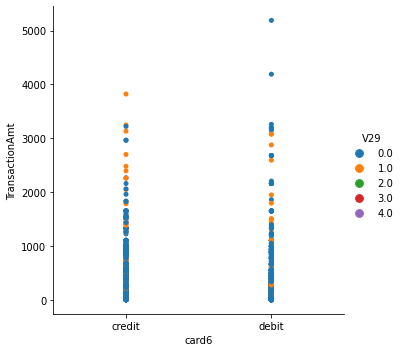

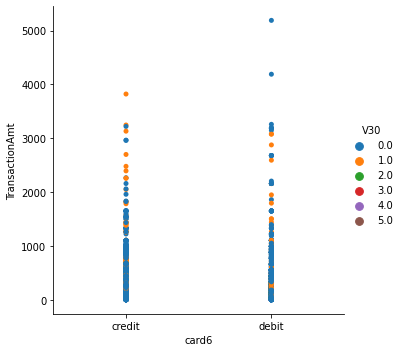

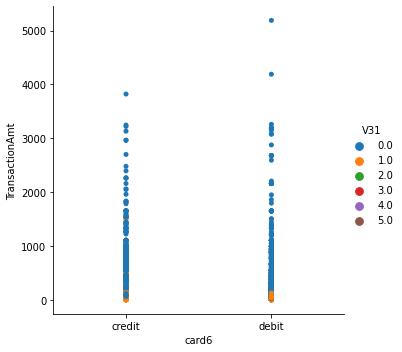

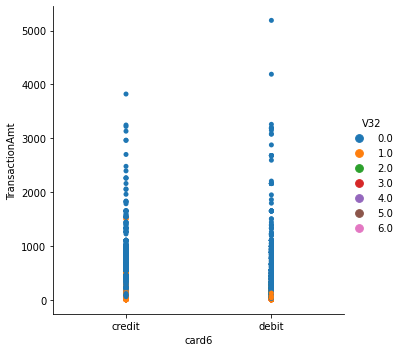

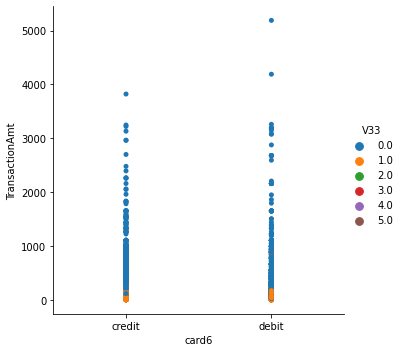

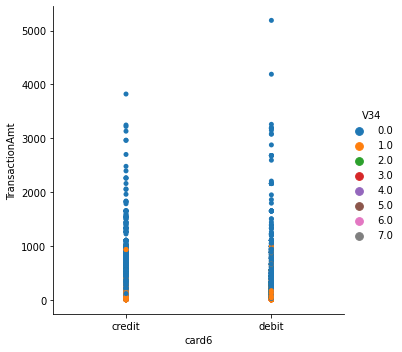

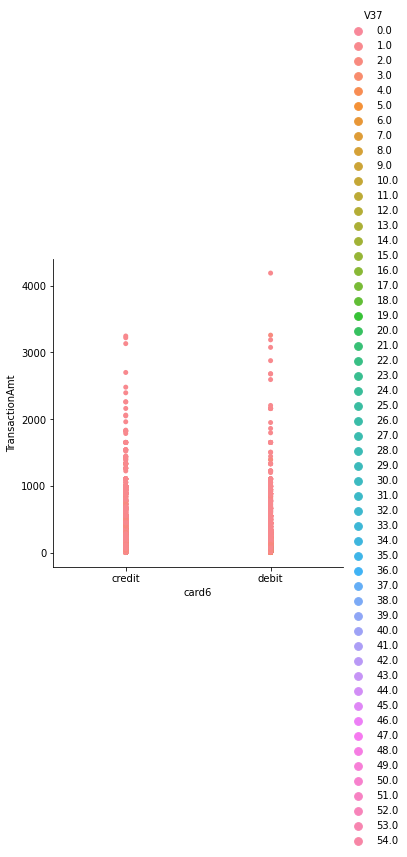

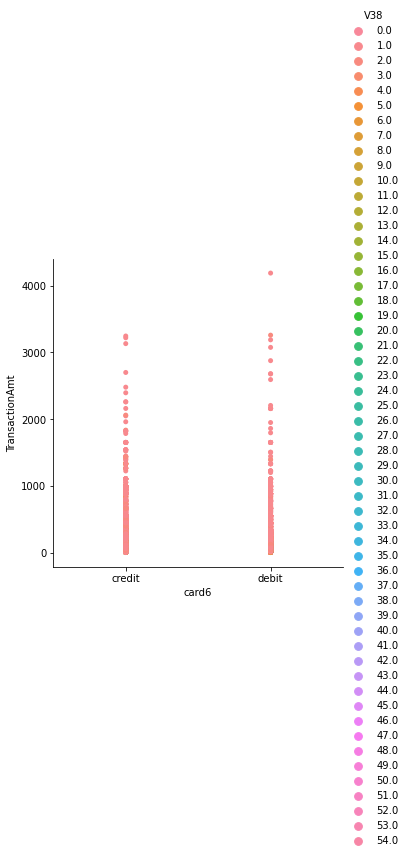

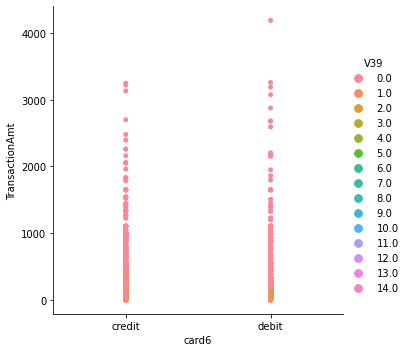

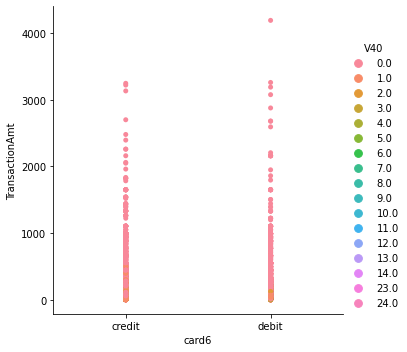

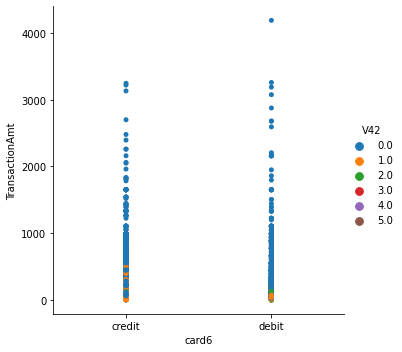

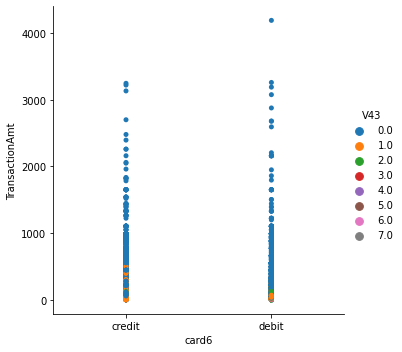

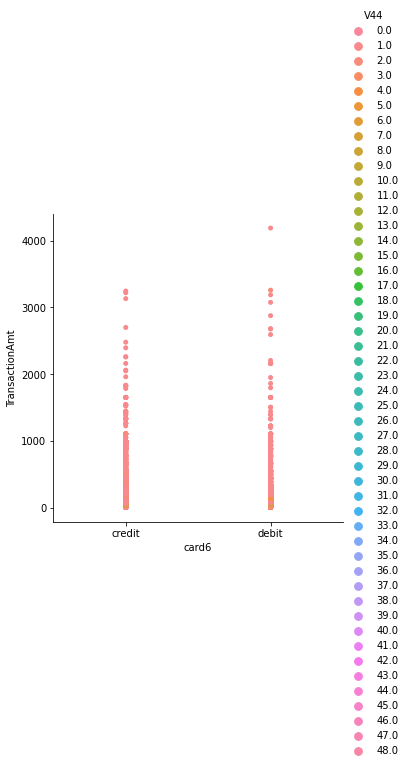

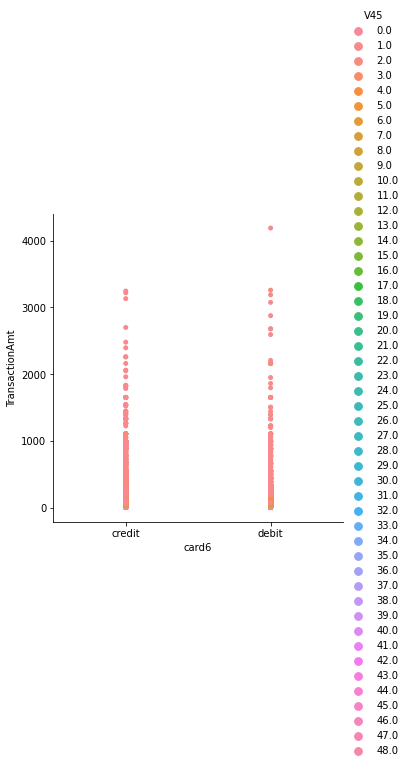

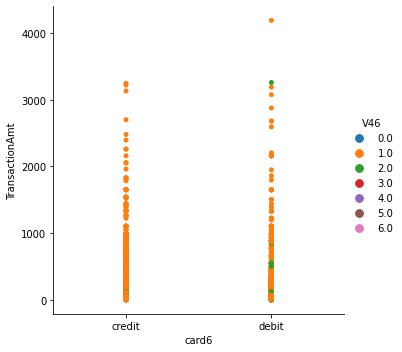

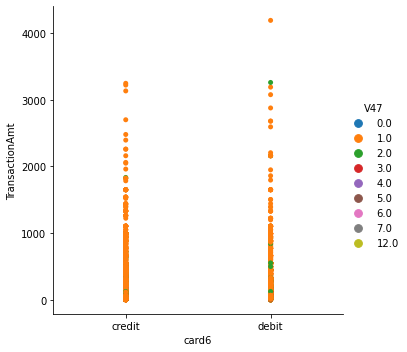

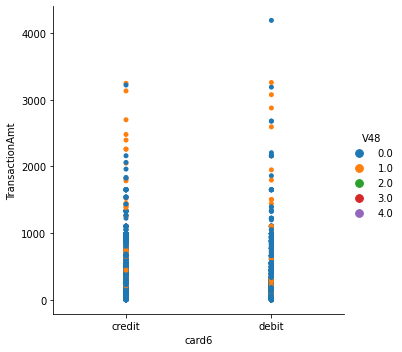

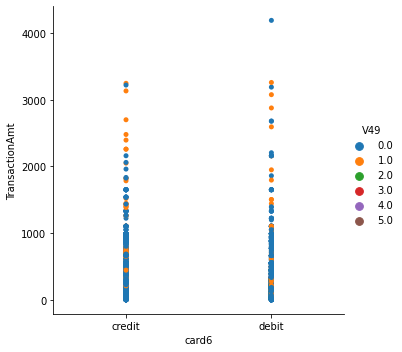

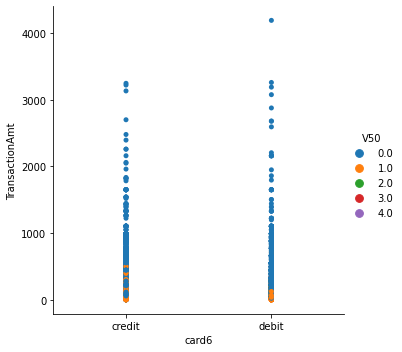

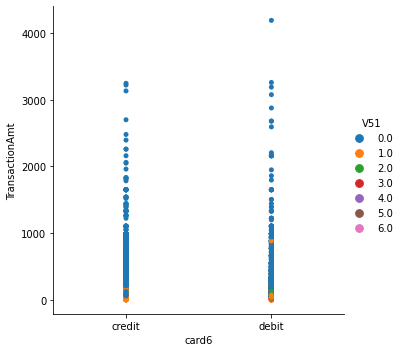

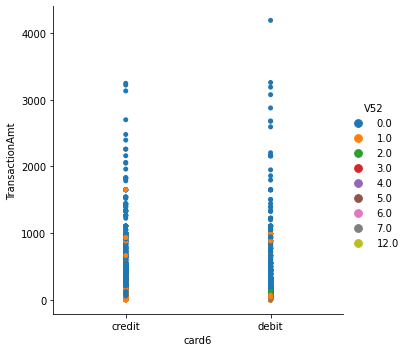

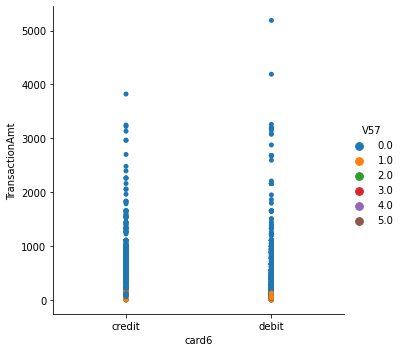

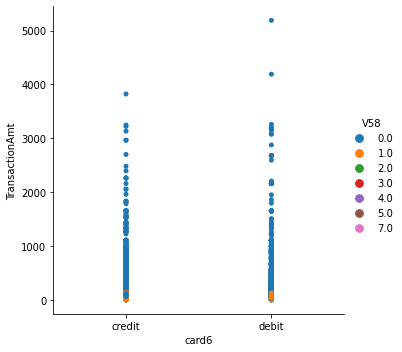

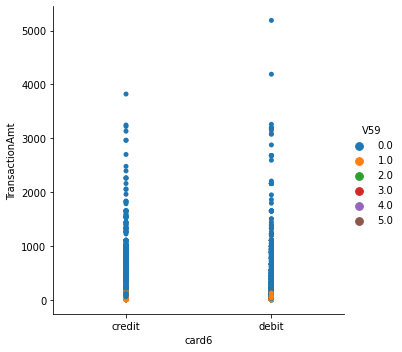

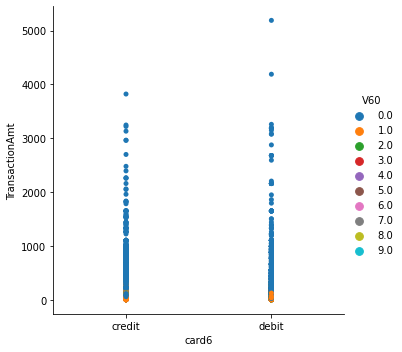

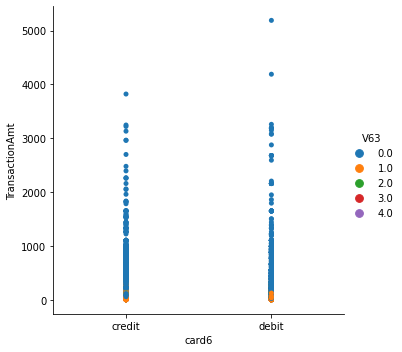

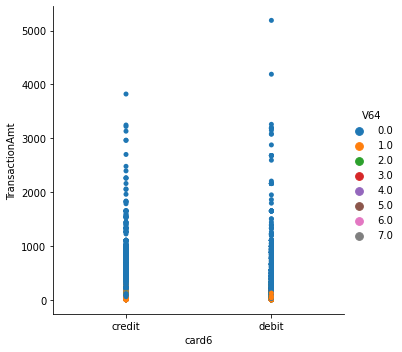

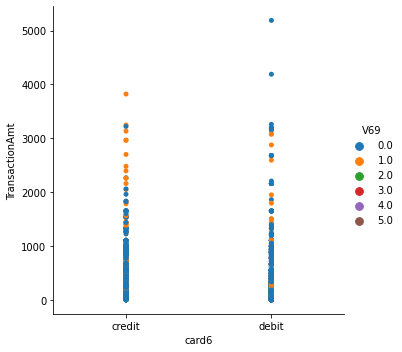

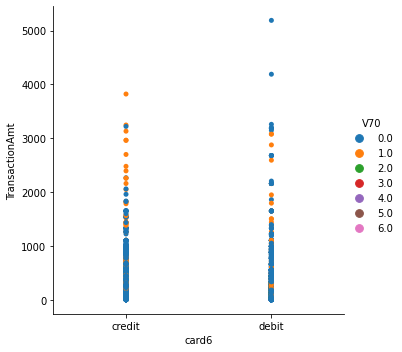

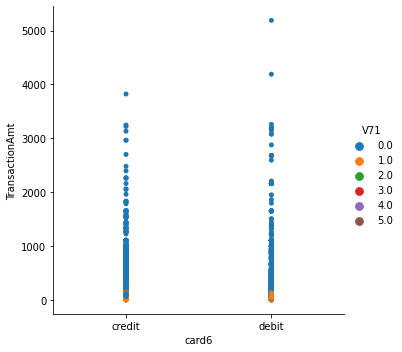

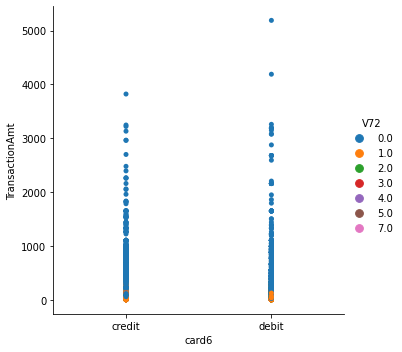

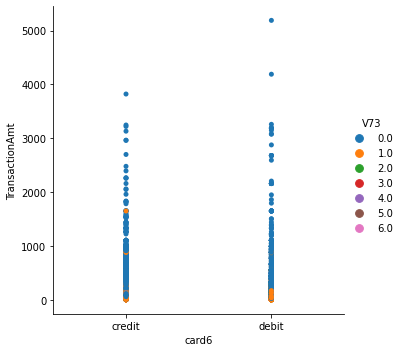

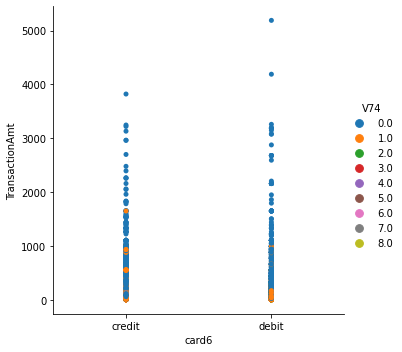

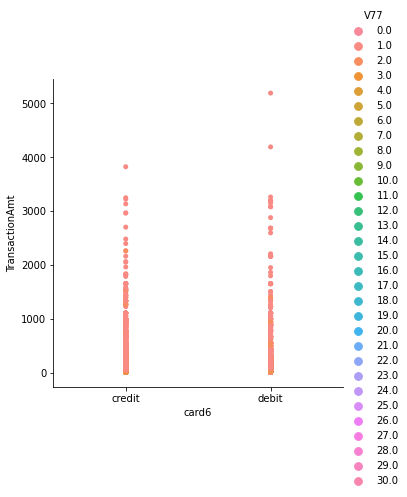

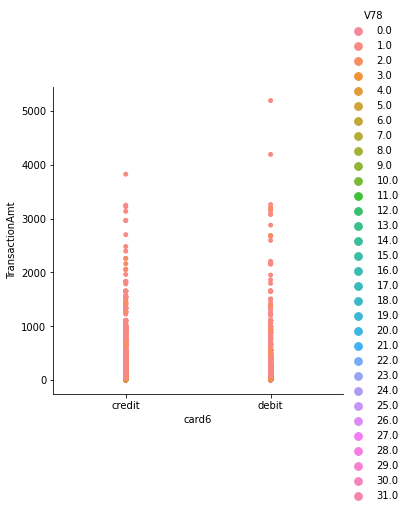

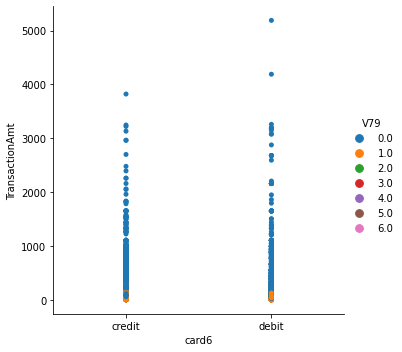

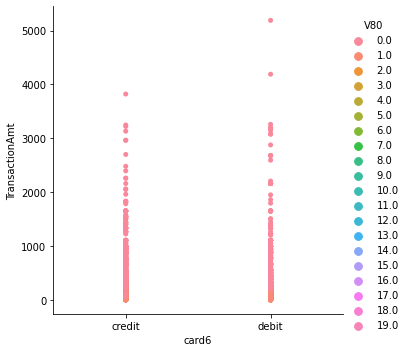

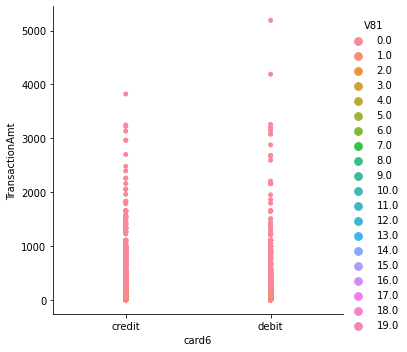

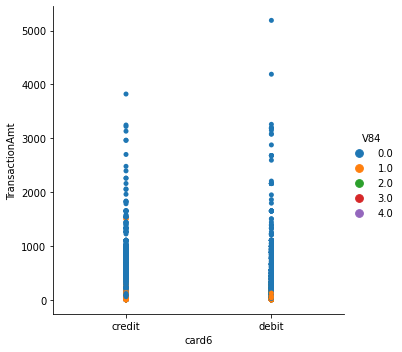

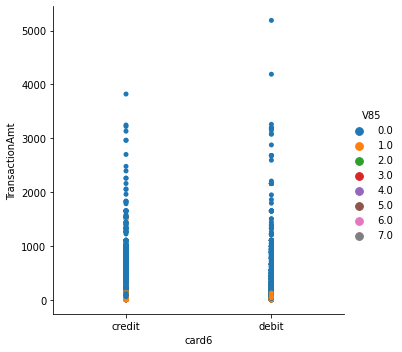

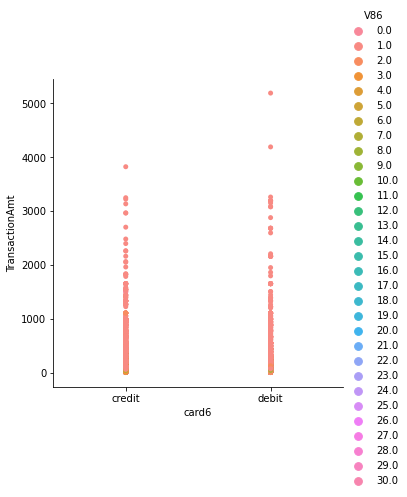

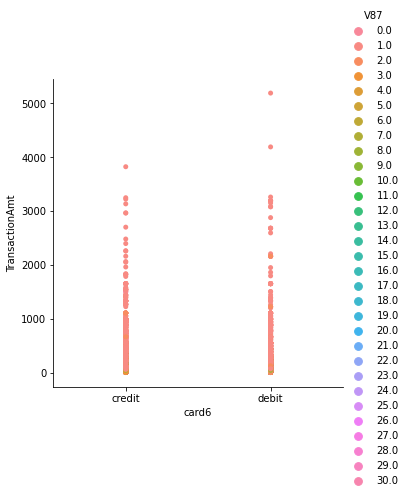

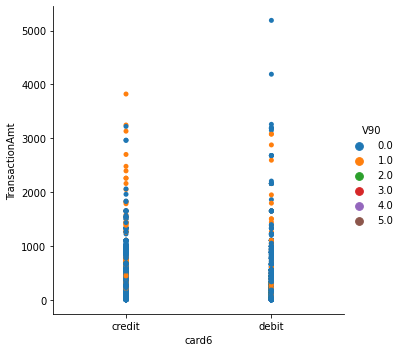

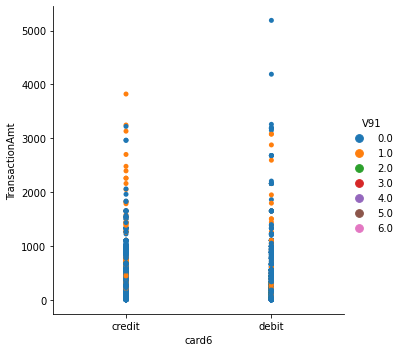

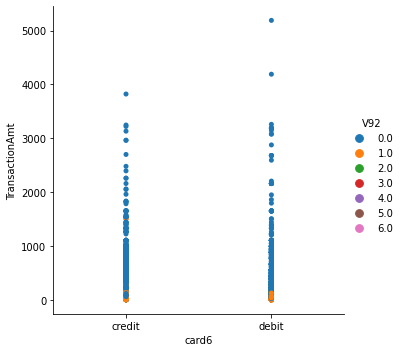

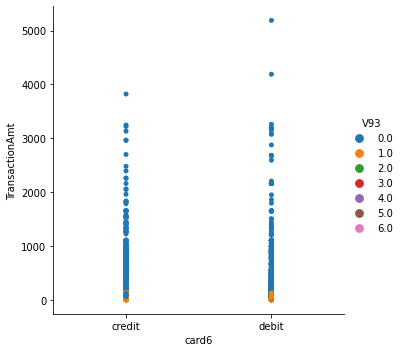

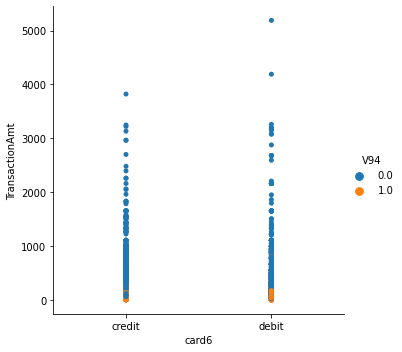

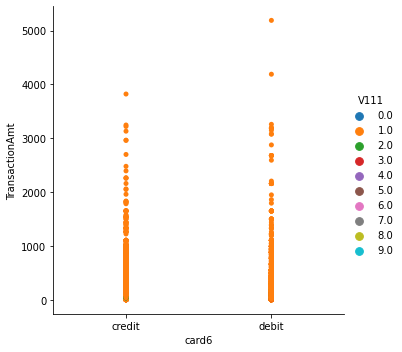

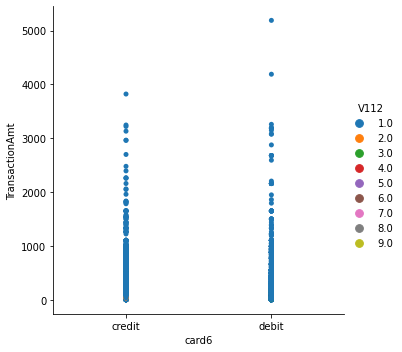

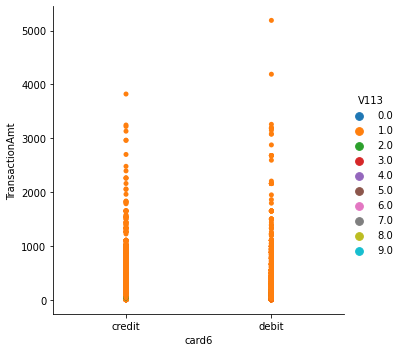

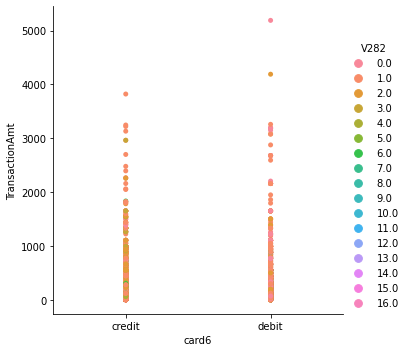

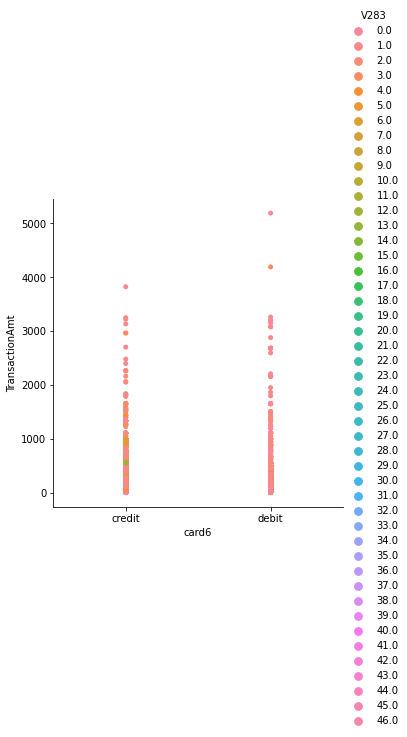

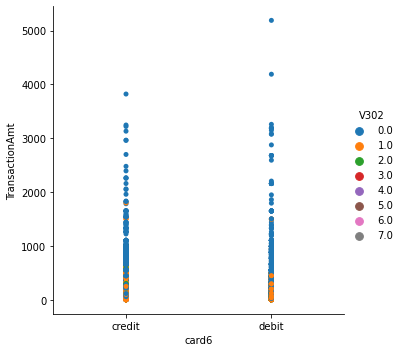

<Figure size 432x288 with 0 Axes>

In [101]:
for c in relevant_data.columns:
  sns.catplot(x="card6", y="TransactionAmt", jitter = False, hue= c , data=frauds )
plt.show()
plt.tight_layout()

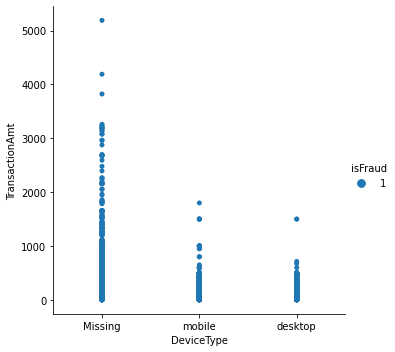

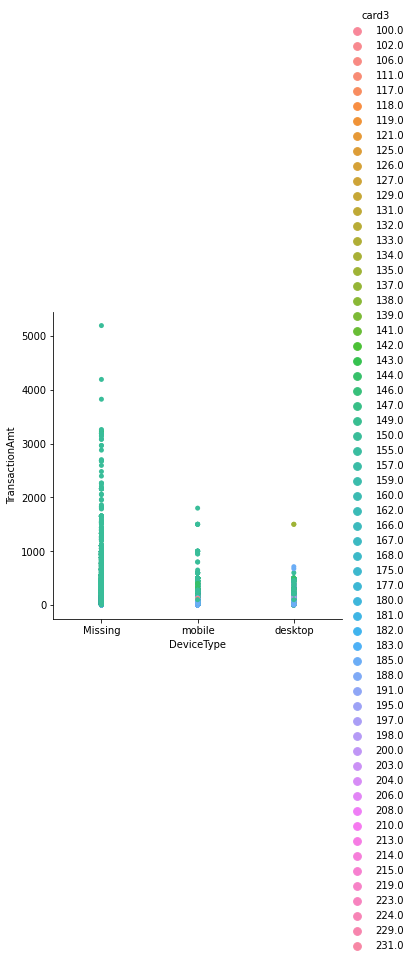

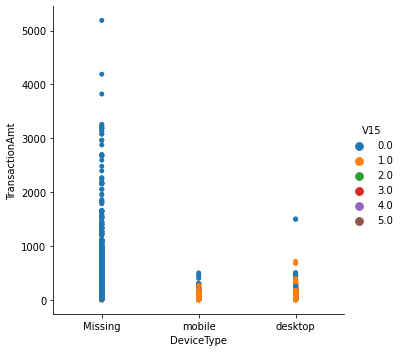

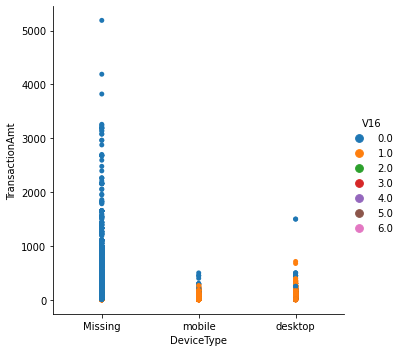

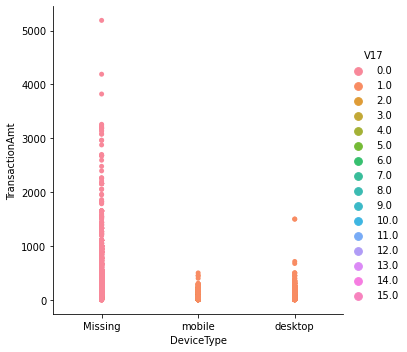

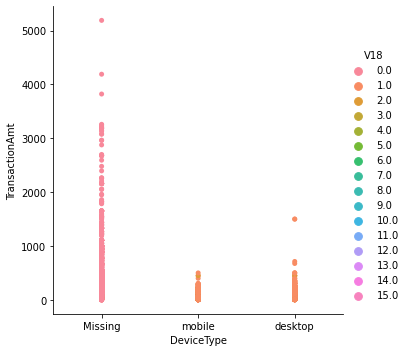

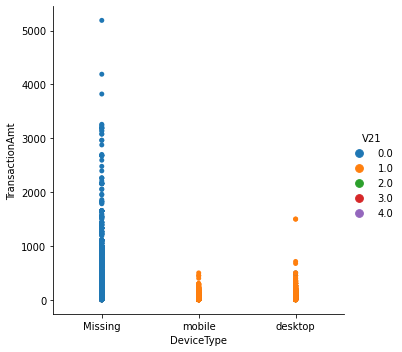

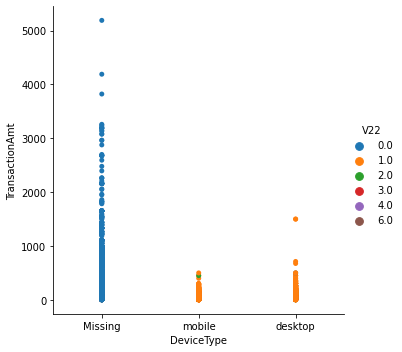

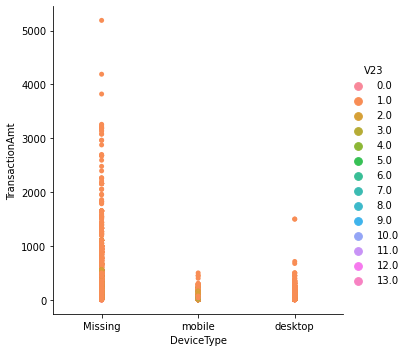

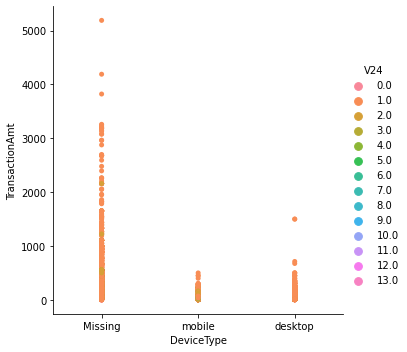

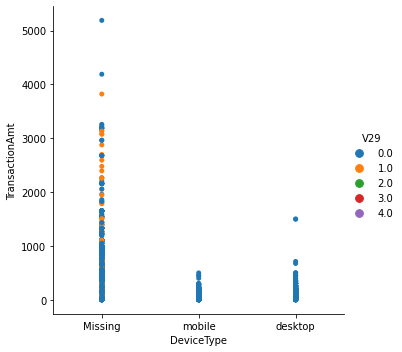

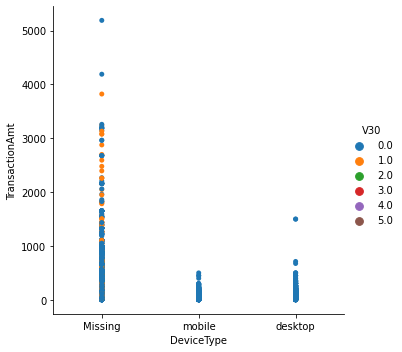

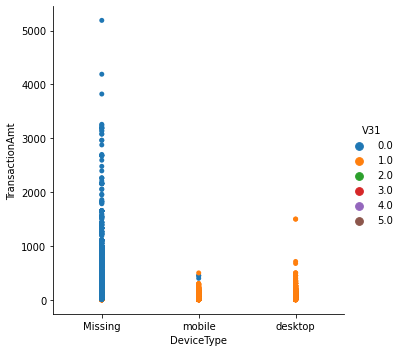

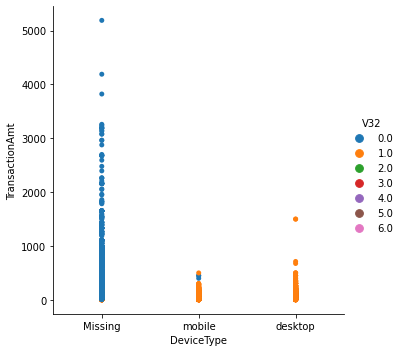

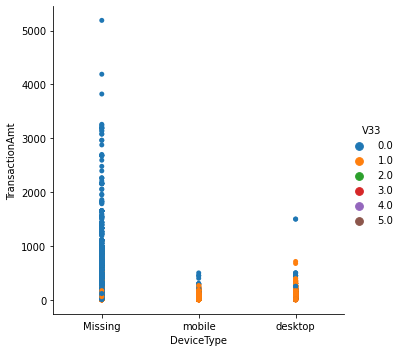

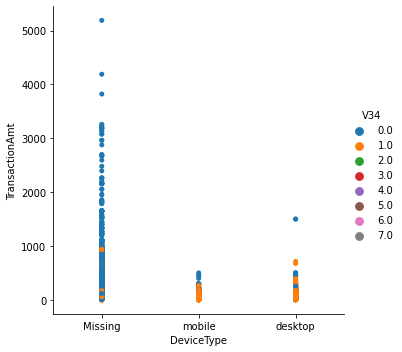

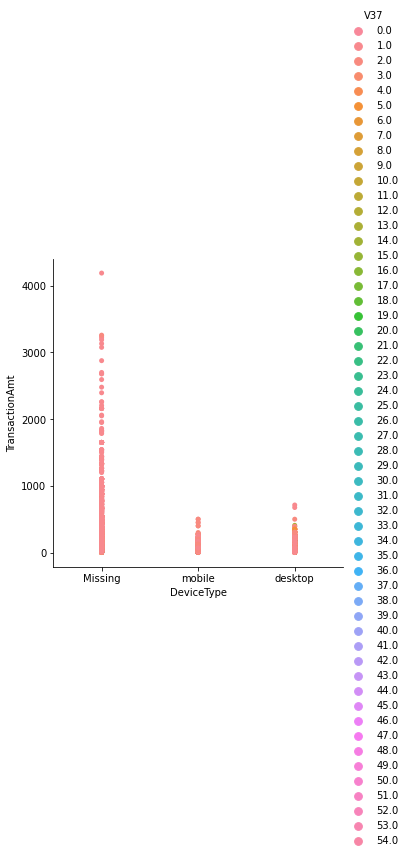

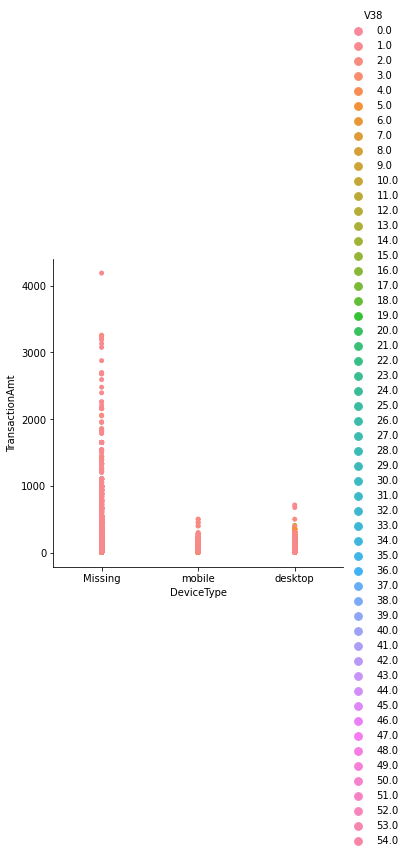

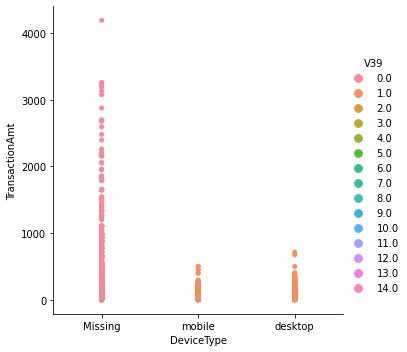

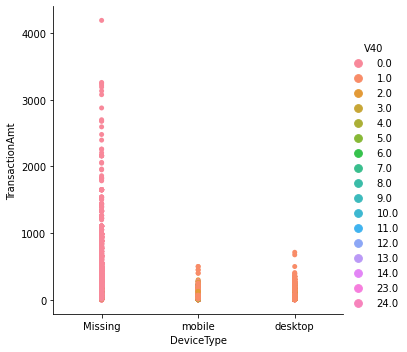

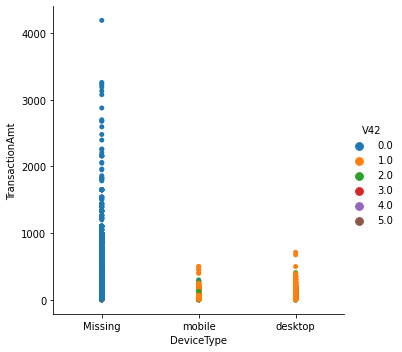

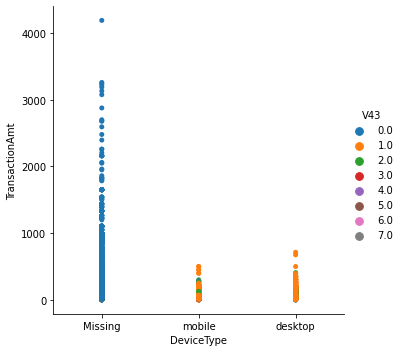

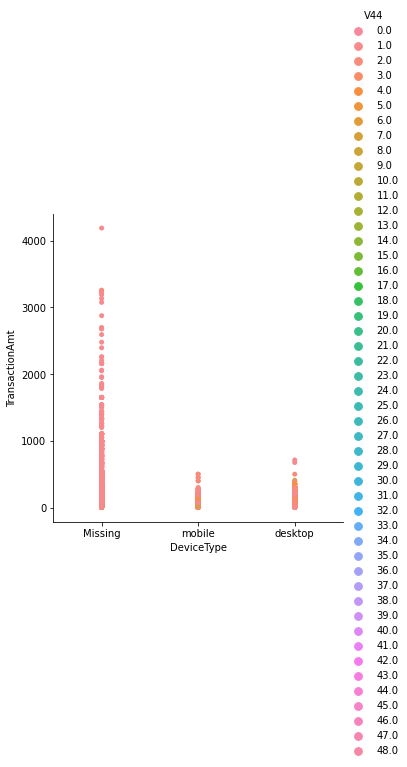

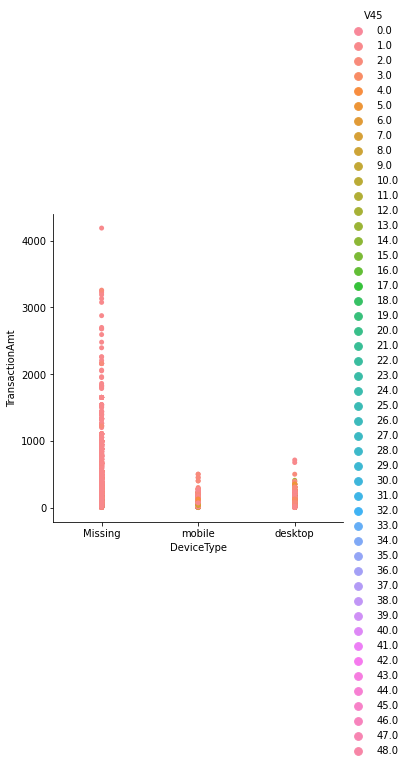

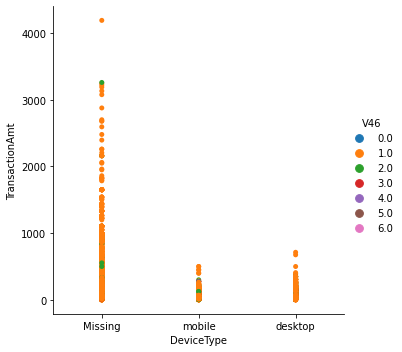

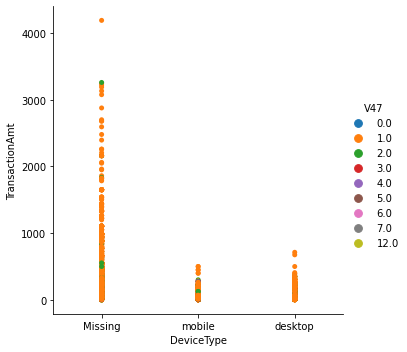

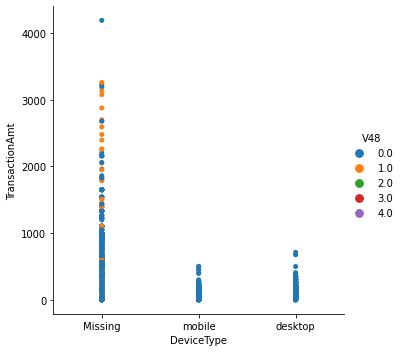

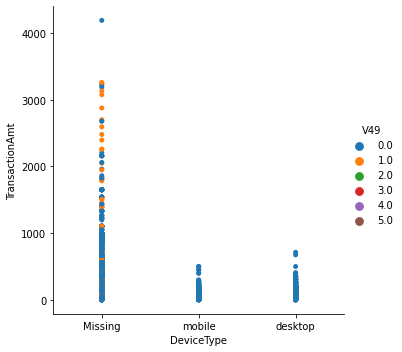

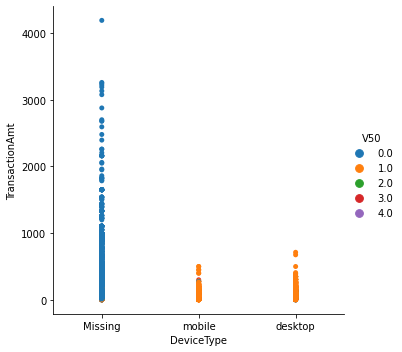

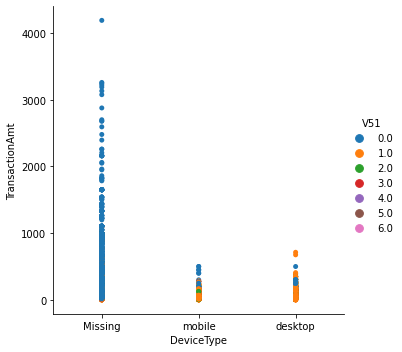

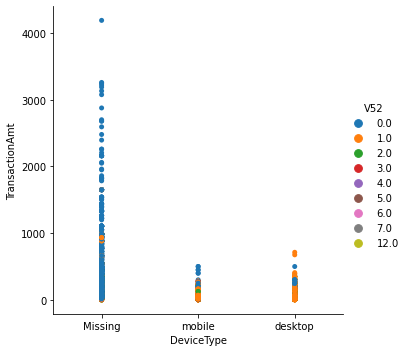

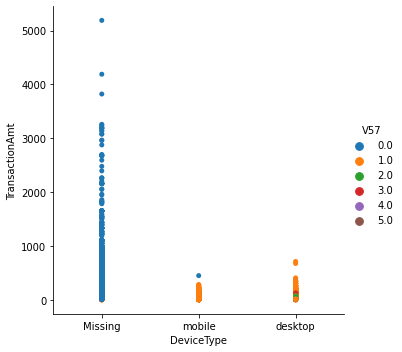

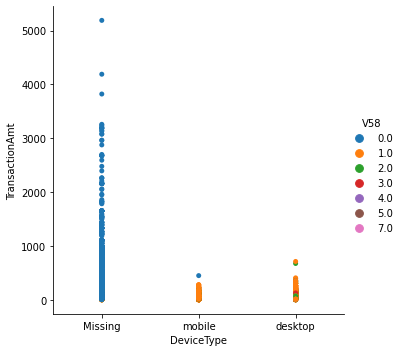

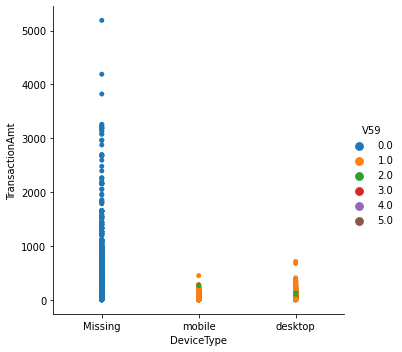

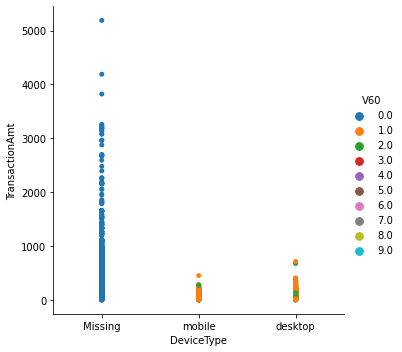

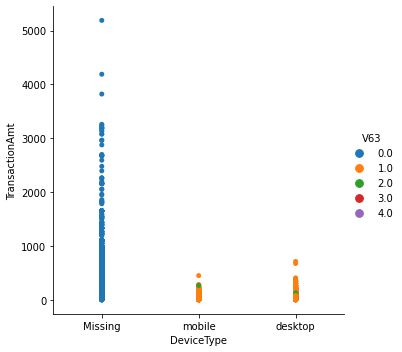

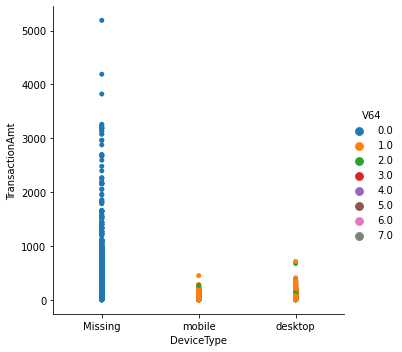

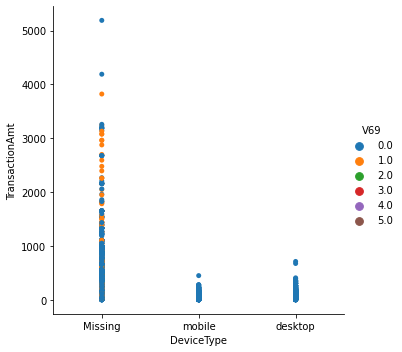

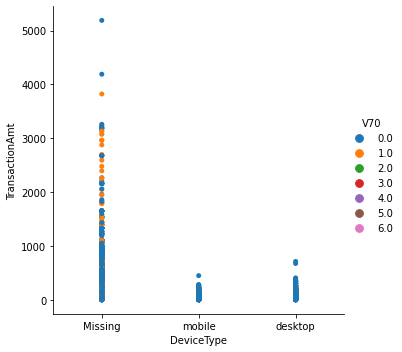

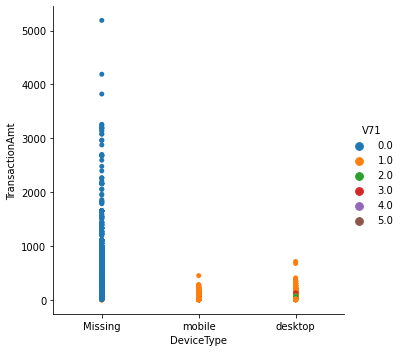

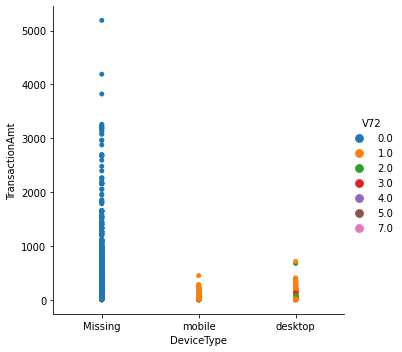

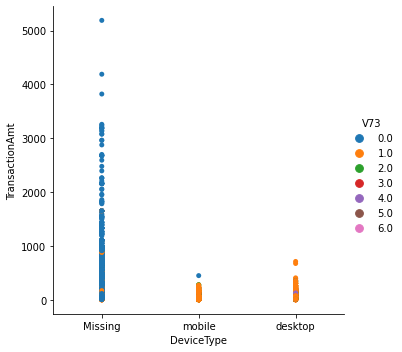

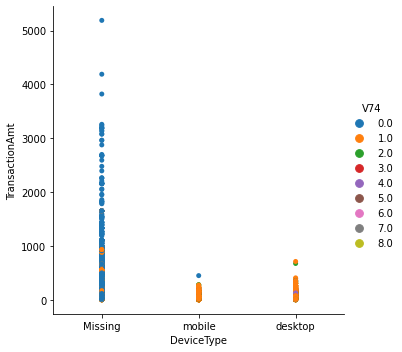

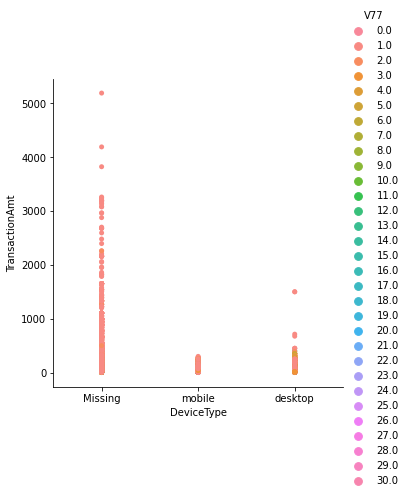

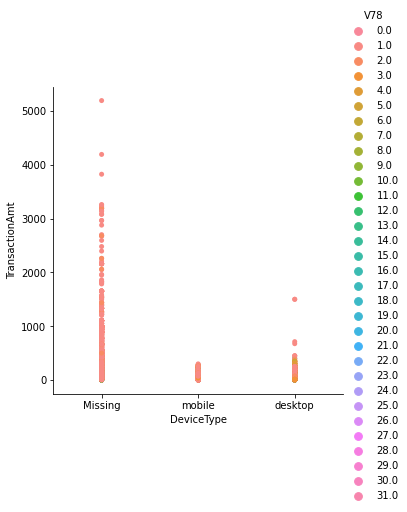

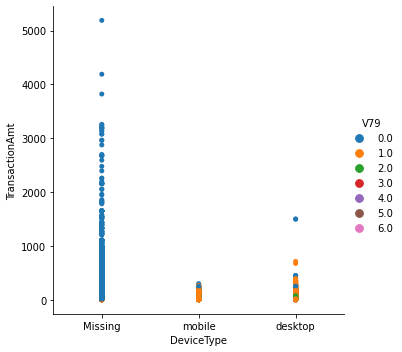

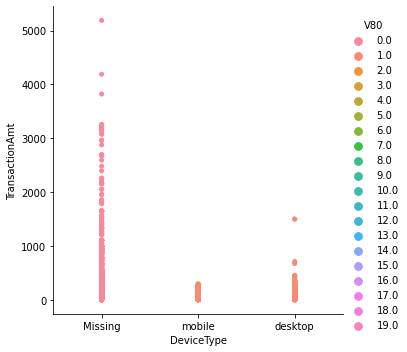

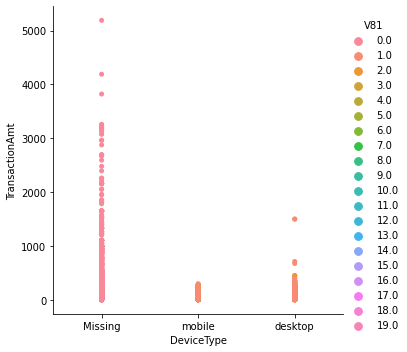

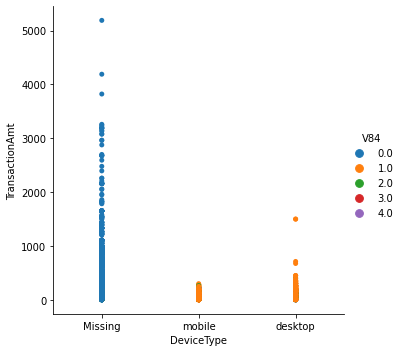

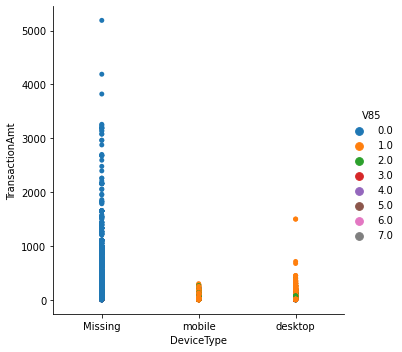

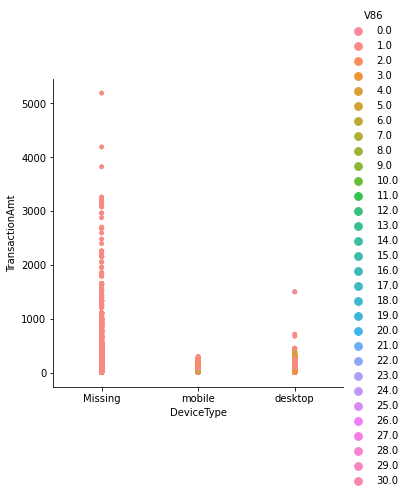

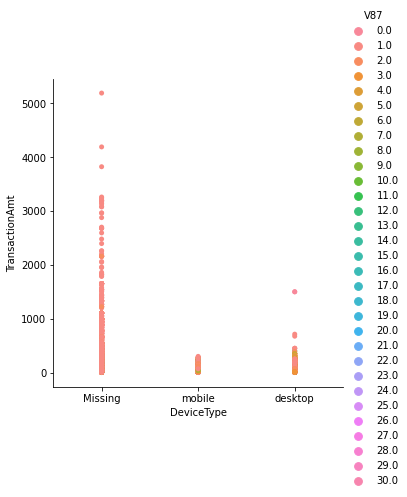

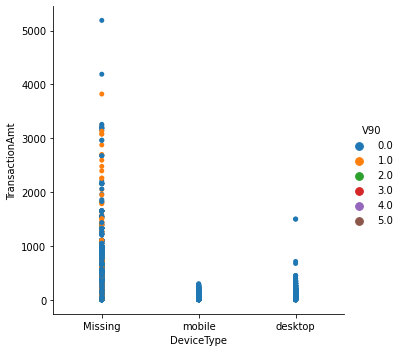

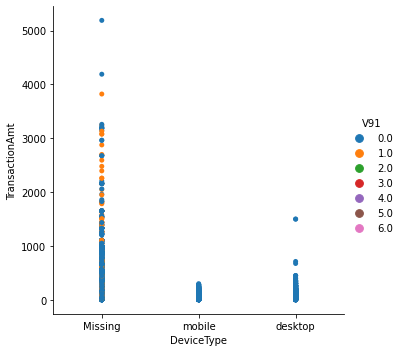

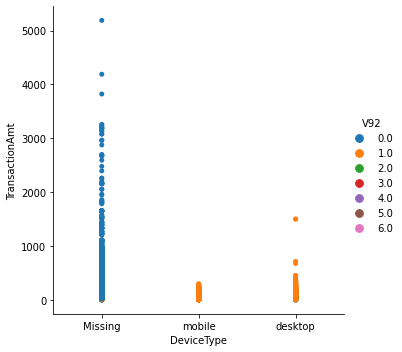

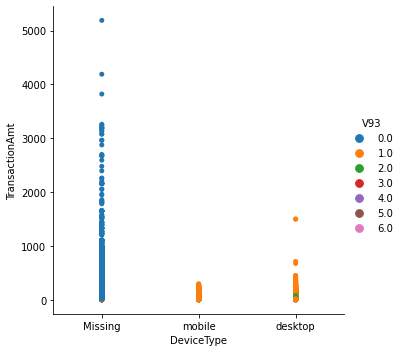

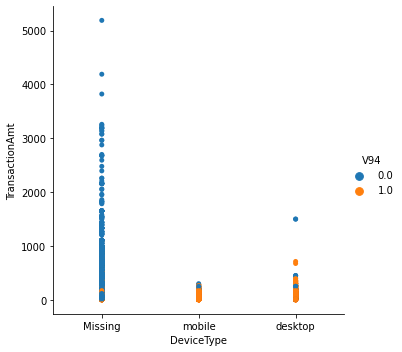

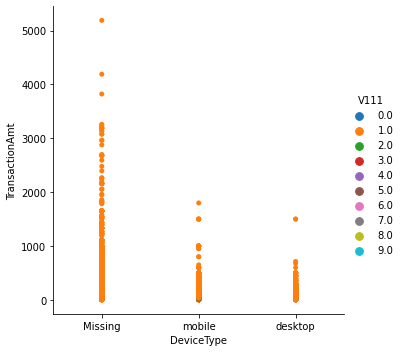

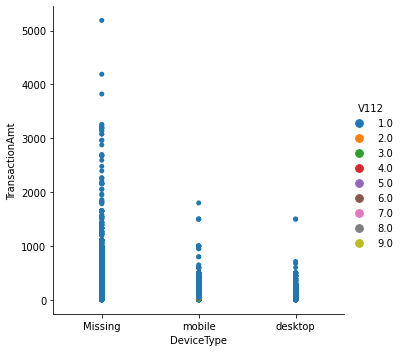

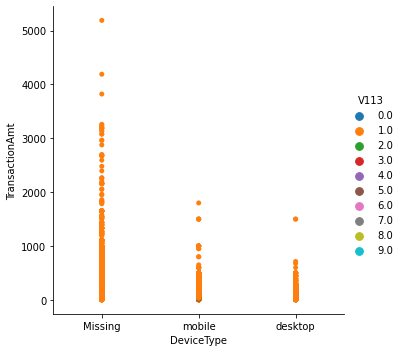

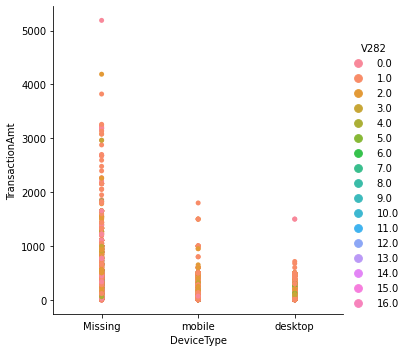

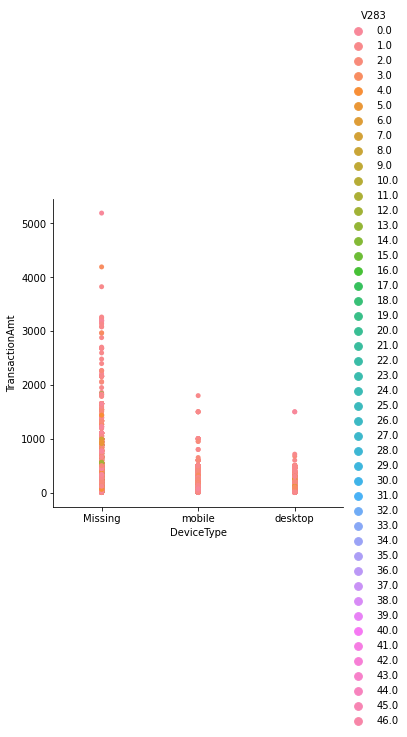

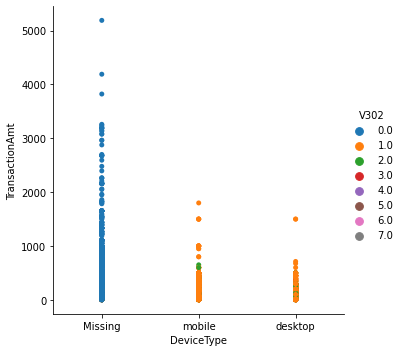

<Figure size 432x288 with 0 Axes>

In [102]:
for c in relevant_data.columns:
  sns.catplot(x="DeviceType", y="TransactionAmt", jitter = False, hue= c , data=frauds )
plt.show()
plt.tight_layout()

## Modeling ##

### Data Preprocessing###
<p>I'm going to prepare the data for the model</p>

#### Preparing data in features and label ####

<p>most relevant data will be used for training a Deep Learning model, while the 'isFraud' column will be used as label to be predicted by the model</p>

In [103]:
features = relevant_data.drop("isFraud",axis=1).copy()
labels = relevant_data.loc[:,['isFraud']].copy()

#### Data Normalization  ####

<p>Feature data are going to be normalized in order to increase performance during the model training</p>

In [104]:
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [105]:

featuresToScale = features.columns
sX = pp.StandardScaler(copy=True, with_mean=True, with_std=True)

dataX= features.copy()
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])

# display(dataX.head())

# dataX.fillna(dataX.mean(),inplace=True)
dataX.head()


card3       V15       V16      V17       V18       V21       V22  \
0 -0.281828 -0.368033 -0.360108 -0.36778 -0.364112 -0.382481 -0.368077   
1 -0.281828 -0.368033 -0.360108 -0.36778 -0.364112 -0.382481 -0.368077   
2 -0.281828 -0.368033 -0.360108 -0.36778 -0.364112 -0.382481 -0.368077   
3 -0.281828 -0.368033 -0.360108 -0.36778 -0.364112 -0.382481 -0.368077   
4 -0.281828 NaN       NaN       NaN      NaN       NaN       NaN         

        V23      V24       V29       V30       V31       V32       V33  \
0 -0.140469 -0.19018 -0.759501 -0.733229 -0.395627 -0.386712 -0.383375   
1 -0.140469 -0.19018 -0.759501 -0.733229 -0.395627 -0.386712 -0.383375   
2 -0.140469 -0.19018 -0.759501 -0.733229 -0.395627 -0.386712 -0.383375   
3 -0.140469 -0.19018 -0.759501 -0.733229 -0.395627 -0.386712 -0.383375   
4 NaN       NaN      NaN       NaN       NaN       NaN       NaN         

        V34       V37       V38       V39       V40       V42       V43  \
0 -0.389188 NaN       NaN       NaN       NaN       NaN       NaN         
1 -0.389188 -0.156486 -0.189074 -0.367462 -0.350236 -0.407731 -0.389843   
2 -0.389188 -0.156486 -0.189074 -0.367462 -0.350236 -0.407731 -0.389843   
3 -0.389188 -0.156486 -0.189074 -0.367462 -0.350236 -0.407731 -0.389843   
4 NaN       NaN       NaN       NaN       NaN       NaN       NaN         

        V44       V45       V46       V47    V48       V49       V50  \
0 NaN       NaN       NaN       NaN       NaN    NaN       NaN         
1 -0.131255 -0.165502 -0.133672 -0.166114 -0.754 -0.732925 -0.440502   
2 -0.131255 -0.165502 -0.133672 -0.166114 -0.754 -0.732925 -0.440502   
3 -0.131255 -0.165502 -0.133672 -0.166114 -0.754 -0.732925 -0.440502   
4 NaN       NaN       NaN       NaN       NaN    NaN       NaN         

        V51       V52       V57       V58       V59       V60       V63  \
0 NaN       NaN       -0.367557 -0.355189 -0.354433 -0.340812 -0.368017   
1 -0.422331 -0.416161 -0.367557 -0.355189 -0.354433 -0.340812 -0.368017   
2 -0.422331 -0.416161 -0.367557 -0.355189 -0.354433 -0.340812 -0.368017   
3 -0.422331 -0.416161 -0.367557 -0.355189 -0.354433 -0.340812 -0.368017   
4 NaN       NaN       NaN       NaN       NaN       NaN       NaN         

        V64       V69       V70       V71       V72       V73       V74  \
0 -0.349187 -0.759595 -0.735662 -0.386048 -0.372866 -0.381321 -0.386873   
1 -0.349187 -0.759595 -0.735662 -0.386048 -0.372866 -0.381321 -0.386873   
2 -0.349187 -0.759595 -0.735662 -0.386048 -0.372866 -0.381321 -0.386873   
3 -0.349187 -0.759595 -0.735662 -0.386048 -0.372866 -0.381321 -0.386873   
4 NaN       NaN       NaN       NaN       NaN       NaN       NaN         

        V77       V78       V79       V80     V81       V84      V85      V86  \
0 -0.163039 -0.184859 -0.360269 -0.351166 -0.3376 -0.378984 -0.35711 -0.15456   
1 -0.163039 -0.184859 -0.360269 -0.351166 -0.3376 -0.378984 -0.35711 -0.15456   
2 -0.163039 -0.184859 -0.360269 -0.351166 -0.3376 -0.378984 -0.35711 -0.15456   
3 -0.163039 -0.184859 -0.360269 -0.351166 -0.3376 -0.378984 -0.35711 -0.15456   
4 NaN       NaN       NaN       NaN       NaN     NaN       NaN      NaN        

        V87       V90       V91       V92       V93       V94      V111  \
0 -0.194524 -0.778573 -0.748332 -0.400132 -0.384805 -0.398417 -0.036191   
1 -0.194524 -0.778573 -0.748332 -0.400132 -0.384805 -0.398417 -0.036191   
2 -0.194524 -0.778573 -0.748332 -0.400132 -0.384805 -0.398417 -0.036191   
3 -0.194524 -0.778573 -0.748332 -0.400132 -0.384805 -0.398417 -0.036191   
4 NaN       NaN       NaN       NaN       NaN       NaN       -0.036191   

       V112      V113      V282      V283      V302  
0 -0.063292 -0.045261  0.198322  0.005701 -0.522447  
1 -0.063292 -0.045261  0.198322  0.005701 -0.522447  
2 -0.063292 -0.045261  0.198322  0.005701 -0.522447  
3 -0.063292 -0.045261 -0.886418 -0.635848 -0.522447  
4 -0.063292 -0.045261  0.198322  0.005701  1.552723

In [106]:
features_2 = features.copy()

In [107]:
features_2['card3'].isnull().sum()

1565

In [108]:
features_3=features_2.interpolate(method='polynomial', order=2)


In [109]:
np.sum(features_3.isnull().sum())

15

In [110]:
features_3 = features_3.fillna(0)
np.sum(features_3.isnull().sum())

0

In [111]:
featuresToScale = features_3.columns
dataX= features_3.copy()
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])

#### Results ####
<p>The data results now normalized with mean and standard deviation and all the cell are filled with values</p>

In [112]:
dataX.head()

card3       V15       V16       V17       V18       V21       V22  \
0 -0.28078 -0.357201 -0.346600 -0.362297 -0.357426 -0.374395 -0.360443   
1 -0.28078 -0.357201 -0.346600 -0.362297 -0.357426 -0.374395 -0.360443   
2 -0.28078 -0.357201 -0.346600 -0.362297 -0.357426 -0.374395 -0.360443   
3 -0.28078 -0.357201 -0.346600 -0.362297 -0.357426 -0.374395 -0.360443   
4 -0.28078 -0.354479 -0.343987 -0.359807 -0.354996 -0.371738 -0.357936   

        V23       V24       V29       V30       V31       V32       V33  \
0 -0.136263 -0.183895 -0.732536 -0.707967 -0.386840 -0.375273 -0.371936   
1 -0.136263 -0.183895 -0.732536 -0.707967 -0.386840 -0.375273 -0.371936   
2 -0.136263 -0.183895 -0.732536 -0.707967 -0.386840 -0.375273 -0.371936   
3 -0.136263 -0.183895 -0.732536 -0.707967 -0.386840 -0.375273 -0.371936   
4 -0.136263 -0.183895 -0.732547 -0.707977 -0.384322 -0.372864 -0.369270   

        V34       V37       V38       V39       V40       V42       V43  \
0 -0.374847 -1.507243 -1.234002 -0.291672 -0.288192 -0.302414 -0.301941   
1 -0.374847 -0.145586 -0.173298 -0.291672 -0.288192 -0.302414 -0.301941   
2 -0.374847 -0.145586 -0.173298 -0.291672 -0.288192 -0.302414 -0.301941   
3 -0.374847 -0.145586 -0.173298 -0.291672 -0.288192 -0.302414 -0.301941   
4 -0.372319 -0.140918 -0.169625 -0.290037 -0.286677 -0.300622 -0.300289   

        V44       V45       V46       V47       V48       V49       V50  \
0 -1.681652 -1.503909 -5.523115 -4.058522 -0.501883 -0.502679 -0.327172   
1 -0.126709 -0.158976 -0.120691 -0.150548 -0.501883 -0.502679 -0.327172   
2 -0.126709 -0.158976 -0.120691 -0.150548 -0.501883 -0.502679 -0.327172   
3 -0.126709 -0.158976 -0.120691 -0.150548 -0.501883 -0.502679 -0.327172   
4 -0.126709 -0.158931 -0.114516 -0.145951 -0.501890 -0.502686 -0.325345   

        V51       V52       V57       V58       V59       V60       V63  \
0 -0.318834 -0.322084 -0.360489 -0.350014 -0.347976 -0.335930 -0.357500   
1 -0.318834 -0.322084 -0.360489 -0.350014 -0.347976 -0.335930 -0.357500   
2 -0.318834 -0.322084 -0.360489 -0.350014 -0.347976 -0.335930 -0.357500   
3 -0.318834 -0.322084 -0.360489 -0.350014 -0.347976 -0.335930 -0.357500   
4 -0.314937 -0.318399 -0.357904 -0.347580 -0.345601 -0.333762 -0.354998   

        V64       V69       V70       V71       V72       V73       V74  \
0 -0.342003 -0.732785 -0.710541 -0.378373 -0.367108 -0.372262 -0.376866   
1 -0.342003 -0.732785 -0.710541 -0.378373 -0.367108 -0.372262 -0.376866   
2 -0.342003 -0.732785 -0.710541 -0.378373 -0.367108 -0.372262 -0.376866   
3 -0.342003 -0.732785 -0.710541 -0.378373 -0.367108 -0.372262 -0.376866   
4 -0.339789 -0.732796 -0.710551 -0.375917 -0.364795 -0.366840 -0.371796   

        V77       V78       V79       V80       V81       V84       V85  \
0 -0.155687 -0.178675 -0.279281 -0.295519 -0.291632 -0.304703 -0.305119   
1 -0.155687 -0.178675 -0.279281 -0.295519 -0.291632 -0.304703 -0.305119   
2 -0.155687 -0.178675 -0.279281 -0.295519 -0.291632 -0.304703 -0.305119   
3 -0.155687 -0.178675 -0.279281 -0.295519 -0.291632 -0.304703 -0.305119   
4 -0.151562 -0.175806 -0.277355 -0.293617 -0.289856 -0.302653 -0.303239   

        V86       V87       V90       V91       V92       V93       V94  \
0 -0.150747 -0.189436 -0.650619 -0.567082 -0.326393 -0.321273 -0.295288   
1 -0.150747 -0.189436 -0.650619 -0.567082 -0.326393 -0.321273 -0.295288   
2 -0.150747 -0.189436 -0.650619 -0.567082 -0.326393 -0.321273 -0.295288   
3 -0.150747 -0.189436 -0.650619 -0.567082 -0.326393 -0.321273 -0.295288   
4 -0.150747 -0.189436 -0.650628 -0.567090 -0.324387 -0.319352 -0.293248   

       V111      V112      V113      V282      V283      V302  
0 -0.034993 -0.062985 -0.044424  0.198791  0.005988 -0.522457  
1 -0.034993 -0.062985 -0.044424  0.198791  0.005988 -0.522457  
2 -0.034993 -0.062985 -0.044424  0.198791  0.005988 -0.522457  
3 -0.034993 -0.062985 -0.044424 -0.885181 -0.634937 -0.522457  
4 -0.034993 -0.062985 -0.044424  0.198791  0.005988  1.552709

#### Splitting Data ####

<p>the feature will be split in 3 group: training, validation, test</p>
<p>Train data(80 % of the data) is used for training the model, validation for validating the model on each training epoch, test data for checking the quality of the predictions of the model</p>

In [113]:
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(dataX, labels,
    test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

In [114]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(354324, 62)
(118108, 62)
(118108, 62)


### Dimensionality Reduction with PCA ###
<p>I'm using the Principal component analysis for the reduction of the dimensionality</p>

In [115]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

In [116]:
def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    precision, recall, thresholds = \
        precision_recall_curve(preds['trueLabel'],preds['anomalyScore'])
    average_precision = \
        average_precision_score(preds['trueLabel'],preds['anomalyScore'])
    
    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.plot([0, 1], [0.073, 0.073], color='k', lw=2, linestyle='--')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    
    plt.title('Precision-Recall curve: Average Precision = \
    {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'], \
                                     preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label="AUC="+str(areaUnderROC))
    
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: \
    Area under the curve = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()
    
    if returnPreds==True:
        return preds

In [117]:
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

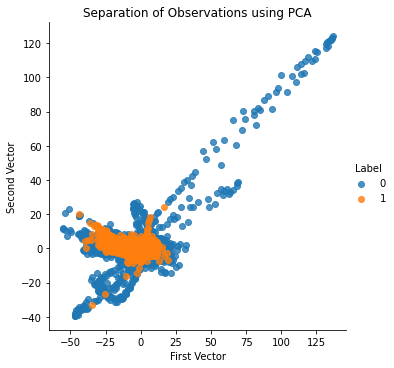

In [118]:
from sklearn.decomposition import PCA

n_components = 30
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, \
                                   index=X_train.index)

scatterPlot(X_train_PCA, y_train, "PCA")

### Precision / Recall and ROC curve ###
<p>the PCA inverse data can be  used to compare the normalized original data and get the first evaluation charts </p>

In [119]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve,auc
import matplotlib.pyplot as plt

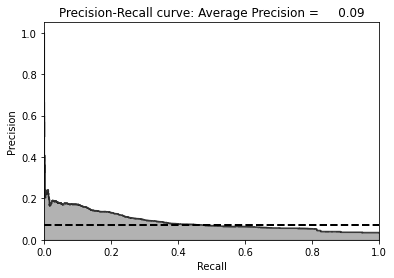

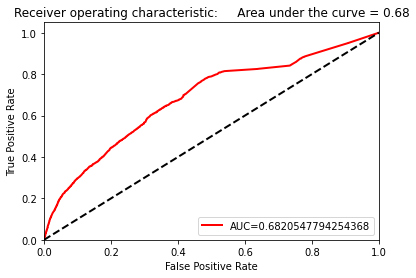

In [120]:
anomalyScoresPCA = anomalyScores(X_train, X_train_PCA_inverse)
preds = plotResults(y_train, anomalyScoresPCA, True)

### Model Prediction ###

<p>I'm going to use a Neural network for predicting frauds and evaluating the model with the splitten data</p>
<p>Since data are not balanced (frauds rows are around 3.5 %) the model will use AUC as metric for learning from the data, instead that the classical accuracy rate<p>

#### Model Definition and training ####
<p>This model is using a convolutional layer, a LSTM block and a Dense Layer</p>
<p>The output layer use a Sigmoid function and the loss function is a binary cross entropy. </p>


In [121]:
from tensorflow import keras
from keras import Sequential,layers,optimizers,metrics,losses
from keras.layers import Dense,Conv1D,LSTM,MaxPooling1D
import numpy as np
model = Sequential(name='model1')
model.add(Conv1D(filters=256, kernel_size=5, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(LSTM(64))

model.add(Dense(64,activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[metrics.AUC(name = 'AUC')]) 
model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 62, 256)           1536      
                                                                 
 lstm (LSTM)                 (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 87,937
Trainable params: 87,937
Non-trainable params: 0
_________________________________________________________________


In [122]:
h =  model.fit(x=X_train, y=y_train, batch_size=128, epochs=15, validation_data=(X_val,y_val))

Epoch 1/15
2769/2769 [==============================] - 35s 8ms/step - loss: 0.1338 - AUC: 0.7439 - val_loss: 0.1254 - val_AUC: 0.7666
Epoch 2/15
2769/2769 [==============================] - 21s 7ms/step - loss: 0.1274 - AUC: 0.7668 - val_loss: 0.1221 - val_AUC: 0.7886
Epoch 3/15
2769/2769 [==============================] - 20s 7ms/step - loss: 0.1256 - AUC: 0.7819 - val_loss: 0.1220 - val_AUC: 0.7882
Epoch 4/15
2769/2769 [==============================] - 20s 7ms/step - loss: 0.1246 - AUC: 0.7840 - val_loss: 0.1208 - val_AUC: 0.7890
Epoch 5/15
2769/2769 [==============================] - 20s 7ms/step - loss: 0.1237 - AUC: 0.7867 - val_loss: 0.1201 - val_AUC: 0.7921
Epoch 6/15
2769/2769 [==============================] - 20s 7ms/step - loss: 0.1229 - AUC: 0.7891 - val_loss: 0.1202 - val_AUC: 0.7923
Epoch 7/15
2769/2769 [==============================] - 20s 7ms/step - loss: 0.1224 - AUC: 0.7910 - val_loss: 0.1200 - val_AUC: 0.7920
Epoch 8/15
2769/2769 [==============================] -

#### Training History ####
<p>At the end of the training this the validation AUC is around 0.81 and the history of the metrics through the epoch looks like below</p>

dict_keys(['loss', 'AUC', 'val_loss', 'val_AUC'])


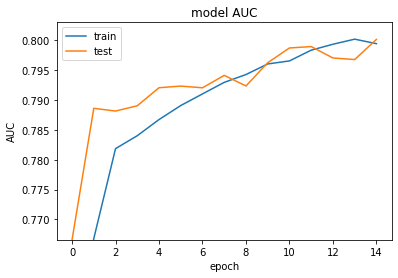

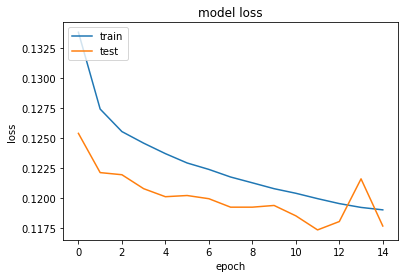

last model AUC 0.8001523613929749
best model AUC 0.8001523613929749


In [123]:
import matplotlib.pyplot as plt
print(h.history.keys())
# summarize history for AUC ROC
plt.plot(h.history['AUC'])
plt.plot(h.history['val_AUC'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.ylim(ymin=h.history['val_AUC'][0])
plt.show()

# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(ymin=h.history['val_loss'][0])
plt.show()

index = np.argmax(h.history['val_AUC'])

print('last model AUC',h.history['val_AUC'][-1])
print('best model AUC',h.history['val_AUC'][index])

### Model Evaluation and metrics plotting ###

In [124]:
model_preds = model.predict(X_test)

#### Precision / Recall and ROC curve #####

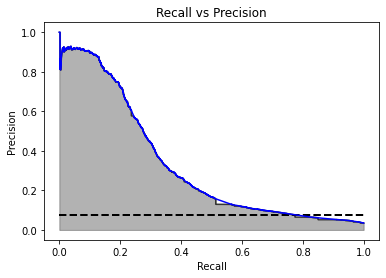

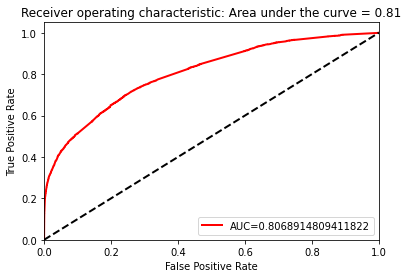

In [125]:
precision, recall, thresholds = precision_recall_curve(y_test, model_preds)
average_precision = average_precision_score(y_test, model_preds)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.plot([0, 1], [0.073, 0.073], color='k', lw=2, linestyle='--')
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')


fpr, tpr, _ = roc_curve(y_test, model_preds)
areaUnderROC = auc(fpr, tpr)

plt.figure()

plt.plot(fpr, tpr, color='r', lw=2, label="AUC="+str(areaUnderROC))
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")

plt.show()

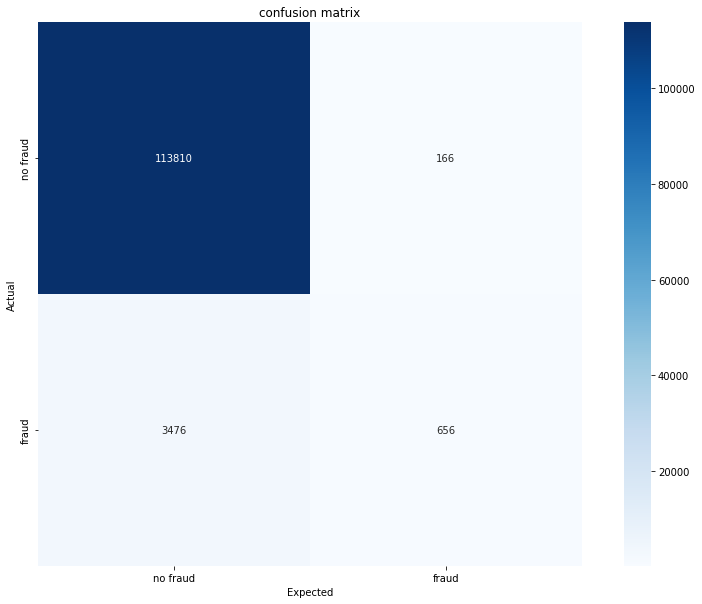

In [168]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


actuals = y_test.values.reshape(y_test.shape[0])
preds = np.round(model_preds.reshape(model_preds.shape[0]))

cm=confusion_matrix(actuals,preds)

fraud_labels=['no fraud','fraud']

plt.figure(figsize=[15, 10])
plt.title('confusion matrix')
sns.heatmap(data=cm, annot=True, cmap='Blues', square=True, xticklabels=fraud_labels, yticklabels=fraud_labels, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Expected')
plt.show()

In [202]:
result_df = pd.DataFrame({'fraud':actuals,'predicted':preds})
result_df['predicted'] = result_df['predicted'].apply(lambda x:int(x)) 
# result_df.head()
result_right1 = result_df[result_df['fraud'] ==1]
result_right = result_right1[result_right1['predicted'] ==1]
result_right.head()

# tmp.iloc[result_right.index,['TransactionAmt']]

result_right.index.values.shape
np.round(tmp.iloc[result_right.index.values]['TransactionAmt'].sum())


80152.0

In [204]:
np.round(tmp['TransactionAmt'].mean())

135.0

<p>From the confusion matrix we can see that there are some false positive and relevant amount of false negative</p>
<p>The total amount of identified frauds is around 80000 dollars (on average transaction of 135)</p>

### XGBoost Modeling ###
<p>I'm going to use this ML libray which is a gradient boosted decision tree library, and compere the AUC chart with the first model </p>

In [126]:
import xgboost as xgb
clf = xgb.XGBClassifier(
        n_estimators=100,
        max_depth=9,
        learning_rate=0.05,
        subsample=0.9,
        colsample_bytree=0.9,
        missing=-999,
        random_state=2019,
        tree_method='auto',
        n_jobs = -1,
        
    )

In [127]:
eval_set = [(X_val, y_val)]
clf.fit(X_train, y_train, eval_metric="auc", eval_set=eval_set, verbose=False)

XGBClassifier(colsample_bytree=0.9, learning_rate=0.05, max_depth=9,
              missing=-999, n_jobs=-1, random_state=2019, subsample=0.9,
              tree_method='auto')

In [128]:
clf_preds = clf.predict(X_test)

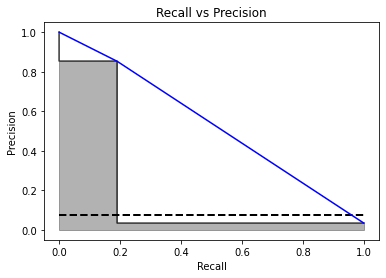

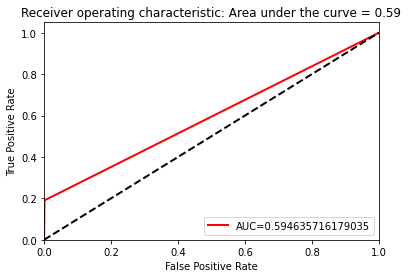

In [129]:
precision, recall, thresholds = precision_recall_curve(y_test, clf_preds)
average_precision = average_precision_score(y_test, clf_preds)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.plot([0, 1], [0.073, 0.073], color='k', lw=2, linestyle='--')
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')


fpr, tpr, _ = roc_curve(y_test, clf_preds)
areaUnderROC = auc(fpr, tpr)

plt.figure()

plt.plot(fpr, tpr, color='r', lw=2, label="AUC="+str(areaUnderROC))
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")

plt.show()

###Auto Encoders ###

In [130]:
from keras.regularizers import L1
from keras.layers.convolutional import Conv1D
from keras.layers import Conv2D, MaxPooling1D, Conv1DTranspose,Input
from keras import Model
input = Input(shape=(X_train.shape[1], 1), name='input')

input_dim = X_train.shape[1]
encoding_dim = 28
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=L1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim ), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

opt = keras.optimizers.Adam(learning_rate=0.001)

autoencoder.compile(optimizer=opt, 
                    loss='mean_squared_error', 
                    # metrics=[metrics.AUC(name = 'AUC')]
                    metrics=['mae']
                    )

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 62)]              0         
                                                                 
 dense_2 (Dense)             (None, 28)                1764      
                                                                 
 dense_3 (Dense)             (None, 14)                406       
                                                                 
 dense_4 (Dense)             (None, 28)                420       
                                                                 
 dense_5 (Dense)             (None, 62)                1798      
                                                                 
Total params: 4,388
Trainable params: 4,388
Non-trainable params: 0
_________________________________________________________________


In [131]:
h_ac = autoencoder.fit(
              x=X_test,
              y=X_test,
              epochs=15,
              batch_size=128,
              shuffle=True,
              validation_split=0.2)

Epoch 1/15
739/739 [==============================] - 3s 3ms/step - loss: 0.5829 - mae: 0.4118 - val_loss: 0.4577 - val_mae: 0.3756
Epoch 2/15
739/739 [==============================] - 2s 3ms/step - loss: 0.4334 - mae: 0.3651 - val_loss: 0.3976 - val_mae: 0.3576
Epoch 3/15
739/739 [==============================] - 2s 3ms/step - loss: 0.3961 - mae: 0.3546 - val_loss: 0.3702 - val_mae: 0.3510
Epoch 4/15
739/739 [==============================] - 2s 3ms/step - loss: 0.3702 - mae: 0.3493 - val_loss: 0.3414 - val_mae: 0.3458
Epoch 5/15
739/739 [==============================] - 2s 3ms/step - loss: 0.3545 - mae: 0.3461 - val_loss: 0.3279 - val_mae: 0.3452
Epoch 6/15
739/739 [==============================] - 2s 3ms/step - loss: 0.3437 - mae: 0.3440 - val_loss: 0.3171 - val_mae: 0.3408
Epoch 7/15
739/739 [==============================] - 2s 3ms/step - loss: 0.3348 - mae: 0.3414 - val_loss: 0.3093 - val_mae: 0.3398
Epoch 8/15
739/739 [==============================] - 2s 3ms/step - loss: 0.

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


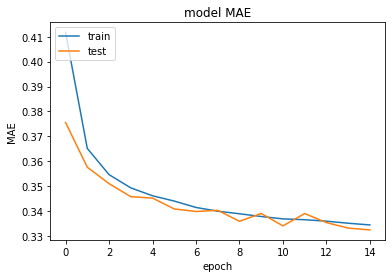

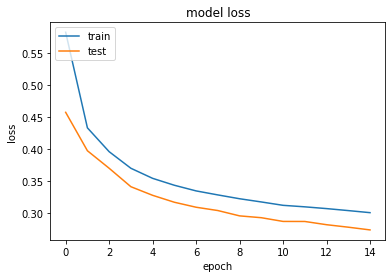

last model loss 0.33242589235305786
best model loss 0.33242589235305786


In [132]:
import matplotlib.pyplot as plt
print(h_ac.history.keys())

plt.plot(h_ac.history['mae'])
plt.plot(h_ac.history['val_mae'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(h_ac.history['loss'])
plt.plot(h_ac.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

index = np.argmin(h_ac.history['val_mae'])

print('last model loss',h_ac.history['val_mae'][-1])
print('best model loss',h_ac.history['val_mae'][index])


In [133]:
ac_preds = autoencoder.predict(X_test)

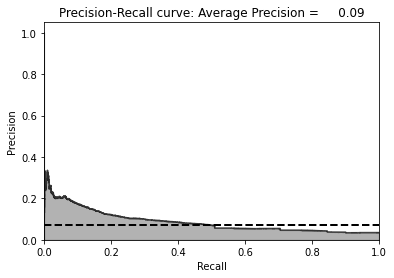

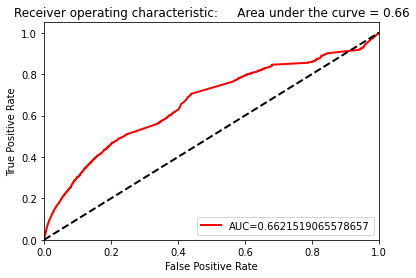

In [134]:
anomalyScoresPCA = anomalyScores(X_test, ac_preds.reshape(ac_preds.shape[0],ac_preds.shape[1]))
preds = plotResults(y_test, anomalyScoresPCA, True)

#
## Tabnet ###
<p>This is a neural network for tabular data, implemented with Pythorch</p>

#### Installation and preparation of the model ####
<p>we need to install the right libraries and define the model</p>

In [135]:
!pip install pytorch-tabnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [136]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
tabnet_clf = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' # "sparsemax"
                      )


Device used : cuda


In [137]:
from sklearn.preprocessing import LabelEncoder

yTrain = LabelEncoder().fit_transform(np.ravel(y_train))
yVal = LabelEncoder().fit_transform(np.ravel(y_val))

In [138]:
from pytorch_tabnet.utils import define_device
dev= 'cpu'
if torch.cuda.is_available():
  dev = "cuda"
define_device(dev)


'cuda'

#### Tabnet it is overfitting with our data ####
<p>tabnet validation AUC / ROC final value is around 0.8 but on prediction with real data is giving 0.7</p>

In [139]:
tabnet_clf.fit(
    X_train.values,yTrain,
    eval_set=[(X_train.values, yTrain), (X_val.values, yVal)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy','auc'],
    max_epochs=10 , patience=5,
    batch_size=1024, virtual_batch_size=256*2,
    num_workers=0,
    weights=1,
    drop_last=False
)            

epoch 0  | loss: 0.56333 | train_accuracy: 0.69897 | train_auc: 0.78874 | valid_accuracy: 0.69894 | valid_auc: 0.78598 |  0:00:15s
epoch 1  | loss: 0.54134 | train_accuracy: 0.78629 | train_auc: 0.79668 | valid_accuracy: 0.78567 | valid_auc: 0.79365 |  0:00:30s
epoch 2  | loss: 0.53902 | train_accuracy: 0.71417 | train_auc: 0.79619 | valid_accuracy: 0.71419 | valid_auc: 0.79472 |  0:00:45s
epoch 3  | loss: 0.53618 | train_accuracy: 0.75405 | train_auc: 0.80093 | valid_accuracy: 0.75462 | valid_auc: 0.79961 |  0:01:00s
epoch 4  | loss: 0.53828 | train_accuracy: 0.7351  | train_auc: 0.80059 | valid_accuracy: 0.73488 | valid_auc: 0.79995 |  0:01:14s
epoch 5  | loss: 0.53394 | train_accuracy: 0.72225 | train_auc: 0.80331 | valid_accuracy: 0.72202 | valid_auc: 0.79926 |  0:01:29s
epoch 6  | loss: 0.53339 | train_accuracy: 0.71583 | train_auc: 0.80327 | valid_accuracy: 0.71601 | valid_auc: 0.79873 |  0:01:47s
epoch 7  | loss: 0.52823 | train_accuracy: 0.79617 | train_auc: 0.80312 | valid_acc

In [140]:
tabnet_preds = tabnet_clf.predict(X_test.values)

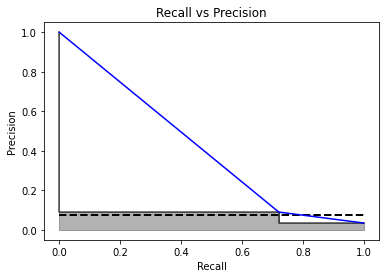

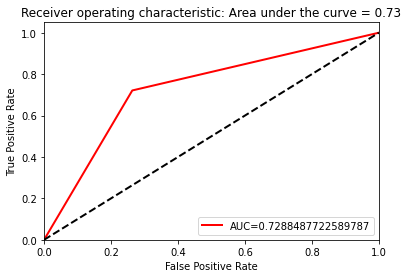

In [141]:
precision, recall, thresholds = precision_recall_curve(y_test, tabnet_preds)
average_precision = average_precision_score(y_test, tabnet_preds)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.plot([0, 1], [0.073, 0.073], color='k', lw=2, linestyle='--')
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')


fpr, tpr, _ = roc_curve(y_test, tabnet_preds)
areaUnderROC = auc(fpr, tpr)

plt.figure()

plt.plot(fpr, tpr, color='r', lw=2, label="AUC="+str(areaUnderROC))
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")

plt.show()

## Conclusion ##

<p>We have seen that when the problem results in a huge number of features, it is important to identify the relevant columsn using the heatmap.</p>
<p>On fraud detection number of frauds respect of total data is a small fraction and data result high unbalances: in this situation we need to use AUC / ROC for understandig the quality of predictions</p>
<p>By using different model we've seen that deep neural network for fraud detection perform better than other ML models</p>


 ## References##



<p>Kaggle Competition:</p>

- https://www.kaggle.com/competitions/ieee-fraud-detection

<p>Initial sources:</p>

- https://www.kaggle.com/code/artgor/eda-and-models/notebook#Data-loading-and-overview

- https://www.kaggle.com/code/jesucristo/fraud-complete-eda/notebook

- https://www.kaggle.com/code/jesucristo/fraud-complete-eda/notebook#Data  

- https://www.kaggle.com/c/ieee-fraud-detection/discussion/108575  

- https://www.kaggle.com/code/affanamin/is-it-fraud-transaction-eda-fe-and-lgb/notebook 

- https://www.kaggle.com/code/artgor/eda-and-models#LGBM

<hr/>

<p>Github references:</p>

- https://github.com/VedangW/ieee-cis-fraud-detection

- https://github.com/spannozzo/IEEE-CIS-Fraud-Detection

- https://github.com/andrew-siu12/IEEE-CIS-Fraud-Detection/

- https://github.com/aapatel09/handson-unsupervised-learning
<hr/>

<p>Others:</p>

- https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
